# Deep Learning Revision Notebook 📚
## From Basics to Advanced Concepts

Welcome to your comprehensive deep learning revision guide! This notebook covers core concepts from linear regression to advanced deep learning techniques, implemented with PyTorch and visualized for better understanding.

### 📋 Learning Objectives:
- Understand fundamental concepts with mathematical foundations
- Implement algorithms from scratch and using PyTorch
- Visualize model behavior and training dynamics
- Compare different approaches and techniques
- Prepare for deep learning exam with practical examples

---

## Chapter 1: Linear Regression - The Foundation 📈

Linear regression is the cornerstone of machine learning and serves as the foundation for understanding neural networks. We'll explore:

1. **Mathematical Foundation**: Understanding the linear relationship y = wx + b
2. **Loss Functions**: Mean Squared Error and its derivatives
3. **Optimization**: Gradient descent algorithm
4. **Implementation**: From scratch, PyTorch, and scikit-learn
5. **Regularization**: L1 (Lasso) and L2 (Ridge) techniques
6. **Evaluation**: Various metrics and visualization techniques

## 1. Import Required Libraries 📦

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings('ignore')

# PyTorch libraries (import after reinstalling)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scikit-learn libraries
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device available: {'CUDA' if torch.cuda.is_available() else 'CPU'}")

✅ All libraries imported successfully!
PyTorch version: 2.7.1
Device available: CPU


## 2. Generate Dataset for Linear Regression 📊

We'll create both synthetic and real-world datasets to understand linear regression behavior:

### 📝 Theory:
Linear regression assumes a linear relationship: **y = wx + b + ε**
- **w**: weight (slope)
- **b**: bias (intercept)  
- **ε**: noise term

### Datasets we'll use:
1. **Synthetic Dataset**: Generated using scikit-learn's `make_regression`
2. **Real Dataset**: Diabetes dataset for practical application

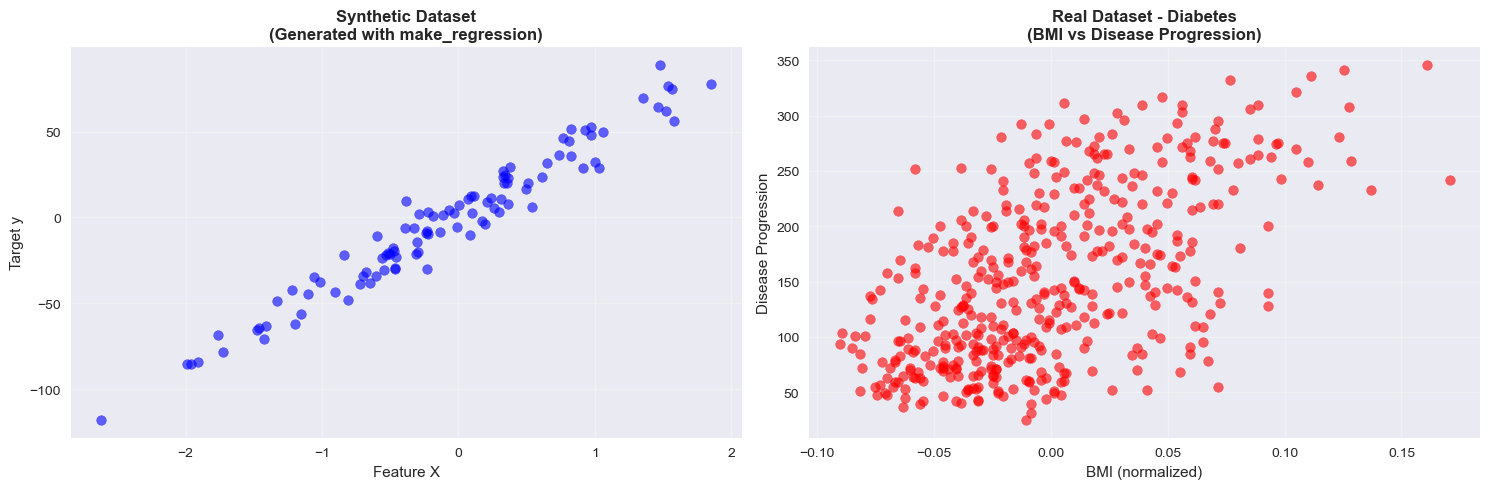

📊 Synthetic Dataset: 100 samples
📊 Real Dataset: 442 samples
📈 We'll primarily use the synthetic dataset for learning, then apply to real data


In [2]:
# Generate synthetic dataset
X_synthetic, y_synthetic = make_regression(
    n_samples=100, 
    n_features=1, 
    noise=10, 
    random_state=42
)

# Load real-world dataset (Diabetes)
diabetes = load_diabetes()
X_real, y_real = diabetes.data, diabetes.target

# For simplicity, let's use just one feature from diabetes dataset
X_real_single = X_real[:, 2:3]  # BMI feature

# Create DataFrames for easier handling
df_synthetic = pd.DataFrame({
    'X': X_synthetic.flatten(),
    'y': y_synthetic
})

df_real = pd.DataFrame({
    'X': X_real_single.flatten(),
    'y': y_real
})

# Visualize both datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Synthetic dataset
ax1.scatter(df_synthetic['X'], df_synthetic['y'], alpha=0.6, color='blue')
ax1.set_title('Synthetic Dataset\n(Generated with make_regression)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Feature X')
ax1.set_ylabel('Target y')
ax1.grid(True, alpha=0.3)

# Real dataset
ax2.scatter(df_real['X'], df_real['y'], alpha=0.6, color='red')
ax2.set_title('Real Dataset - Diabetes\n(BMI vs Disease Progression)', fontsize=12, fontweight='bold')
ax2.set_xlabel('BMI (normalized)')
ax2.set_ylabel('Disease Progression')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Synthetic Dataset: {X_synthetic.shape[0]} samples")
print(f"📊 Real Dataset: {X_real_single.shape[0]} samples")
print(f"📈 We'll primarily use the synthetic dataset for learning, then apply to real data")

## 3. Implement Linear Regression from Scratch 🔧

### 📝 Mathematical Foundation:

**Forward Pass:**
- Prediction: ŷ = wx + b
- Loss (MSE): L = (1/n) * Σ(y - ŷ)²

**Backward Pass (Gradients):**
- ∂L/∂w = (1/n) * Σ(-2x(y - ŷ))
- ∂L/∂b = (1/n) * Σ(-2(y - ŷ))

**Parameter Update:**
- w = w - α * ∂L/∂w
- b = b - α * ∂L/∂b

Where α is the learning rate.

In [3]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weight = None
        self.bias = None
        self.losses = []
        
    def fit(self, X, y, epochs=1000):
        """Train the linear regression model"""
        # Initialize parameters
        self.weight = np.random.randn(1)[0]
        self.bias = np.random.randn(1)[0]
        
        n = len(X)
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.weight * X + self.bias
            
            # Calculate loss (MSE)
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)
            
            # Calculate gradients
            dw = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)
            
            # Update parameters
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Weight = {self.weight:.4f}, Bias = {self.bias:.4f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.weight * X + self.bias

# Train on synthetic data
X_train = df_synthetic['X'].values
y_train = df_synthetic['y'].values

# Create and train model
model_scratch = LinearRegressionScratch(learning_rate=0.001)
print("🚀 Training Linear Regression from Scratch...")
model_scratch.fit(X_train, y_train, epochs=1000)

# Make predictions
y_pred_scratch = model_scratch.predict(X_train)

print(f"\n✅ Final Parameters:")
print(f"Weight (slope): {model_scratch.weight:.4f}")
print(f"Bias (intercept): {model_scratch.bias:.4f}")

🚀 Training Linear Regression from Scratch...
Epoch 0: Loss = 1665.1912, Weight = 0.5691, Bias = -0.1448
Epoch 100: Loss = 1216.1106, Weight = 7.2334, Bias = -0.6677
Epoch 200: Loss = 895.5403, Weight = 12.8728, Bias = -0.9803
Epoch 300: Loss = 666.2373, Weight = 17.6471, Bias = -1.1385
Epoch 400: Loss = 501.9017, Weight = 21.6909, Bias = -1.1852
Epoch 500: Loss = 383.9144, Weight = 25.1174, Bias = -1.1534
Epoch 600: Loss = 299.0610, Weight = 28.0222, Bias = -1.0680
Epoch 700: Loss = 237.9412, Weight = 30.4857, Bias = -0.9478
Epoch 800: Loss = 193.8527, Weight = 32.5758, Bias = -0.8066
Epoch 900: Loss = 162.0070, Weight = 34.3497, Bias = -0.6548

✅ Final Parameters:
Weight (slope): 35.8419
Bias (intercept): -0.5013


## 4. PyTorch Linear Regression Implementation 🔥

### 📝 PyTorch Advantages:
- **Automatic differentiation**: No need to calculate gradients manually
- **GPU acceleration**: Can leverage CUDA for faster computation
- **Scalability**: Easy to extend to neural networks
- **Built-in optimizers**: Adam, SGD, RMSprop, etc.

In [4]:
class LinearRegressionPyTorch(nn.Module):
    def __init__(self, input_size=1):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return self.linear(x)

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X_train.reshape(-1, 1))
y_tensor = torch.FloatTensor(y_train.reshape(-1, 1))

# Create model, loss function, and optimizer
model_pytorch = LinearRegressionPyTorch()
criterion = nn.MSELoss()
optimizer = optim.SGD(model_pytorch.parameters(), lr=0.001)

# Training loop
epochs = 1000
losses_pytorch = []

print("🚀 Training PyTorch Linear Regression...")

for epoch in range(epochs):
    # Forward pass
    y_pred = model_pytorch(X_tensor)
    loss = criterion(y_pred, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters
    
    losses_pytorch.append(loss.item())
    
    if epoch % 100 == 0:
        weight = model_pytorch.linear.weight.item()
        bias = model_pytorch.linear.bias.item()
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Weight = {weight:.4f}, Bias = {bias:.4f}")

# Get final parameters
final_weight = model_pytorch.linear.weight.item()
final_bias = model_pytorch.linear.bias.item()

# Make predictions
with torch.no_grad():
    y_pred_pytorch = model_pytorch(X_tensor).numpy()

print(f"\n✅ Final PyTorch Parameters:")
print(f"Weight (slope): {final_weight:.4f}")
print(f"Bias (intercept): {final_bias:.4f}")

🚀 Training PyTorch Linear Regression...
Epoch 0: Loss = 1653.0472, Weight = 0.8367, Bias = 0.8216
Epoch 100: Loss = 1205.0718, Weight = 7.4770, Bias = 0.1282
Epoch 200: Loss = 886.0469, Weight = 13.0930, Bias = -0.3244
Epoch 300: Loss = 658.3596, Weight = 17.8451, Bias = -0.5977
Epoch 400: Loss = 495.5245, Weight = 21.8681, Bias = -0.7390
Epoch 500: Loss = 378.8449, Weight = 25.2753, Bias = -0.7851
Epoch 600: Loss = 295.0861, Weight = 28.1625, Bias = -0.7637
Epoch 700: Loss = 234.8578, Weight = 30.6099, Bias = -0.6961
Epoch 800: Loss = 191.4813, Weight = 32.6854, Bias = -0.5984
Epoch 900: Loss = 160.1958, Weight = 34.4462, Bias = -0.4825

✅ Final PyTorch Parameters:
Weight (slope): 35.9268
Bias (intercept): -0.3583


## 5. Scikit-Learn Linear Regression Comparison 🔬

Let's compare our implementations with scikit-learn's optimized solution:

📊 Comparison of All Implementations:
         Method   Weight    Bias       MSE
0  From Scratch  35.8419 -0.5013  138.9760
1       PyTorch  35.9268 -0.3583  137.6009
2  Scikit-Learn  44.4372  1.1651   78.0543


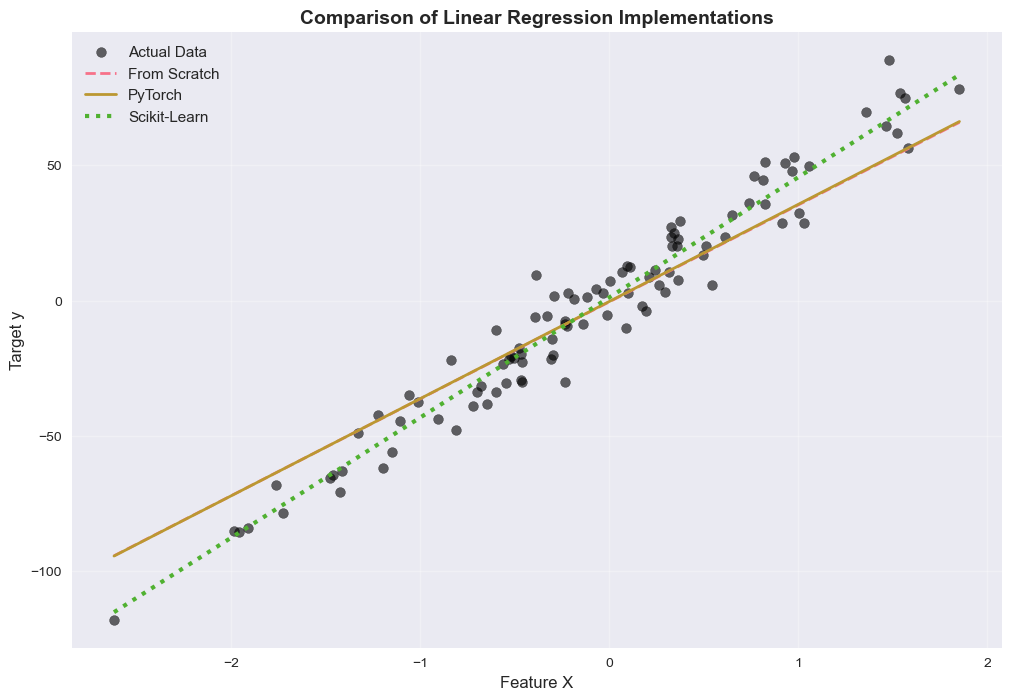

✅ All three methods should produce very similar results!


In [5]:
# Scikit-learn Linear Regression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train.reshape(-1, 1), y_train)
y_pred_sklearn = model_sklearn.predict(X_train.reshape(-1, 1))

# Compare all three implementations
comparison_df = pd.DataFrame({
    'Method': ['From Scratch', 'PyTorch', 'Scikit-Learn'],
    'Weight': [model_scratch.weight, final_weight, model_sklearn.coef_[0]],
    'Bias': [model_scratch.bias, final_bias, model_sklearn.intercept_],
    'MSE': [
        np.mean((y_train - y_pred_scratch) ** 2),
        np.mean((y_train - y_pred_pytorch.flatten()) ** 2),
        np.mean((y_train - y_pred_sklearn) ** 2)
    ]
})

print("📊 Comparison of All Implementations:")
print(comparison_df.round(4))

# Visualize predictions from all methods
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, alpha=0.6, label='Actual Data', color='black', s=50)

# Sort data for better line plotting
sort_idx = np.argsort(X_train)
X_sorted = X_train[sort_idx]

plt.plot(X_sorted, y_pred_scratch[sort_idx], '--', label='From Scratch', linewidth=2)
plt.plot(X_sorted, y_pred_pytorch.flatten()[sort_idx], '-', label='PyTorch', linewidth=2)
plt.plot(X_sorted, y_pred_sklearn[sort_idx], ':', label='Scikit-Learn', linewidth=3)

plt.xlabel('Feature X', fontsize=12)
plt.ylabel('Target y', fontsize=12)
plt.title('Comparison of Linear Regression Implementations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("✅ All three methods should produce very similar results!")

## 6. Visualize Results and Loss Curves 📈

Understanding how our model learns through comprehensive visualizations:

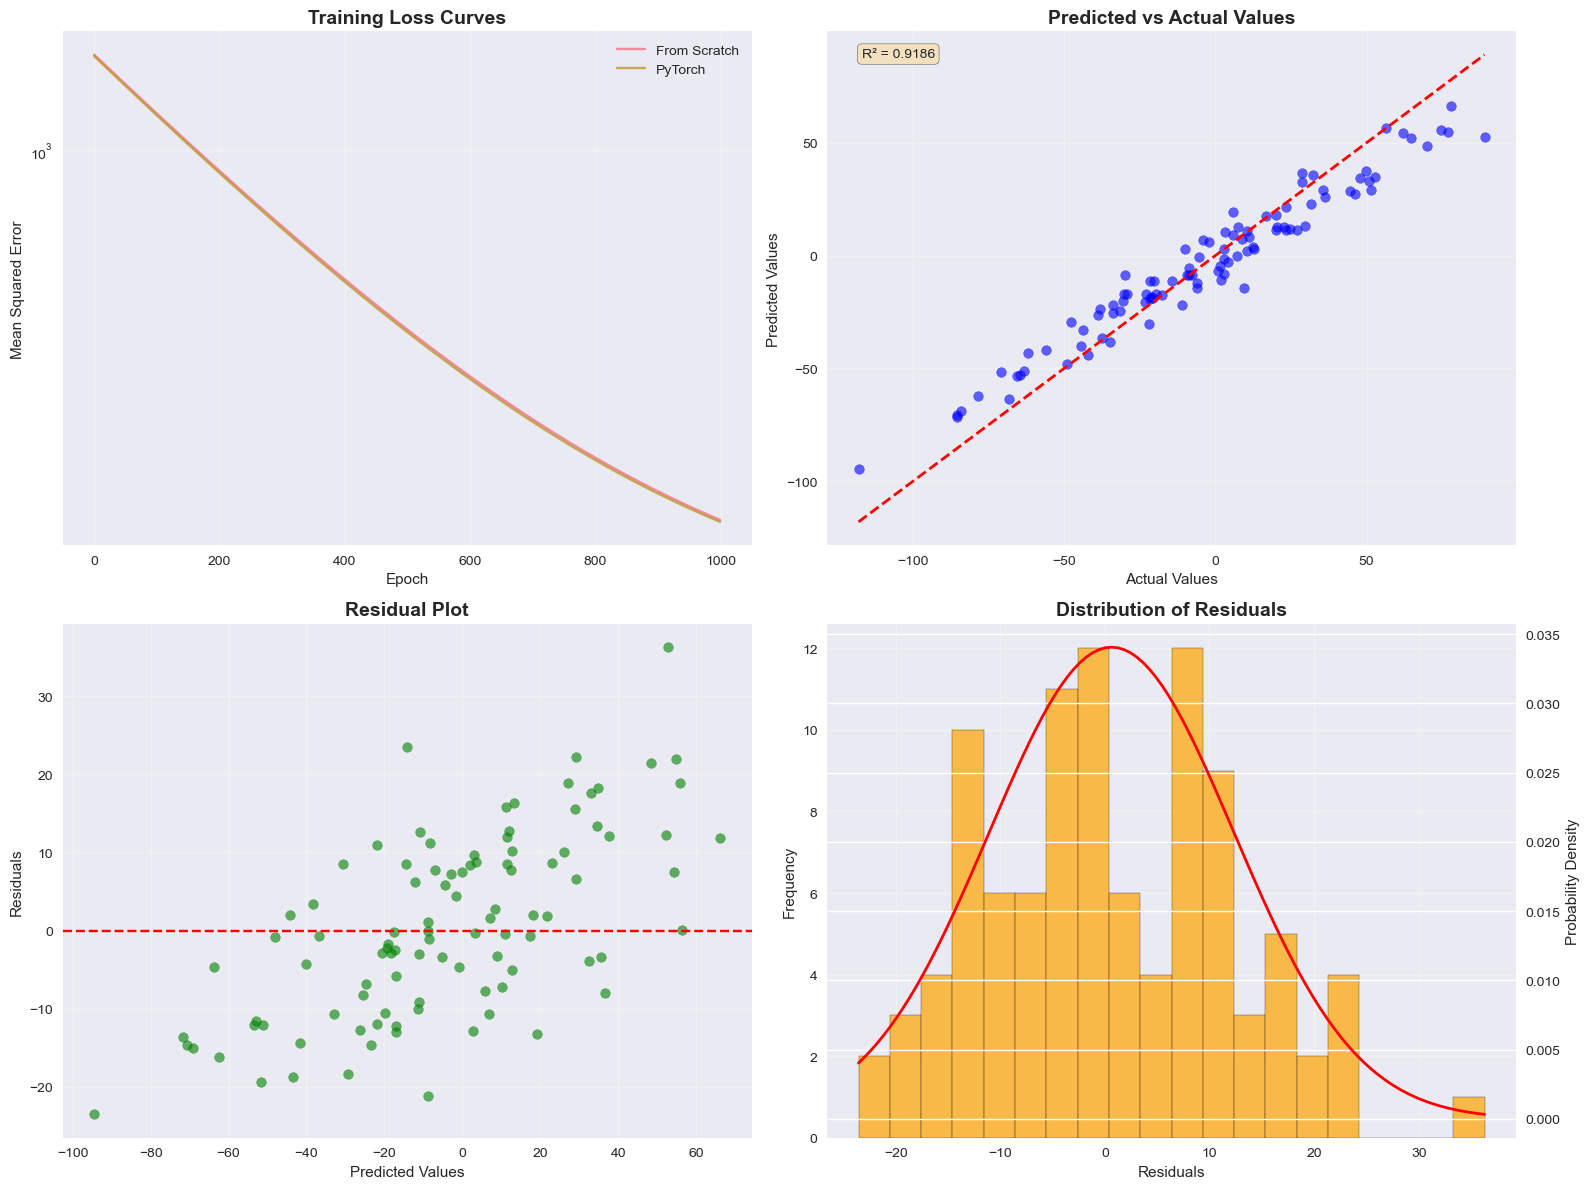

📊 Model Evaluation Metrics:
Mean Squared Error: 137.6009
Mean Absolute Error: 9.6241
R² Score: 0.9186
Root Mean Squared Error: 11.7303


In [6]:
# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Loss Curves Comparison
ax1.plot(model_scratch.losses, label='From Scratch', alpha=0.8)
ax1.plot(losses_pytorch, label='PyTorch', alpha=0.8)
ax1.set_title('Training Loss Curves', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')  # Log scale to better see convergence

# 2. Predicted vs Actual Values
ax2.scatter(y_train, y_pred_pytorch.flatten(), alpha=0.6, color='blue')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax2.set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.grid(True, alpha=0.3)

# Add R² score
r2 = r2_score(y_train, y_pred_pytorch.flatten())
ax2.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax2.transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Residual Analysis
residuals = y_train - y_pred_pytorch.flatten()
ax3.scatter(y_pred_pytorch.flatten(), residuals, alpha=0.6, color='green')
ax3.axhline(y=0, color='red', linestyle='--')
ax3.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Residuals')
ax3.grid(True, alpha=0.3)

# 4. Distribution of Residuals
ax4.hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
ax4.set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Frequency')
ax4.grid(True, alpha=0.3)

# Add normal distribution overlay
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * 
     np.exp(-0.5 * (1 / sigma * (x - mu)) ** 2))
ax4_twin = ax4.twinx()
ax4_twin.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')
ax4_twin.set_ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Print evaluation metrics
print("📊 Model Evaluation Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_pytorch.flatten()):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_pytorch.flatten()):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_pytorch.flatten()):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_pytorch.flatten())):.4f}")

## 7. Gradient Descent Visualization 🎯

Understanding how gradient descent navigates the parameter space to find optimal weights and bias:

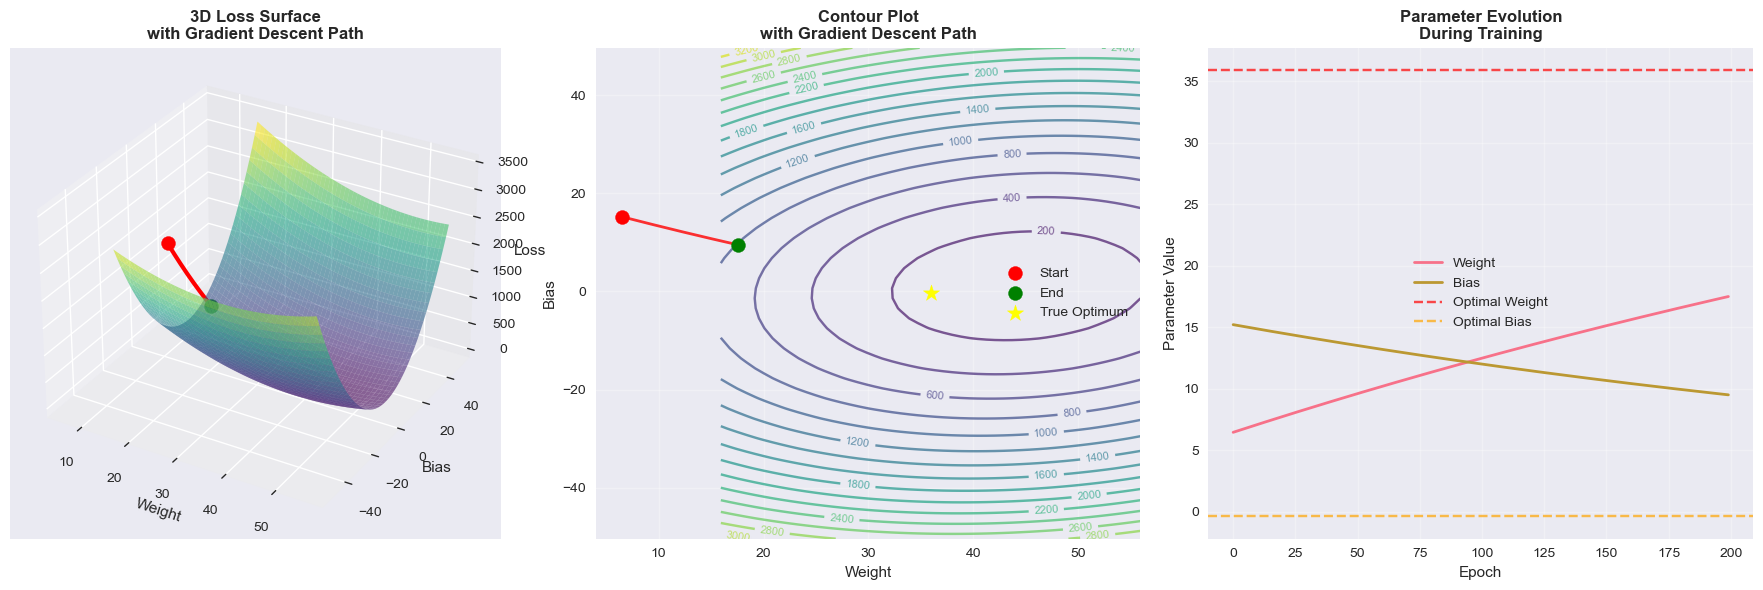

🎯 Gradient Descent Journey:
Starting point: Weight=6.48, Bias=15.23
Ending point: Weight=17.52, Bias=9.52
Optimal point: Weight=35.93, Bias=-0.36
Final loss: 794.2388


In [7]:
def compute_loss_surface(X, y, w_range, b_range):
    """Compute loss surface for visualization"""
    W, B = np.meshgrid(w_range, b_range)
    Z = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            y_pred = W[i, j] * X + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)
    
    return W, B, Z

# Create weight and bias ranges around the optimal values
w_optimal = final_weight
b_optimal = final_bias

w_range = np.linspace(w_optimal - 20, w_optimal + 20, 50)
b_range = np.linspace(b_optimal - 50, b_optimal + 50, 50)

# Compute loss surface
W, B, Z = compute_loss_surface(X_train, y_train, w_range, b_range)

# Track gradient descent path
class GradientDescentTracker:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weight_history = []
        self.bias_history = []
        self.loss_history = []
        
    def fit(self, X, y, epochs=100):
        # Initialize parameters (start from a different point)
        weight = np.random.randn() * 10
        bias = np.random.randn() * 10
        
        n = len(X)
        
        for epoch in range(epochs):
            # Store current parameters
            self.weight_history.append(weight)
            self.bias_history.append(bias)
            
            # Forward pass
            y_pred = weight * X + bias
            loss = np.mean((y - y_pred) ** 2)
            self.loss_history.append(loss)
            
            # Calculate gradients
            dw = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)
            
            # Update parameters
            weight -= self.learning_rate * dw
            bias -= self.learning_rate * db

# Track gradient descent path
tracker = GradientDescentTracker(learning_rate=0.001)
tracker.fit(X_train, y_train, epochs=200)

# Create visualization
fig = plt.figure(figsize=(18, 6))

# 1. Loss Surface with Gradient Descent Path
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(W, B, Z, alpha=0.6, cmap='viridis')
ax1.plot(tracker.weight_history, tracker.bias_history, tracker.loss_history, 
         'r-', linewidth=3, label='Gradient Descent Path')
ax1.scatter(tracker.weight_history[0], tracker.bias_history[0], tracker.loss_history[0], 
           color='red', s=100, label='Start')
ax1.scatter(tracker.weight_history[-1], tracker.bias_history[-1], tracker.loss_history[-1], 
           color='green', s=100, label='End')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface\nwith Gradient Descent Path', fontweight='bold')

# 2. Contour Plot with Path
ax2 = fig.add_subplot(132)
contour = ax2.contour(W, B, Z, levels=20, cmap='viridis', alpha=0.7)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(tracker.weight_history, tracker.bias_history, 'r-', linewidth=2, alpha=0.8)
ax2.scatter(tracker.weight_history[0], tracker.bias_history[0], 
           color='red', s=100, label='Start', zorder=5)
ax2.scatter(tracker.weight_history[-1], tracker.bias_history[-1], 
           color='green', s=100, label='End', zorder=5)
ax2.scatter(w_optimal, b_optimal, color='yellow', s=150, marker='*', 
           label='True Optimum', zorder=5)
ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_title('Contour Plot\nwith Gradient Descent Path', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Parameter Evolution Over Time
ax3 = fig.add_subplot(133)
ax3.plot(tracker.weight_history, label='Weight', linewidth=2)
ax3.plot(tracker.bias_history, label='Bias', linewidth=2)
ax3.axhline(y=w_optimal, color='red', linestyle='--', alpha=0.7, label='Optimal Weight')
ax3.axhline(y=b_optimal, color='orange', linestyle='--', alpha=0.7, label='Optimal Bias')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Parameter Value')
ax3.set_title('Parameter Evolution\nDuring Training', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 Gradient Descent Journey:")
print(f"Starting point: Weight={tracker.weight_history[0]:.2f}, Bias={tracker.bias_history[0]:.2f}")
print(f"Ending point: Weight={tracker.weight_history[-1]:.2f}, Bias={tracker.bias_history[-1]:.2f}")
print(f"Optimal point: Weight={w_optimal:.2f}, Bias={b_optimal:.2f}")
print(f"Final loss: {tracker.loss_history[-1]:.4f}")

## 8. Effect of Learning Rate Analysis 🎚️

The learning rate is crucial for gradient descent convergence. Let's experiment with different values:

Testing learning rate: 0.1
Testing learning rate: 0.01
Testing learning rate: 0.001
Testing learning rate: 0.0001


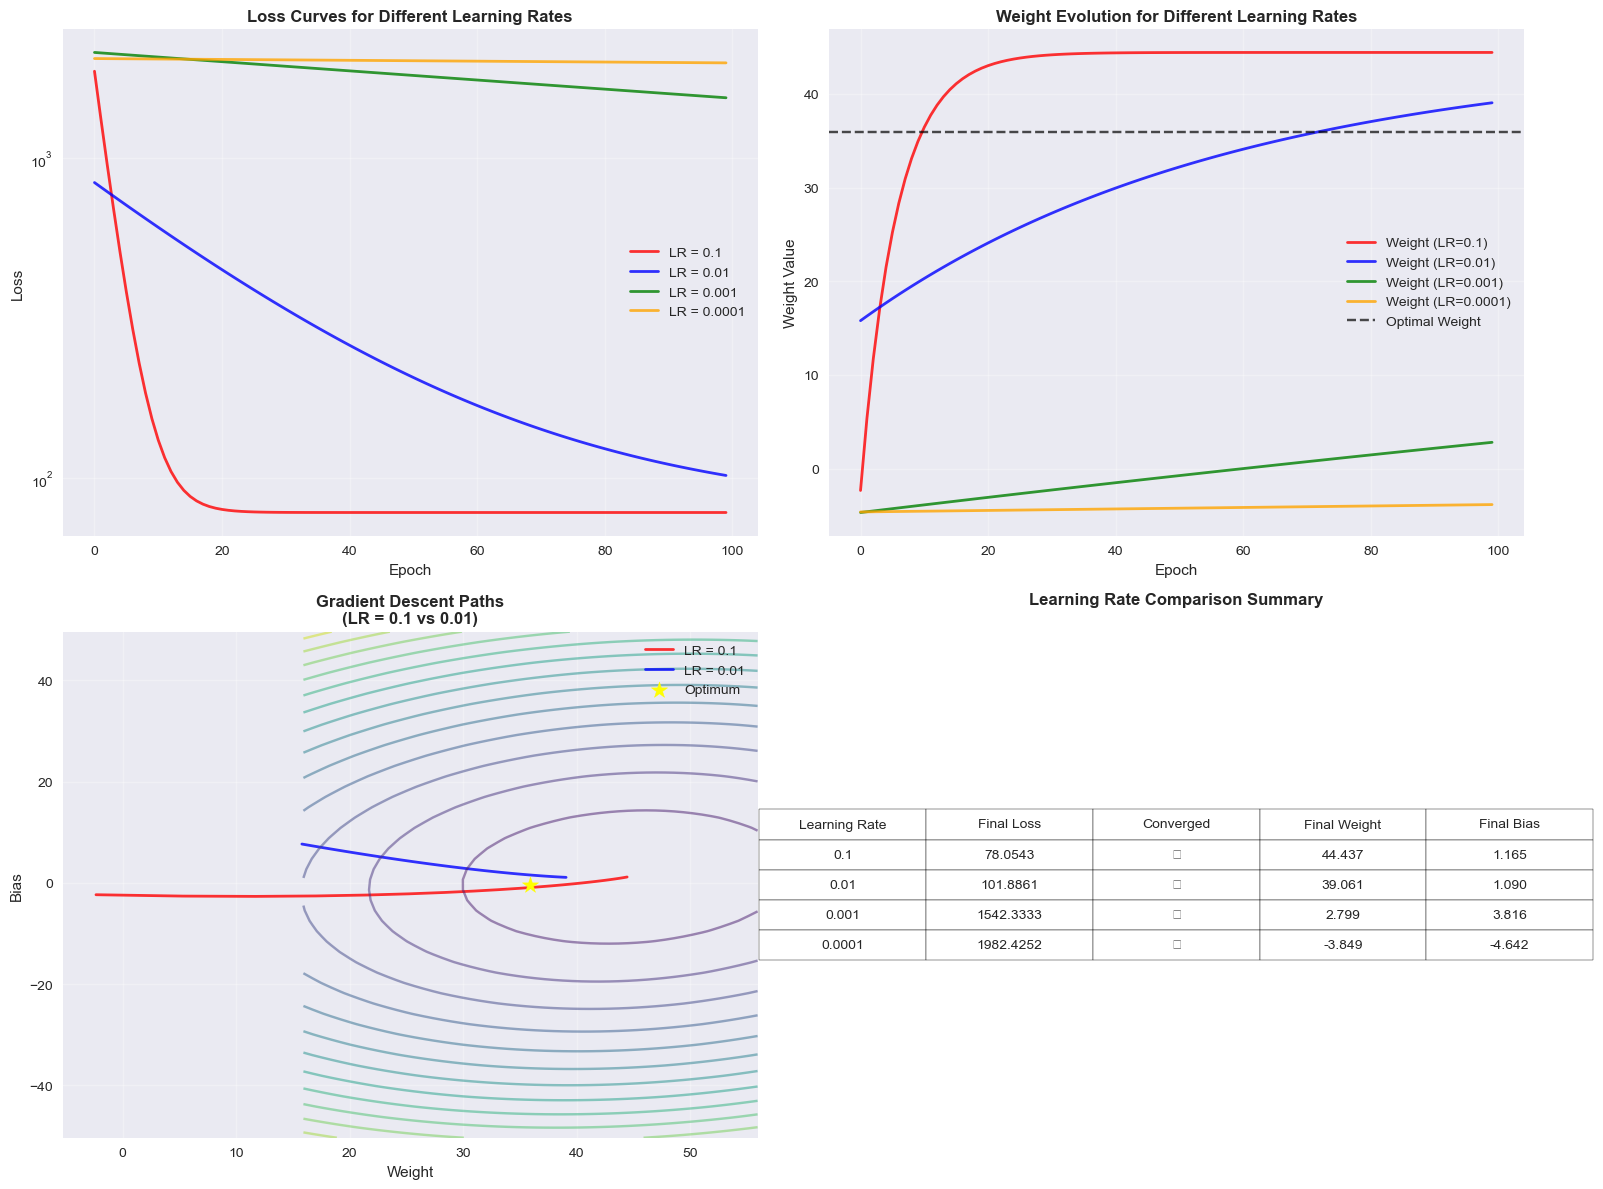


📊 Learning Rate Analysis:
LR    0.1: Final Loss =  78.0543 | Status: Converged
LR   0.01: Final Loss = 101.8861 | Status: Oscillating/Diverging
LR  0.001: Final Loss = 1542.3333 | Status: Oscillating/Diverging
LR 0.0001: Final Loss = 1982.4252 | Status: Oscillating/Diverging

💡 Key Insights:
• Too high learning rate (0.1): May overshoot and oscillate
• Too low learning rate (0.0001): Very slow convergence
• Optimal learning rate (0.001-0.01): Good balance of speed and stability


In [8]:
# Test different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
colors = ['red', 'blue', 'green', 'orange']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

results = {}

for i, lr in enumerate(learning_rates):
    print(f"Testing learning rate: {lr}")
    
    # Train model with specific learning rate
    tracker_lr = GradientDescentTracker(learning_rate=lr)
    tracker_lr.fit(X_train, y_train, epochs=100)
    
    results[lr] = {
        'losses': tracker_lr.loss_history,
        'weights': tracker_lr.weight_history,
        'biases': tracker_lr.bias_history,
        'final_loss': tracker_lr.loss_history[-1],
        'converged': len(tracker_lr.loss_history) > 10 and 
                    abs(tracker_lr.loss_history[-1] - tracker_lr.loss_history[-10]) < 0.01
    }
    
    # Plot loss curves
    ax1.plot(tracker_lr.loss_history, label=f'LR = {lr}', 
             color=colors[i], linewidth=2, alpha=0.8)
    
    # Plot parameter evolution
    ax2.plot(tracker_lr.weight_history, label=f'Weight (LR={lr})', 
             color=colors[i], linewidth=2, alpha=0.8)
    
    # Plot gradient descent paths on contour
    if i < 2:  # Only plot first two to avoid clutter
        ax3.plot(tracker_lr.weight_history, tracker_lr.bias_history, 
                color=colors[i], linewidth=2, alpha=0.8, label=f'LR = {lr}')

# Configure loss plot
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Curves for Different Learning Rates', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Configure weight evolution plot
ax2.axhline(y=w_optimal, color='black', linestyle='--', alpha=0.7, label='Optimal Weight')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Weight Value')
ax2.set_title('Weight Evolution for Different Learning Rates', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Configure contour plot with paths
contour = ax3.contour(W, B, Z, levels=15, cmap='viridis', alpha=0.5)
ax3.scatter(w_optimal, b_optimal, color='yellow', s=150, marker='*', 
           label='Optimum', zorder=5)
ax3.set_xlabel('Weight')
ax3.set_ylabel('Bias')
ax3.set_title('Gradient Descent Paths\n(LR = 0.1 vs 0.01)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Create summary table
summary_data = []
for lr in learning_rates:
    summary_data.append([
        lr, 
        f"{results[lr]['final_loss']:.4f}",
        "✅" if results[lr]['converged'] else "❌",
        f"{results[lr]['weights'][-1]:.3f}",
        f"{results[lr]['biases'][-1]:.3f}"
    ])

# Display summary table
ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=summary_data,
                  colLabels=['Learning Rate', 'Final Loss', 'Converged', 'Final Weight', 'Final Bias'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax4.set_title('Learning Rate Comparison Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print analysis
print("\n📊 Learning Rate Analysis:")
print("=" * 50)
for lr in learning_rates:
    status = "Converged" if results[lr]['converged'] else "Oscillating/Diverging"
    print(f"LR {lr:>6}: Final Loss = {results[lr]['final_loss']:>8.4f} | Status: {status}")

print("\n💡 Key Insights:")
print("• Too high learning rate (0.1): May overshoot and oscillate")
print("• Too low learning rate (0.0001): Very slow convergence")
print("• Optimal learning rate (0.001-0.01): Good balance of speed and stability")

## 9. Regularization Techniques (L1/L2) 🛡️

Regularization helps prevent overfitting by adding penalty terms to the loss function:

### 📝 Theory:
- **L1 Regularization (Lasso)**: Loss = MSE + λ|w|
- **L2 Regularization (Ridge)**: Loss = MSE + λw²
- **λ (lambda)**: Regularization strength

### Effects:
- **L1**: Promotes sparsity (some weights become exactly 0)
- **L2**: Promotes smaller weights overall
- Both help prevent overfitting on complex models

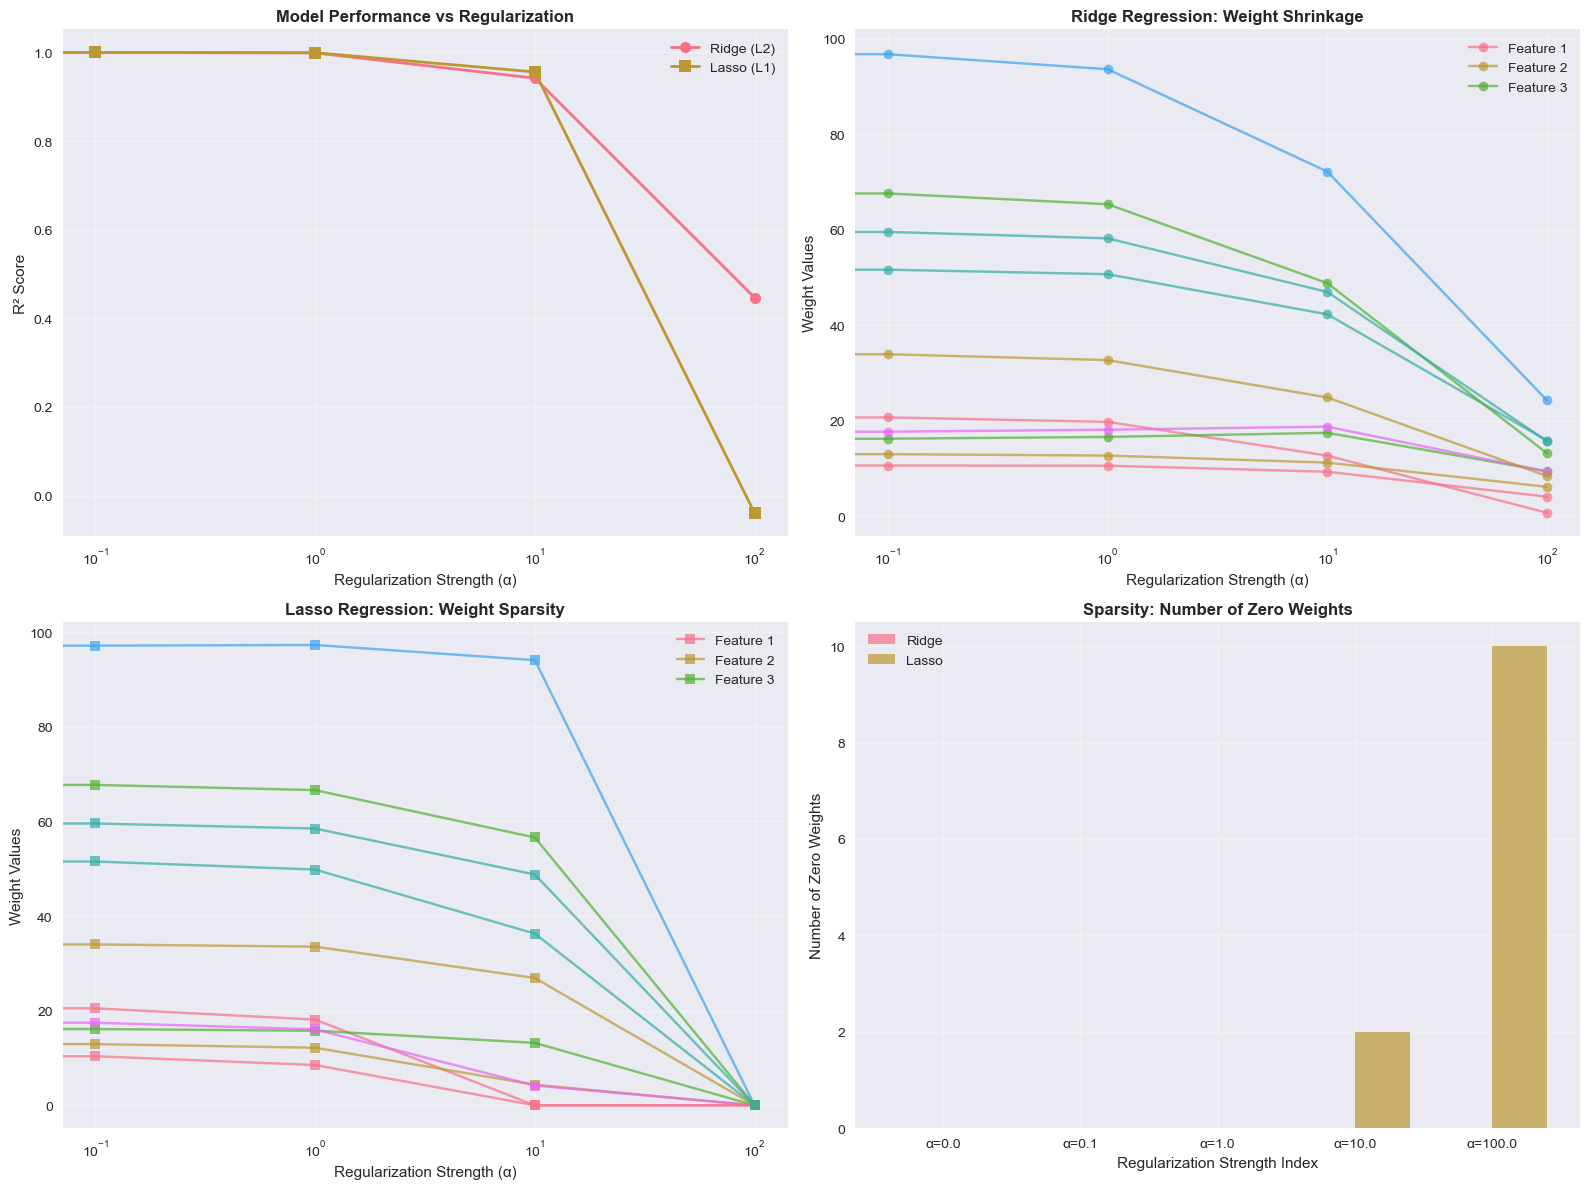

📊 Regularization Comparison:
Alpha    Ridge R²   Lasso R²   Ridge Zeros  Lasso Zeros
------------------------------------------------------------
0.0      1.0000     1.0000     0            0
0.1      1.0000     1.0000     0            0
1.0      0.9989     0.9995     0            0
10.0     0.9420     0.9560     0            2
100.0    0.4467     -0.0390    0            10

💡 Key Observations:
• Ridge (L2) shrinks weights gradually but rarely makes them exactly zero
• Lasso (L1) can make weights exactly zero, leading to feature selection
• Higher α values lead to more regularization (simpler models)
• Sweet spot balances model complexity and performance


In [9]:
# Create a more complex dataset for regularization demonstration
X_complex, y_complex = make_regression(
    n_samples=50, 
    n_features=10,  # Multiple features
    noise=0.1, 
    random_state=42
)

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_complex, y_complex, test_size=0.3, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Test different regularization strengths
alphas = [0.0, 0.1, 1.0, 10.0, 100.0]
ridge_scores = []
lasso_scores = []
ridge_weights = []
lasso_weights = []

# Train models with different regularization strengths
for alpha in alphas:
    # Ridge Regression (L2)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_reg_scaled, y_train_reg)
    ridge_score = ridge.score(X_test_reg_scaled, y_test_reg)
    ridge_scores.append(ridge_score)
    ridge_weights.append(ridge.coef_)
    
    # Lasso Regression (L1)
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(X_train_reg_scaled, y_train_reg)
    lasso_score = lasso.score(X_test_reg_scaled, y_test_reg)
    lasso_scores.append(lasso_score)
    lasso_weights.append(lasso.coef_)

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model Performance vs Regularization Strength
ax1.plot(alphas, ridge_scores, 'o-', label='Ridge (L2)', linewidth=2, markersize=8)
ax1.plot(alphas, lasso_scores, 's-', label='Lasso (L1)', linewidth=2, markersize=8)
ax1.set_xlabel('Regularization Strength (α)')
ax1.set_ylabel('R² Score')
ax1.set_title('Model Performance vs Regularization', fontweight='bold')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Ridge Weights Evolution
ridge_weights_array = np.array(ridge_weights)
for i in range(ridge_weights_array.shape[1]):
    ax2.plot(alphas, ridge_weights_array[:, i], 'o-', alpha=0.7, 
             label=f'Feature {i+1}' if i < 3 else "")
ax2.set_xlabel('Regularization Strength (α)')
ax2.set_ylabel('Weight Values')
ax2.set_title('Ridge Regression: Weight Shrinkage', fontweight='bold')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Lasso Weights Evolution
lasso_weights_array = np.array(lasso_weights)
for i in range(lasso_weights_array.shape[1]):
    ax3.plot(alphas, lasso_weights_array[:, i], 's-', alpha=0.7,
             label=f'Feature {i+1}' if i < 3 else "")
ax3.set_xlabel('Regularization Strength (α)')
ax3.set_ylabel('Weight Values')
ax3.set_title('Lasso Regression: Weight Sparsity', fontweight='bold')
ax3.set_xscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Number of Zero Weights (Sparsity)
zero_counts_ridge = [np.sum(np.abs(w) < 1e-10) for w in ridge_weights]
zero_counts_lasso = [np.sum(np.abs(w) < 1e-10) for w in lasso_weights]

ax4.bar(np.arange(len(alphas)) - 0.2, zero_counts_ridge, 0.4, 
        label='Ridge', alpha=0.7)
ax4.bar(np.arange(len(alphas)) + 0.2, zero_counts_lasso, 0.4, 
        label='Lasso', alpha=0.7)
ax4.set_xlabel('Regularization Strength Index')
ax4.set_ylabel('Number of Zero Weights')
ax4.set_title('Sparsity: Number of Zero Weights', fontweight='bold')
ax4.set_xticks(range(len(alphas)))
ax4.set_xticklabels([f'α={a}' for a in alphas])
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("📊 Regularization Comparison:")
print("=" * 60)
print(f"{'Alpha':<8} {'Ridge R²':<10} {'Lasso R²':<10} {'Ridge Zeros':<12} {'Lasso Zeros'}")
print("-" * 60)
for i, alpha in enumerate(alphas):
    print(f"{alpha:<8} {ridge_scores[i]:<10.4f} {lasso_scores[i]:<10.4f} "
          f"{zero_counts_ridge[i]:<12} {zero_counts_lasso[i]}")

print("\n💡 Key Observations:")
print("• Ridge (L2) shrinks weights gradually but rarely makes them exactly zero")
print("• Lasso (L1) can make weights exactly zero, leading to feature selection")
print("• Higher α values lead to more regularization (simpler models)")
print("• Sweet spot balances model complexity and performance")

## 10. Model Evaluation and Metrics 📏

Understanding various evaluation metrics and their interpretations:

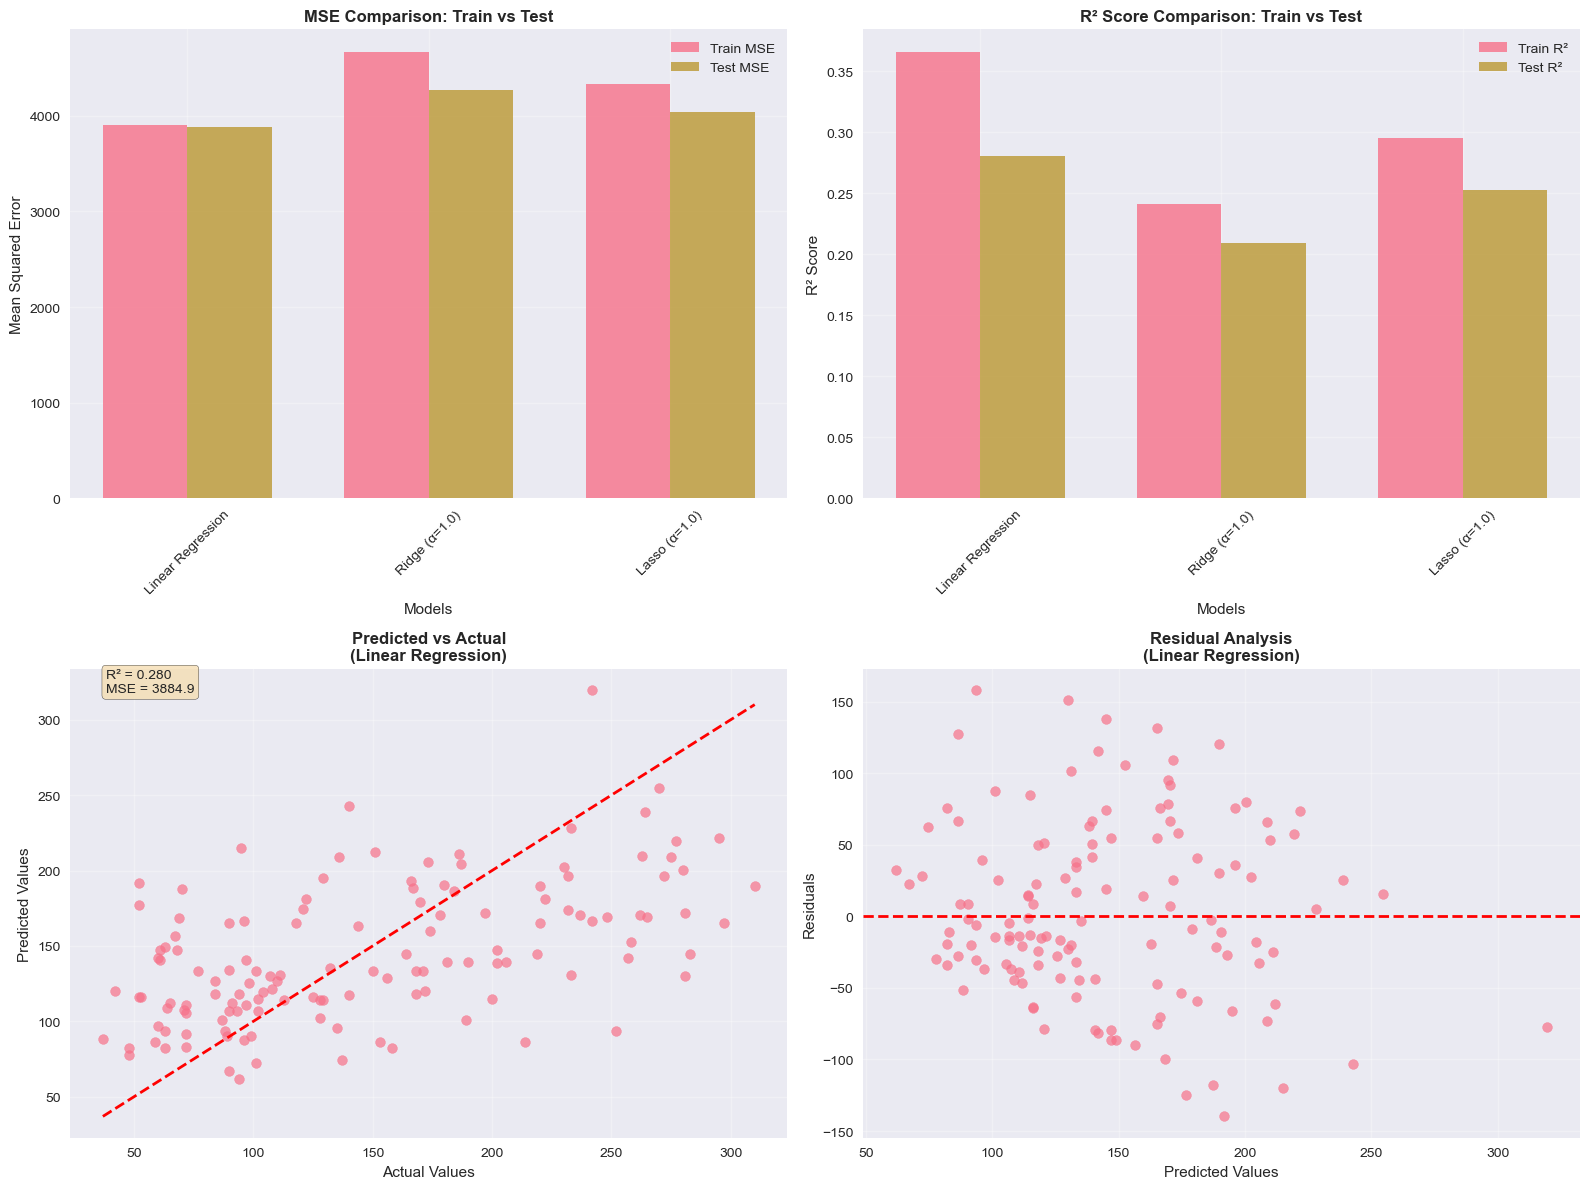

📊 Comprehensive Model Evaluation on Diabetes Dataset:
Model                Train MSE  Test MSE   Train R²   Test R²    Overfitting
--------------------------------------------------------------------------------
Linear Regression    3899.5     3884.9     0.366      0.280      Medium
Ridge (α=1.0)        4667.4     4267.8     0.241      0.209      Low
Lasso (α=1.0)        4333.9     4036.1     0.295      0.252      Low

🏆 Best Model: Linear Regression
✅ Test R² Score: 0.280
✅ Test RMSE: 62.33

📝 Metric Interpretations:
• MSE (Mean Squared Error): Lower is better, measures average squared prediction errors
• MAE (Mean Absolute Error): Lower is better, measures average absolute prediction errors
• R² (R-squared): Higher is better (0-1), measures proportion of variance explained
• RMSE (Root Mean Squared Error): Lower is better, measures standard deviation of prediction errors


In [10]:
# Apply our best model to the real diabetes dataset
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_real_single, y_real, test_size=0.3, random_state=42
)

# Train different models on real data
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=1.0)': Lasso(alpha=1.0)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions
    y_train_pred = model.predict(X_diabetes_train)
    y_test_pred = model.predict(X_diabetes_test)
    
    # Calculate metrics
    results[name] = {
        'train_mse': mean_squared_error(y_diabetes_train, y_train_pred),
        'test_mse': mean_squared_error(y_diabetes_test, y_test_pred),
        'train_mae': mean_absolute_error(y_diabetes_train, y_train_pred),
        'test_mae': mean_absolute_error(y_diabetes_test, y_test_pred),
        'train_r2': r2_score(y_diabetes_train, y_train_pred),
        'test_r2': r2_score(y_diabetes_test, y_test_pred),
        'y_test_pred': y_test_pred
    }

# Create comprehensive evaluation visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Metrics Comparison
metrics = ['MSE', 'MAE', 'R²']
train_metrics = []
test_metrics = []
model_names = list(results.keys())

for model in model_names:
    train_metrics.append([
        results[model]['train_mse'],
        results[model]['train_mae'],
        results[model]['train_r2']
    ])
    test_metrics.append([
        results[model]['test_mse'],
        results[model]['test_mae'],
        results[model]['test_r2']
    ])

x = np.arange(len(model_names))
width = 0.35

# Plot MSE comparison
mse_train = [m[0] for m in train_metrics]
mse_test = [m[0] for m in test_metrics]
ax1.bar(x - width/2, mse_train, width, label='Train MSE', alpha=0.8)
ax1.bar(x + width/2, mse_test, width, label='Test MSE', alpha=0.8)
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Comparison: Train vs Test', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. R² Score Comparison
r2_train = [m[2] for m in train_metrics]
r2_test = [m[2] for m in test_metrics]
ax2.bar(x - width/2, r2_train, width, label='Train R²', alpha=0.8)
ax2.bar(x + width/2, r2_test, width, label='Test R²', alpha=0.8)
ax2.set_xlabel('Models')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score Comparison: Train vs Test', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Predicted vs Actual for best model (highest test R²)
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_predictions = results[best_model_name]['y_test_pred']

ax3.scatter(y_diabetes_test, best_predictions, alpha=0.7, s=50)
ax3.plot([y_diabetes_test.min(), y_diabetes_test.max()], 
         [y_diabetes_test.min(), y_diabetes_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Values')
ax3.set_ylabel('Predicted Values')
ax3.set_title(f'Predicted vs Actual\n({best_model_name})', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add performance metrics text
r2_score_best = results[best_model_name]['test_r2']
mse_score_best = results[best_model_name]['test_mse']
ax3.text(0.05, 0.95, f'R² = {r2_score_best:.3f}\nMSE = {mse_score_best:.1f}', 
         transform=ax3.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Residual Analysis for best model
residuals_best = y_diabetes_test - best_predictions
ax4.scatter(best_predictions, residuals_best, alpha=0.7, s=50)
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Values')
ax4.set_ylabel('Residuals')
ax4.set_title(f'Residual Analysis\n({best_model_name})', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed metrics table
print("📊 Comprehensive Model Evaluation on Diabetes Dataset:")
print("=" * 80)
print(f"{'Model':<20} {'Train MSE':<10} {'Test MSE':<10} {'Train R²':<10} {'Test R²':<10} {'Overfitting'}")
print("-" * 80)

for name in model_names:
    train_mse = results[name]['train_mse']
    test_mse = results[name]['test_mse']
    train_r2 = results[name]['train_r2']
    test_r2 = results[name]['test_r2']
    
    # Check for overfitting (significant performance drop from train to test)
    r2_diff = train_r2 - test_r2
    overfitting = "High" if r2_diff > 0.1 else ("Medium" if r2_diff > 0.05 else "Low")
    
    print(f"{name:<20} {train_mse:<10.1f} {test_mse:<10.1f} {train_r2:<10.3f} {test_r2:<10.3f} {overfitting}")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"✅ Test R² Score: {results[best_model_name]['test_r2']:.3f}")
print(f"✅ Test RMSE: {np.sqrt(results[best_model_name]['test_mse']):.2f}")

print("\n📝 Metric Interpretations:")
print("• MSE (Mean Squared Error): Lower is better, measures average squared prediction errors")
print("• MAE (Mean Absolute Error): Lower is better, measures average absolute prediction errors")
print("• R² (R-squared): Higher is better (0-1), measures proportion of variance explained")
print("• RMSE (Root Mean Squared Error): Lower is better, measures standard deviation of prediction errors")

## 🎓 Linear Regression Summary & Key Takeaways

### ✅ What We've Learned:

1. **Mathematical Foundation**: Linear regression as y = wx + b with MSE loss
2. **Implementation Approaches**: From scratch, PyTorch, and scikit-learn
3. **Gradient Descent**: How optimization navigates parameter space
4. **Learning Rate Effects**: Impact on convergence speed and stability
5. **Regularization**: L1 (Lasso) and L2 (Ridge) for preventing overfitting
6. **Evaluation Metrics**: MSE, MAE, R², and residual analysis

### 🔗 Connection to Deep Learning:

Linear regression is the foundation for understanding:
- **Neural Networks**: Multiple linear transformations with non-linearities
- **Backpropagation**: Same gradient descent principles
- **Loss Functions**: MSE extends to more complex losses
- **Regularization**: Same concepts apply to prevent overfitting in deep models
- **Optimization**: SGD, Adam, etc. build upon basic gradient descent

### 📚 Next Steps in Our Deep Learning Journey:

1. **Logistic Regression**: Classification and sigmoid activation
2. **Multi-layer Perceptrons**: Adding hidden layers and non-linearities
3. **Convolutional Neural Networks**: For image processing
4. **Recurrent Neural Networks**: For sequential data
5. **Advanced Optimization**: Adam, RMSprop, learning rate scheduling
6. **Deep Learning Architectures**: ResNet, Transformers, etc.

---

### 💡 Exam Tips:
- Understand the mathematical foundations
- Know when to use different regularization techniques
- Practice implementing from scratch to understand the mechanics
- Remember the connection between linear regression and neural networks
- Focus on interpreting evaluation metrics correctly

**Ready for the next concept! 🚀**

---

## Chapter 2: Classification Evaluation Metrics 🎯
## Understanding Model Performance Beyond Accuracy

Moving from regression to classification, we need different evaluation metrics to understand model performance. This chapter covers comprehensive evaluation techniques essential for classification tasks.

### 📋 What We'll Cover:

1. **Confusion Matrix**: The foundation of classification evaluation
2. **Basic Metrics**: Precision, Recall, F1-score, Specificity
3. **Multi-class Metrics**: Macro, Micro, and Weighted averaging
4. **Advanced Metrics**: ROC curves, AUC, Precision-Recall curves
5. **Practical Implementation**: Real datasets and PyTorch integration
6. **Class Imbalance**: Handling and evaluating imbalanced datasets

### 🔗 Connection to Deep Learning:
These metrics are crucial for evaluating neural networks, especially in:
- **Image Classification**: CNNs for computer vision
- **Natural Language Processing**: Text classification and sentiment analysis
- **Medical AI**: Disease diagnosis and screening systems

## 1. Import Additional Libraries for Classification 📦

In [11]:
# Additional imports for classification evaluation
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Classification evaluation metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    precision_score, recall_score, f1_score, accuracy_score,
    precision_recall_curve, roc_curve, roc_auc_score,
    average_precision_score, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score
)

# Visualization for classification
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
import itertools

# PyTorch for neural network classification
import torch.nn.functional as F
from torch.utils.data import Dataset

print("✅ Classification libraries imported successfully!")
print("🎯 Ready for comprehensive model evaluation!")

✅ Classification libraries imported successfully!
🎯 Ready for comprehensive model evaluation!


## 2. Generate Classification Datasets 📊

We'll work with multiple datasets to understand different evaluation scenarios:

### 📝 Dataset Types:
1. **Binary Classification**: Breast cancer diagnosis (2 classes)
2. **Multi-class Classification**: Iris flower species (3 classes)
3. **Imbalanced Dataset**: Synthetic dataset with class imbalance
4. **Custom Synthetic**: Controlled dataset for demonstration

📊 Loading Real Datasets...


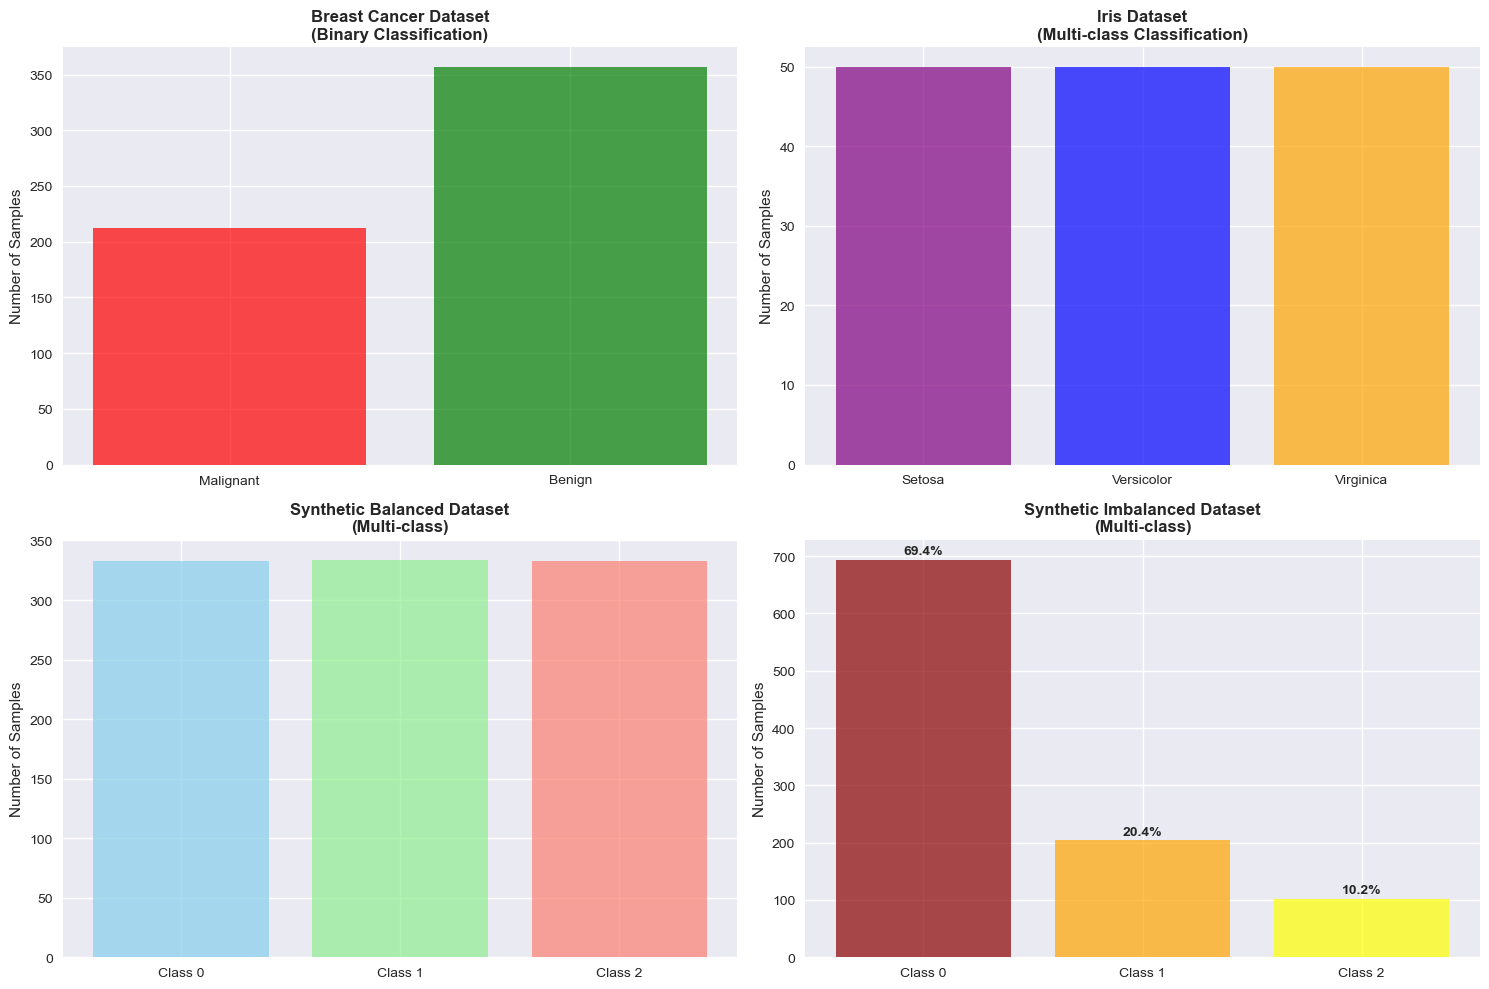

📈 Dataset Summary:
Binary (Breast Cancer): 569 samples, 30 features
Multi-class (Iris): 150 samples, 4 features
Balanced Synthetic: 1000 samples, 20 features
Imbalanced Synthetic: 1000 samples, 20 features

🎯 Class distributions:
Breast Cancer: [212 357]
Iris: [50 50 50]
Balanced: [333 334 333]
Imbalanced: [694 204 102]


In [12]:
# Load real datasets
print("📊 Loading Real Datasets...")

# 1. Binary Classification - Breast Cancer
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

# 2. Multi-class Classification - Iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# 3. Synthetic Balanced Dataset
X_balanced, y_balanced = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=3, n_clusters_per_class=1, weights=None,  # Balanced
    random_state=42
)
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# 4. Synthetic Imbalanced Dataset
X_imbalanced, y_imbalanced = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=3, n_clusters_per_class=1, 
    weights=[0.7, 0.2, 0.1],  # Imbalanced: 70%, 20%, 10%
    random_state=42
)
X_imb_train, X_imb_test, y_imb_train, y_imb_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced
)

# Visualize class distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Binary Classification
ax1.bar(['Malignant', 'Benign'], [np.sum(y_cancer == 0), np.sum(y_cancer == 1)], 
        color=['red', 'green'], alpha=0.7)
ax1.set_title('Breast Cancer Dataset\n(Binary Classification)', fontweight='bold')
ax1.set_ylabel('Number of Samples')

# Multi-class Classification  
species_names = ['Setosa', 'Versicolor', 'Virginica']
ax2.bar(species_names, [np.sum(y_iris == i) for i in range(3)], 
        color=['purple', 'blue', 'orange'], alpha=0.7)
ax2.set_title('Iris Dataset\n(Multi-class Classification)', fontweight='bold')
ax2.set_ylabel('Number of Samples')

# Balanced Dataset
ax3.bar([f'Class {i}' for i in range(3)], [np.sum(y_balanced == i) for i in range(3)], 
        color=['skyblue', 'lightgreen', 'salmon'], alpha=0.7)
ax3.set_title('Synthetic Balanced Dataset\n(Multi-class)', fontweight='bold')
ax3.set_ylabel('Number of Samples')

# Imbalanced Dataset
counts_imb = [np.sum(y_imbalanced == i) for i in range(3)]
ax4.bar([f'Class {i}' for i in range(3)], counts_imb, 
        color=['darkred', 'orange', 'yellow'], alpha=0.7)
ax4.set_title('Synthetic Imbalanced Dataset\n(Multi-class)', fontweight='bold')
ax4.set_ylabel('Number of Samples')
# Add percentage labels
for i, count in enumerate(counts_imb):
    pct = count / len(y_imbalanced) * 100
    ax4.text(i, count + 10, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print dataset information
print("📈 Dataset Summary:")
print("=" * 50)
print(f"Binary (Breast Cancer): {X_cancer.shape[0]} samples, {X_cancer.shape[1]} features")
print(f"Multi-class (Iris): {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"Balanced Synthetic: {X_balanced.shape[0]} samples, {X_balanced.shape[1]} features")
print(f"Imbalanced Synthetic: {X_imbalanced.shape[0]} samples, {X_imbalanced.shape[1]} features")

print(f"\n🎯 Class distributions:")
print(f"Breast Cancer: {np.bincount(y_cancer)}")
print(f"Iris: {np.bincount(y_iris)}")
print(f"Balanced: {np.bincount(y_balanced)}")
print(f"Imbalanced: {np.bincount(y_imbalanced)}")

## 3. Confusion Matrix - The Foundation 🎯

### 📝 Theory:
A confusion matrix is a table used to evaluate classification model performance:

**Binary Classification:**
```
                Predicted
              0    |    1
Actual   0   TN   |   FP   (FP = Type I Error)
         1   FN   |   TP   (FN = Type II Error)
```

**Key Terms:**
- **True Positive (TP)**: Correctly predicted positive
- **True Negative (TN)**: Correctly predicted negative  
- **False Positive (FP)**: Incorrectly predicted positive (Type I Error)
- **False Negative (FN)**: Incorrectly predicted negative (Type II Error)

**Multi-class**: Each row represents actual class, each column represents predicted class.

🚀 Training Classification Models...


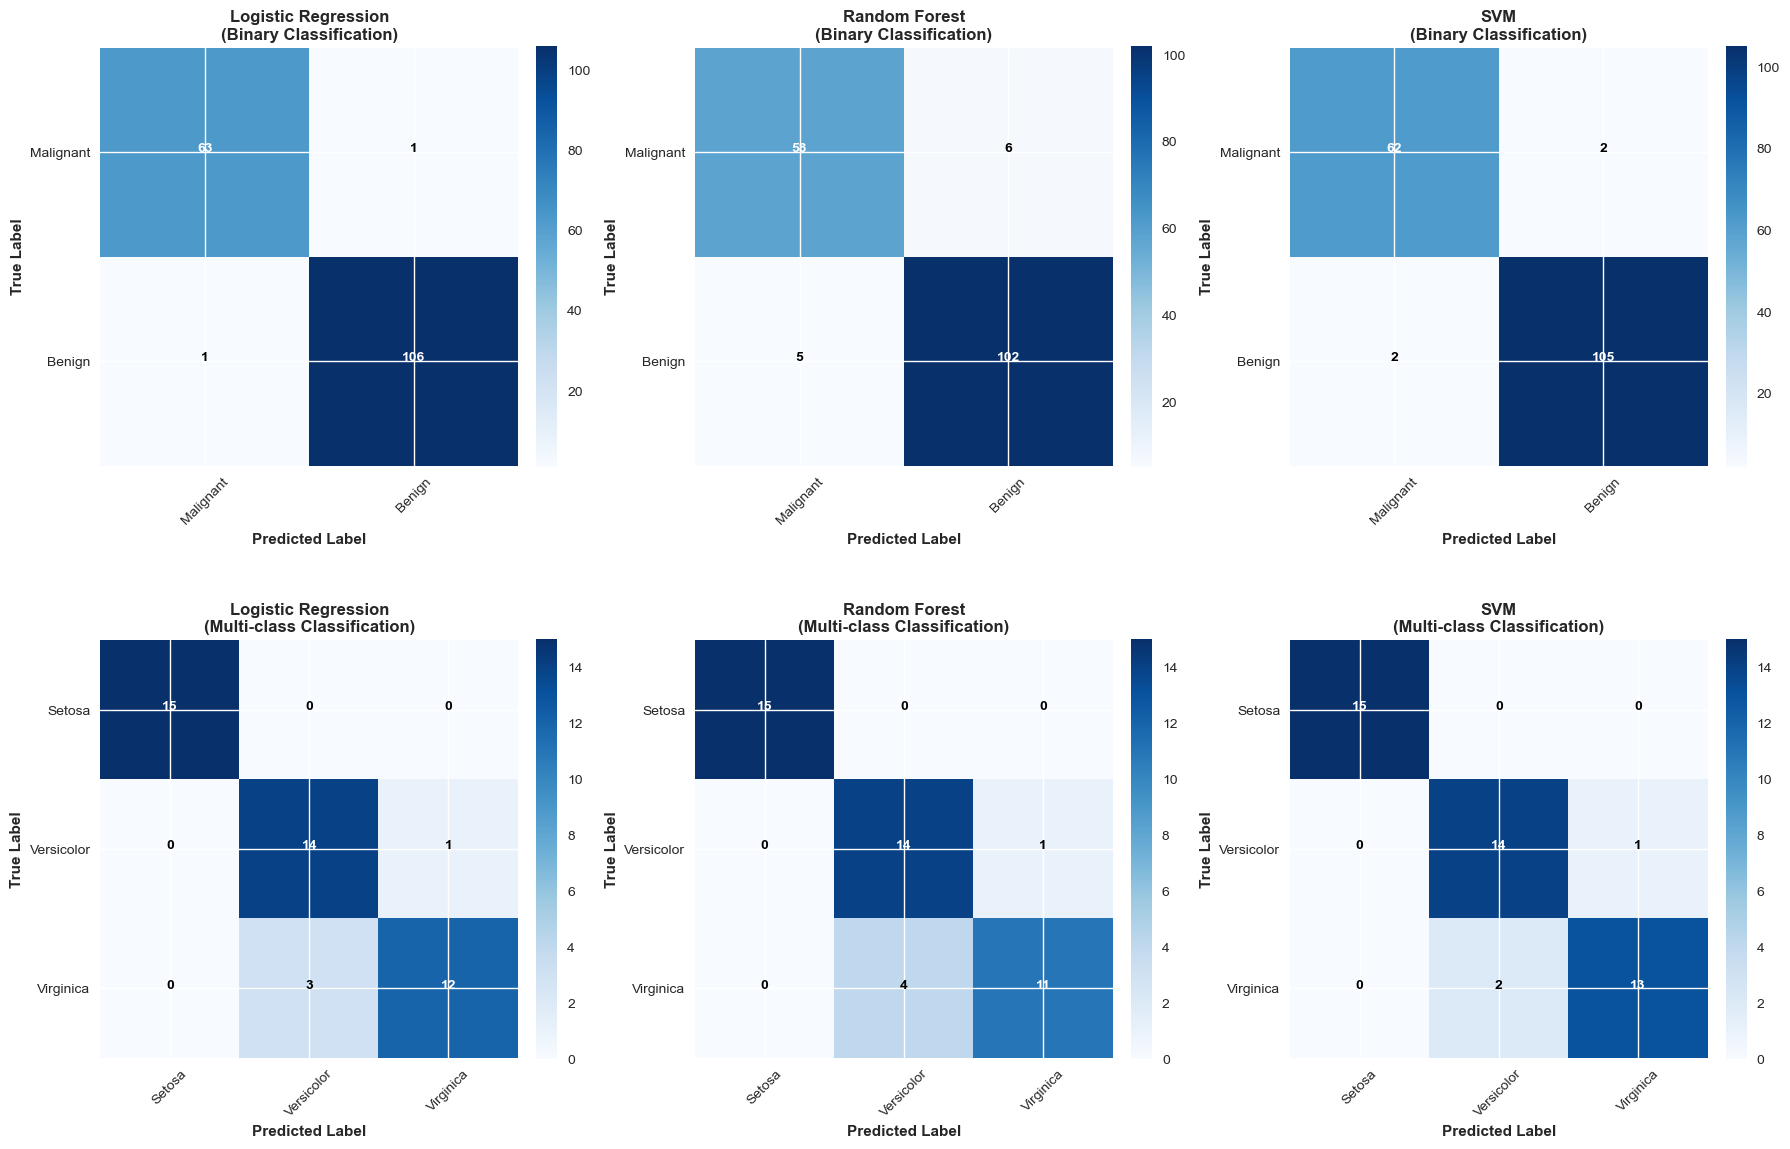

📊 Binary Classification Confusion Matrix Analysis:

Logistic Regression:
  True Negatives (TN):   63  |  False Positives (FP):   1
  False Negatives (FN):   1  |  True Positives (TP):  106
  Total Predictions: 171

Random Forest:
  True Negatives (TN):   58  |  False Positives (FP):   6
  False Negatives (FN):   5  |  True Positives (TP):  102
  Total Predictions: 171

SVM:
  True Negatives (TN):   62  |  False Positives (FP):   2
  False Negatives (FN):   2  |  True Positives (TP):  105
  Total Predictions: 171

💡 Interpretation:
• TP: Correctly identified malignant cases
• TN: Correctly identified benign cases
• FP: Benign cases incorrectly classified as malignant (Type I Error)
• FN: Malignant cases incorrectly classified as benign (Type II Error - more serious!)


In [13]:
def plot_confusion_matrix(cm, class_names, title, ax, normalize=False):
    """
    Plot confusion matrix with beautiful formatting
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(title, fontweight='bold', fontsize=12)
    
    # Add colorbar
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Add labels
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45)
    ax.set_yticklabels(class_names)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
                fontweight='bold')
    
    ax.set_ylabel('True Label', fontweight='bold')
    ax.set_xlabel('Predicted Label', fontweight='bold')

# Train simple models for demonstration
print("🚀 Training Classification Models...")

# Standardize features for better performance
scaler_cancer = StandardScaler()
X_cancer_train_scaled = scaler_cancer.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler_cancer.transform(X_cancer_test)

scaler_iris = StandardScaler()
X_iris_train_scaled = scaler_iris.fit_transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

# Train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

# Binary classification results
binary_results = {}
for name, model in models.items():
    model.fit(X_cancer_train_scaled, y_cancer_train)
    y_pred = model.predict(X_cancer_test_scaled)
    y_proba = model.predict_proba(X_cancer_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    binary_results[name] = {'predictions': y_pred, 'probabilities': y_proba}

# Multi-class classification results  
multiclass_results = {}
for name, model in models.items():
    model.fit(X_iris_train_scaled, y_iris_train)
    y_pred = model.predict(X_iris_test_scaled)
    y_proba = model.predict_proba(X_iris_test_scaled) if hasattr(model, 'predict_proba') else None
    multiclass_results[name] = {'predictions': y_pred, 'probabilities': y_proba}

# Create confusion matrices visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Binary classification confusion matrices
for i, (name, results) in enumerate(binary_results.items()):
    cm = confusion_matrix(y_cancer_test, results['predictions'])
    plot_confusion_matrix(cm, ['Malignant', 'Benign'], 
                         f'{name}\n(Binary Classification)', axes[0, i])

# Multi-class confusion matrices
for i, (name, results) in enumerate(multiclass_results.items()):
    cm = confusion_matrix(y_iris_test, results['predictions'])
    plot_confusion_matrix(cm, ['Setosa', 'Versicolor', 'Virginica'], 
                         f'{name}\n(Multi-class Classification)', axes[1, i])

plt.tight_layout()
plt.show()

# Extract TP, TN, FP, FN for binary classification
print("📊 Binary Classification Confusion Matrix Analysis:")
print("=" * 60)

for name, results in binary_results.items():
    cm = confusion_matrix(y_cancer_test, results['predictions'])
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name}:")
    print(f"  True Negatives (TN):  {tn:3d}  |  False Positives (FP): {fp:3d}")
    print(f"  False Negatives (FN): {fn:3d}  |  True Positives (TP):  {tp:3d}")
    print(f"  Total Predictions: {tn + fp + fn + tp}")

print("\n💡 Interpretation:")
print("• TP: Correctly identified malignant cases")
print("• TN: Correctly identified benign cases") 
print("• FP: Benign cases incorrectly classified as malignant (Type I Error)")
print("• FN: Malignant cases incorrectly classified as benign (Type II Error - more serious!)")

## 4. Precision, Recall, and F1-Score 🎯

### 📝 Mathematical Definitions:

**Precision** (Positive Predictive Value):
- Formula: **Precision = TP / (TP + FP)**
- Question: "Of all positive predictions, how many were correct?"
- Focus: Minimizing false positives

**Recall** (Sensitivity, True Positive Rate):
- Formula: **Recall = TP / (TP + FN)**  
- Question: "Of all actual positives, how many did we catch?"
- Focus: Minimizing false negatives

**F1-Score** (Harmonic Mean):
- Formula: **F1 = 2 × (Precision × Recall) / (Precision + Recall)**
- Balances precision and recall
- Useful when you need a single metric

**Specificity** (True Negative Rate):
- Formula: **Specificity = TN / (TN + FP)**
- Question: "Of all actual negatives, how many were correctly identified?"

📊 Binary Classification Metrics (Breast Cancer):

Logistic Regression:
  Accuracy:    0.9883
  Precision:   0.9907  (TP=106, FP=1)
  Recall:      0.9907  (TP=106, FN=1)
  Specificity: 0.9844  (TN=63, FP=1)
  F1-Score:    0.9907

Random Forest:
  Accuracy:    0.9357
  Precision:   0.9444  (TP=102, FP=6)
  Recall:      0.9533  (TP=102, FN=5)
  Specificity: 0.9062  (TN=58, FP=6)
  F1-Score:    0.9488

SVM:
  Accuracy:    0.9766
  Precision:   0.9813  (TP=105, FP=2)
  Recall:      0.9813  (TP=105, FN=2)
  Specificity: 0.9688  (TN=62, FP=2)
  F1-Score:    0.9813


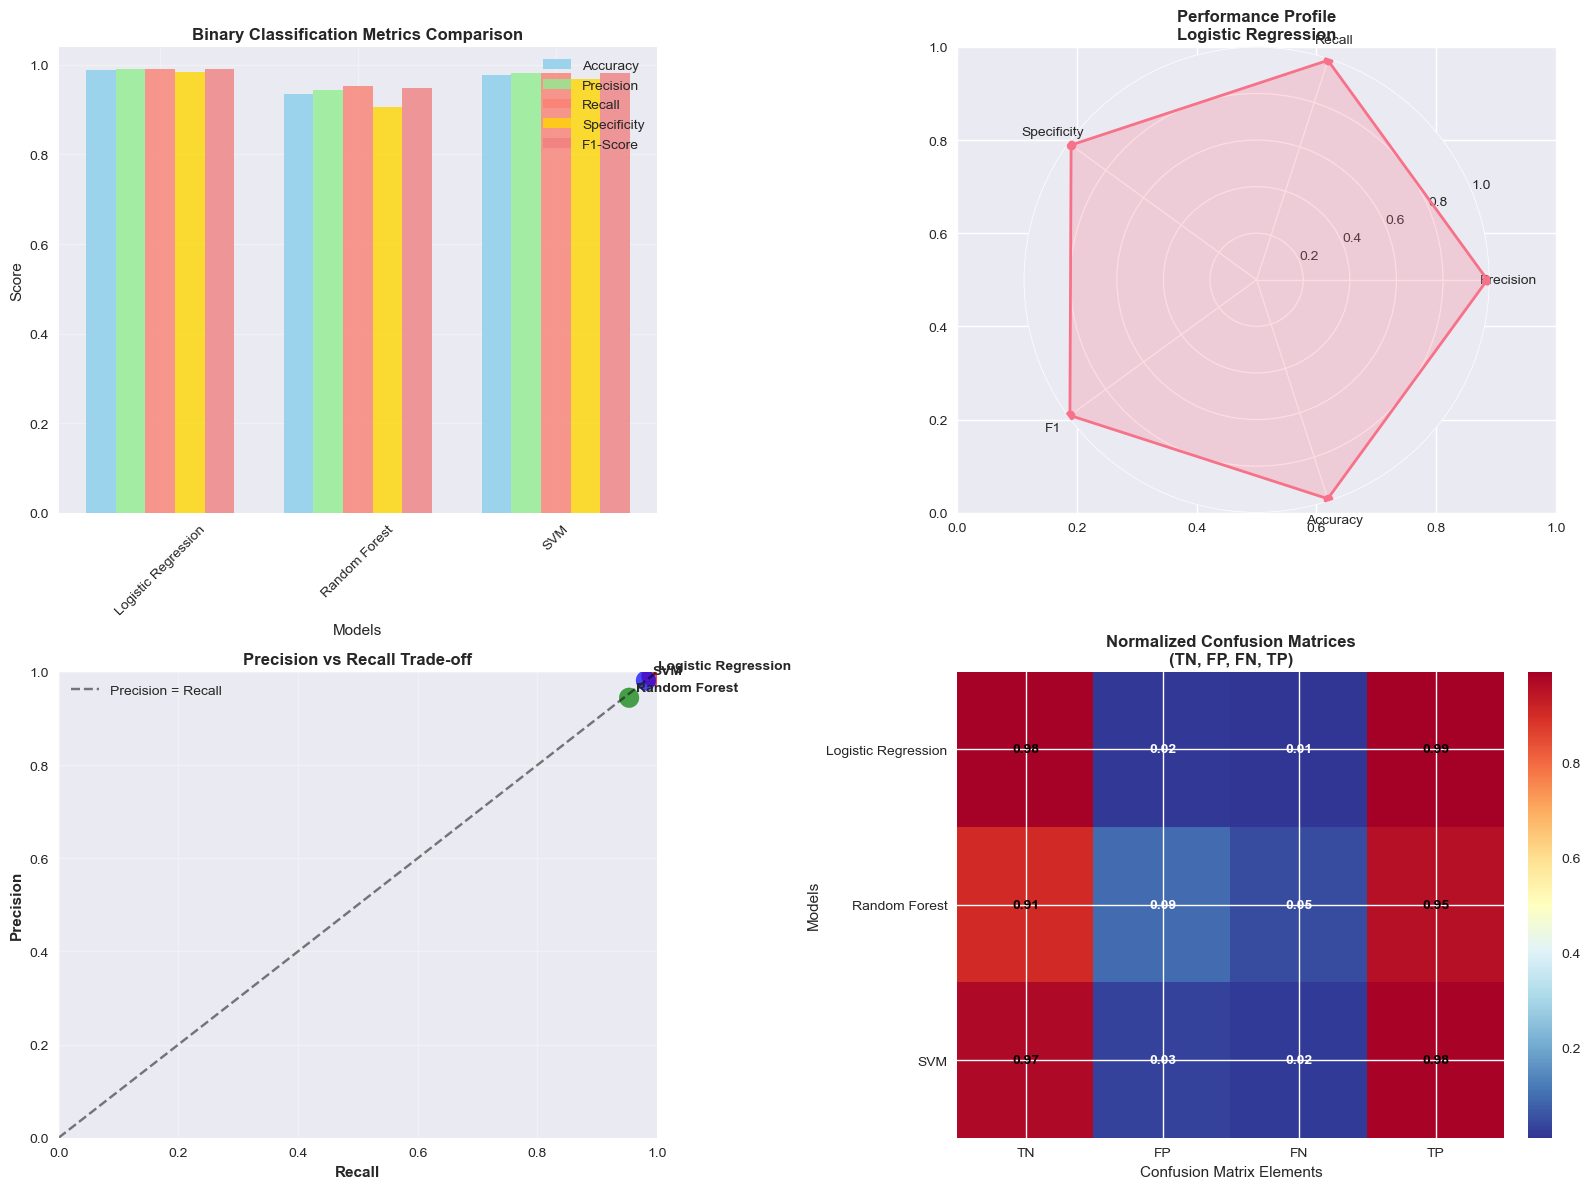


💡 Key Insights:
• High precision: Few false positives (conservative predictions)
• High recall: Few false negatives (catches most positive cases)
• F1-score: Balanced measure when precision and recall are both important
• In medical diagnosis: High recall often more critical (don't miss diseases)


In [14]:
def calculate_metrics_binary(y_true, y_pred):
    """Calculate comprehensive binary classification metrics"""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Precision': precision, 'Recall': recall, 
        'Specificity': specificity, 'F1': f1, 'Accuracy': accuracy
    }

# Calculate metrics for binary classification
print("📊 Binary Classification Metrics (Breast Cancer):")
print("=" * 70)

binary_metrics = {}
for name, results in binary_results.items():
    metrics = calculate_metrics_binary(y_cancer_test, results['predictions'])
    binary_metrics[name] = metrics
    
    print(f"\n{name}:")
    print(f"  Accuracy:    {metrics['Accuracy']:.4f}")
    print(f"  Precision:   {metrics['Precision']:.4f}  (TP={metrics['TP']}, FP={metrics['FP']})")
    print(f"  Recall:      {metrics['Recall']:.4f}  (TP={metrics['TP']}, FN={metrics['FN']})")
    print(f"  Specificity: {metrics['Specificity']:.4f}  (TN={metrics['TN']}, FP={metrics['FP']})")
    print(f"  F1-Score:    {metrics['F1']:.4f}")

# Visualize metrics comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data for plotting
model_names = list(binary_metrics.keys())
metrics_data = {
    'Accuracy': [binary_metrics[name]['Accuracy'] for name in model_names],
    'Precision': [binary_metrics[name]['Precision'] for name in model_names],
    'Recall': [binary_metrics[name]['Recall'] for name in model_names],
    'Specificity': [binary_metrics[name]['Specificity'] for name in model_names],
    'F1-Score': [binary_metrics[name]['F1'] for name in model_names]
}

# 1. Bar plot comparison
x = np.arange(len(model_names))
width = 0.15
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']

for i, (metric, values) in enumerate(metrics_data.items()):
    ax1.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.8)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Binary Classification Metrics Comparison', fontweight='bold')
ax1.set_xticks(x + width*2)
ax1.set_xticklabels(model_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Radar chart for first model
def create_radar_chart(metrics, model_name, ax):
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    values = list(metrics.values())
    angles = np.concatenate((angles, [angles[0]]))
    values = np.concatenate((values, [values[0]]))
    
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.25)
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics.keys())
    ax.set_title(f'Performance Profile\n{model_name}', fontweight='bold')
    ax.grid(True)

# Create radar chart for Logistic Regression
lr_metrics = {k: v for k, v in binary_metrics['Logistic Regression'].items() 
              if k in ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1']}
ax2 = plt.subplot(2, 2, 2, projection='polar')
create_radar_chart(lr_metrics, 'Logistic Regression', ax2)

# 3. Precision vs Recall scatter plot
precisions = [binary_metrics[name]['Precision'] for name in model_names]
recalls = [binary_metrics[name]['Recall'] for name in model_names]

ax3.scatter(recalls, precisions, s=200, alpha=0.7, c=['red', 'green', 'blue'])
for i, name in enumerate(model_names):
    ax3.annotate(name, (recalls[i], precisions[i]), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax3.set_xlabel('Recall', fontweight='bold')
ax3.set_ylabel('Precision', fontweight='bold')
ax3.set_title('Precision vs Recall Trade-off', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Add diagonal line (equal precision and recall)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Precision = Recall')
ax3.legend()

# 4. Confusion matrix heatmap comparison
cm_data = []
for name in model_names:
    cm = confusion_matrix(y_cancer_test, binary_results[name]['predictions'])
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_data.append(cm_normalized.flatten())

im = ax4.imshow(cm_data, cmap='RdYlBu_r', aspect='auto')
ax4.set_title('Normalized Confusion Matrices\n(TN, FP, FN, TP)', fontweight='bold')
ax4.set_xlabel('Confusion Matrix Elements')
ax4.set_ylabel('Models')
ax4.set_xticks(range(4))
ax4.set_xticklabels(['TN', 'FP', 'FN', 'TP'])
ax4.set_yticks(range(len(model_names)))
ax4.set_yticklabels(model_names)

# Add text annotations
for i in range(len(model_names)):
    for j in range(4):
        ax4.text(j, i, f'{cm_data[i][j]:.2f}', ha='center', va='center', 
                color='white' if cm_data[i][j] < 0.5 else 'black', fontweight='bold')

plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("• High precision: Few false positives (conservative predictions)")
print("• High recall: Few false negatives (catches most positive cases)")
print("• F1-score: Balanced measure when precision and recall are both important")
print("• In medical diagnosis: High recall often more critical (don't miss diseases)")

## 5. Multi-class Metrics: Macro, Micro, and Weighted Averaging 🎛️

### 📝 Averaging Strategies for Multi-class:

**Macro Average:**
- Calculate metric for each class independently, then average
- Formula: (Metric_Class1 + Metric_Class2 + ... + Metric_ClassN) / N
- **Treats all classes equally** (good for balanced datasets)

**Micro Average:**
- Calculate metric globally by counting total TP, FP, FN across all classes
- Formula: Total_TP / (Total_TP + Total_FP) for precision
- **Gives more weight to frequent classes** (good for imbalanced datasets)

**Weighted Average:**
- Calculate metric for each class, then average weighted by class frequency
- Takes class imbalance into account
- **Balanced approach** between macro and micro

### 🔍 When to Use Each:
- **Macro**: When all classes are equally important
- **Micro**: When overall performance matters most
- **Weighted**: When you want to account for class imbalance

📊 Multi-class Metrics Analysis:

🌸 IRIS Dataset (Balanced Classes):
--------------------------------------------------

Logistic Regression:
  Accuracy:          0.9111
  Precision (Macro): 0.9155
  Precision (Micro): 0.9111
  Precision (Wtd):   0.9155
  Recall (Macro):    0.9111
  Recall (Micro):    0.9111
  Recall (Wtd):      0.9111
  F1 (Macro):        0.9107
  F1 (Micro):        0.9111
  F1 (Wtd):          0.9107

Random Forest:
  Accuracy:          0.8889
  Precision (Macro): 0.8981
  Precision (Micro): 0.8889
  Precision (Wtd):   0.8981
  Recall (Macro):    0.8889
  Recall (Micro):    0.8889
  Recall (Wtd):      0.8889
  F1 (Macro):        0.8878
  F1 (Micro):        0.8889
  F1 (Wtd):          0.8878

SVM:
  Accuracy:          0.9333
  Precision (Macro): 0.9345
  Precision (Micro): 0.9333
  Precision (Wtd):   0.9345
  Recall (Macro):    0.9333
  Recall (Micro):    0.9333
  Recall (Wtd):      0.9333
  F1 (Macro):        0.9333
  F1 (Micro):        0.9333
  F1 (Wtd):          0.93

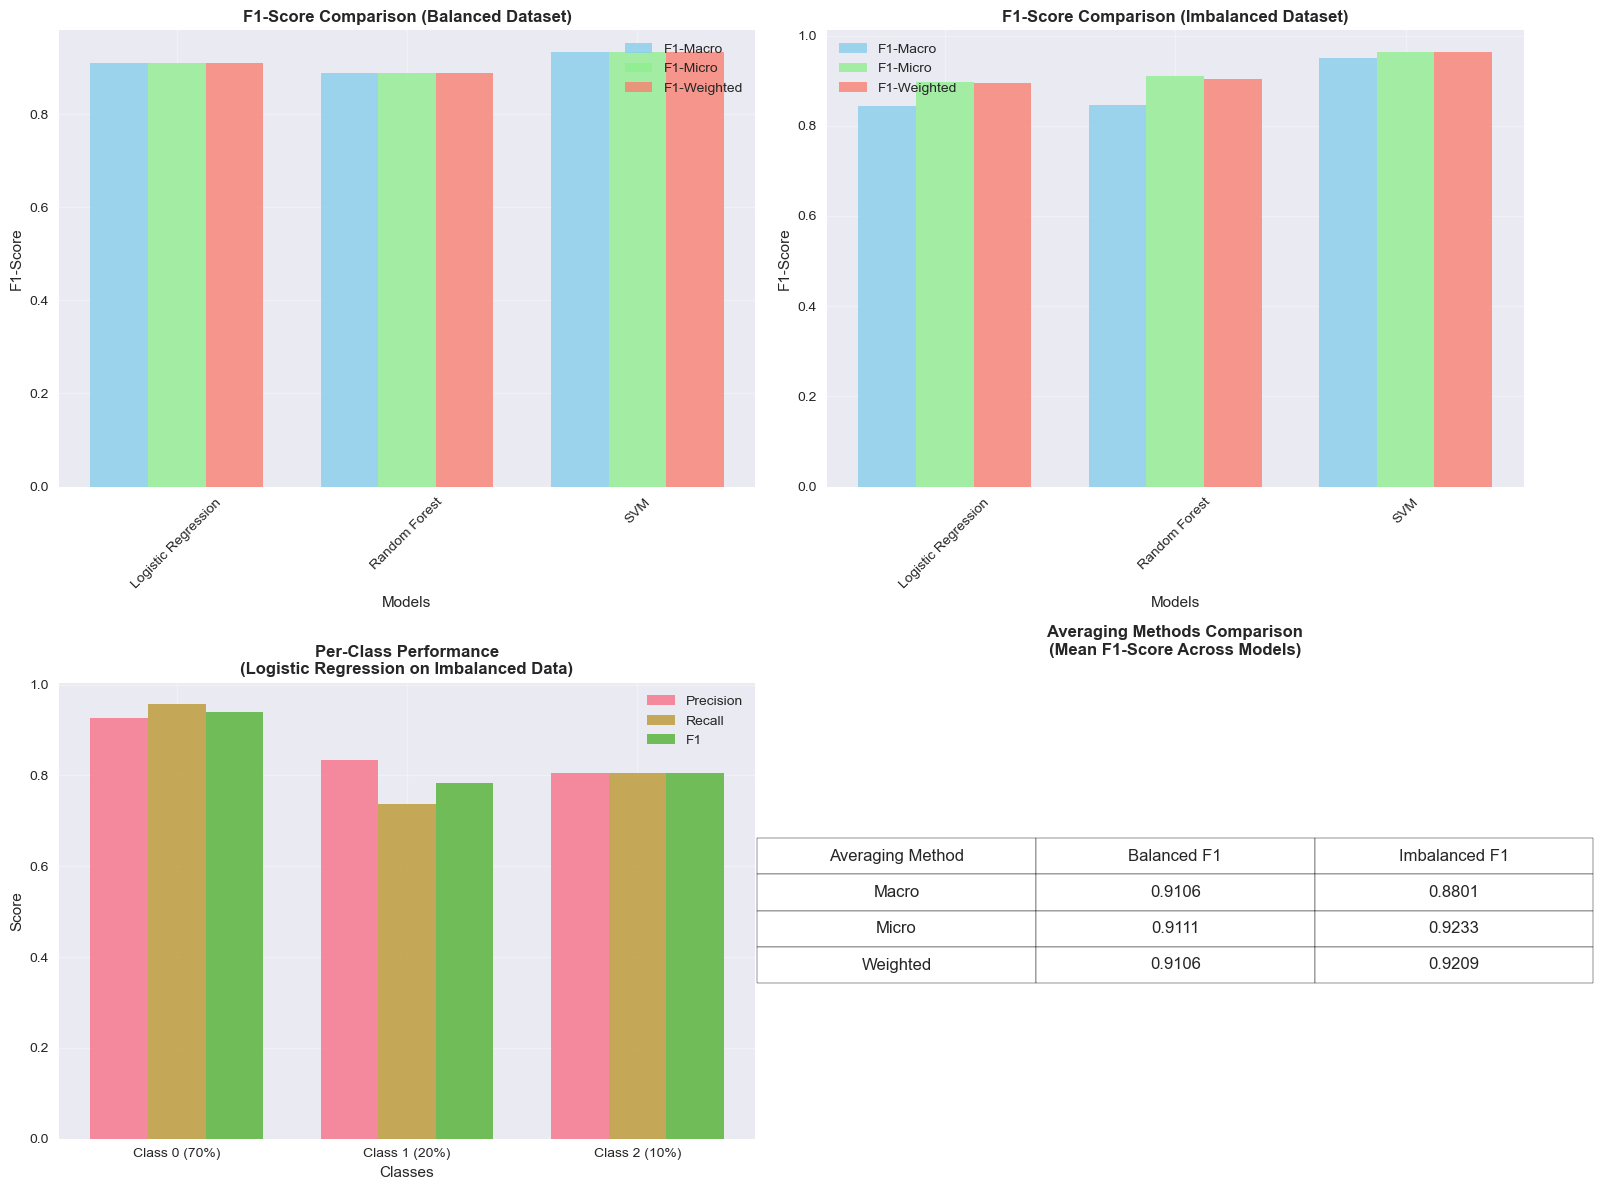


💡 Key Observations:
• Macro averaging: Treats all classes equally, sensitive to minority class performance
• Micro averaging: Weighted by frequency, dominated by majority class in imbalanced data
• Weighted averaging: Good compromise, accounts for class distribution
• In balanced data: Macro ≈ Micro ≈ Weighted
• In imbalanced data: Macro < Weighted < Micro (typically)


In [15]:
# Calculate multi-class metrics for both balanced and imbalanced datasets
def calculate_multiclass_metrics(y_true, y_pred, dataset_name):
    """Calculate comprehensive multi-class metrics"""
    
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision, Recall, F1 with different averaging
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_micro = precision_score(y_true, y_pred, average='micro')
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    return {
        'accuracy': accuracy,
        'precision': {'macro': precision_macro, 'micro': precision_micro, 'weighted': precision_weighted, 'per_class': precision_per_class},
        'recall': {'macro': recall_macro, 'micro': recall_micro, 'weighted': recall_weighted, 'per_class': recall_per_class},
        'f1': {'macro': f1_macro, 'micro': f1_micro, 'weighted': f1_weighted, 'per_class': f1_per_class}
    }

# Test on balanced dataset (Iris)
print("📊 Multi-class Metrics Analysis:")
print("=" * 80)

balanced_metrics = {}
for name, results in multiclass_results.items():
    metrics = calculate_multiclass_metrics(y_iris_test, results['predictions'], 'Iris (Balanced)')
    balanced_metrics[name] = metrics
    
print("\n🌸 IRIS Dataset (Balanced Classes):")
print("-" * 50)
for name, metrics in balanced_metrics.items():
    print(f"\n{name}:")
    print(f"  Accuracy:          {metrics['accuracy']:.4f}")
    print(f"  Precision (Macro): {metrics['precision']['macro']:.4f}")
    print(f"  Precision (Micro): {metrics['precision']['micro']:.4f}")
    print(f"  Precision (Wtd):   {metrics['precision']['weighted']:.4f}")
    print(f"  Recall (Macro):    {metrics['recall']['macro']:.4f}")
    print(f"  Recall (Micro):    {metrics['recall']['micro']:.4f}")
    print(f"  Recall (Wtd):      {metrics['recall']['weighted']:.4f}")
    print(f"  F1 (Macro):        {metrics['f1']['macro']:.4f}")
    print(f"  F1 (Micro):        {metrics['f1']['micro']:.4f}")
    print(f"  F1 (Wtd):          {metrics['f1']['weighted']:.4f}")

# Test on imbalanced dataset
print("\n⚖️ Imbalanced Dataset Analysis:")
print("-" * 50)

# Train models on imbalanced data
imbalanced_results = {}
scaler_imb = StandardScaler()
X_imb_train_scaled = scaler_imb.fit_transform(X_imb_train)
X_imb_test_scaled = scaler_imb.transform(X_imb_test)

for name, model in models.items():
    model.fit(X_imb_train_scaled, y_imb_train)
    y_pred = model.predict(X_imb_test_scaled)
    imbalanced_results[name] = calculate_multiclass_metrics(y_imb_test, y_pred, 'Imbalanced')

for name, metrics in imbalanced_results.items():
    print(f"\n{name}:")
    print(f"  Accuracy:          {metrics['accuracy']:.4f}")
    print(f"  Precision (Macro): {metrics['precision']['macro']:.4f}")
    print(f"  Precision (Micro): {metrics['precision']['micro']:.4f}")
    print(f"  Precision (Wtd):   {metrics['precision']['weighted']:.4f}")
    print(f"  F1 (Macro):        {metrics['f1']['macro']:.4f}")
    print(f"  F1 (Micro):        {metrics['f1']['micro']:.4f}")
    print(f"  F1 (Wtd):          {metrics['f1']['weighted']:.4f}")

# Visualization comparing averaging methods
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Balanced dataset comparison
model_names = list(balanced_metrics.keys())
avg_methods = ['macro', 'micro', 'weighted']
colors = ['skyblue', 'lightgreen', 'salmon']

x = np.arange(len(model_names))
width = 0.25

for i, avg_method in enumerate(avg_methods):
    f1_scores = [balanced_metrics[name]['f1'][avg_method] for name in model_names]
    ax1.bar(x + i*width, f1_scores, width, label=f'F1-{avg_method.capitalize()}', 
            color=colors[i], alpha=0.8)

ax1.set_xlabel('Models')
ax1.set_ylabel('F1-Score')
ax1.set_title('F1-Score Comparison (Balanced Dataset)', fontweight='bold')
ax1.set_xticks(x + width)
ax1.set_xticklabels(model_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Imbalanced dataset comparison
for i, avg_method in enumerate(avg_methods):
    f1_scores = [imbalanced_results[name]['f1'][avg_method] for name in model_names]
    ax2.bar(x + i*width, f1_scores, width, label=f'F1-{avg_method.capitalize()}', 
            color=colors[i], alpha=0.8)

ax2.set_xlabel('Models')
ax2.set_ylabel('F1-Score')
ax2.set_title('F1-Score Comparison (Imbalanced Dataset)', fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels(model_names, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Per-class performance on imbalanced data
lr_imb_metrics = imbalanced_results['Logistic Regression']
class_names = ['Class 0 (70%)', 'Class 1 (20%)', 'Class 2 (10%)']
metrics_per_class = ['precision', 'recall', 'f1']

x_class = np.arange(len(class_names))
width_class = 0.25

for i, metric in enumerate(metrics_per_class):
    values = lr_imb_metrics[metric]['per_class']
    ax3.bar(x_class + i*width_class, values, width_class, 
            label=metric.capitalize(), alpha=0.8)

ax3.set_xlabel('Classes')
ax3.set_ylabel('Score')
ax3.set_title('Per-Class Performance\n(Logistic Regression on Imbalanced Data)', fontweight='bold')
ax3.set_xticks(x_class + width_class)
ax3.set_xticklabels(class_names)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Averaging methods comparison table
avg_comparison_data = []
for avg_method in avg_methods:
    balanced_avg = np.mean([balanced_metrics[name]['f1'][avg_method] for name in model_names])
    imbalanced_avg = np.mean([imbalanced_results[name]['f1'][avg_method] for name in model_names])
    avg_comparison_data.append([avg_method.capitalize(), f'{balanced_avg:.4f}', f'{imbalanced_avg:.4f}'])

ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=avg_comparison_data,
                  colLabels=['Averaging Method', 'Balanced F1', 'Imbalanced F1'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)
ax4.set_title('Averaging Methods Comparison\n(Mean F1-Score Across Models)', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n💡 Key Observations:")
print("• Macro averaging: Treats all classes equally, sensitive to minority class performance")
print("• Micro averaging: Weighted by frequency, dominated by majority class in imbalanced data")
print("• Weighted averaging: Good compromise, accounts for class distribution")
print("• In balanced data: Macro ≈ Micro ≈ Weighted")
print("• In imbalanced data: Macro < Weighted < Micro (typically)")

## 6. ROC Curves and AUC Analysis 📈

### 📝 Theory:

**ROC (Receiver Operating Characteristic) Curve:**
- Plots True Positive Rate (Recall) vs False Positive Rate
- **TPR = TP / (TP + FN)** (Sensitivity)
- **FPR = FP / (FP + TN)** (1 - Specificity)
- Shows trade-off between sensitivity and specificity

**AUC (Area Under the Curve):**
- Single number summarizing ROC curve
- **AUC = 1.0**: Perfect classifier
- **AUC = 0.5**: Random classifier (diagonal line)
- **AUC < 0.5**: Worse than random (but can be inverted)

**Interpretation:**
- **AUC > 0.9**: Excellent performance
- **0.8 < AUC ≤ 0.9**: Good performance  
- **0.7 < AUC ≤ 0.8**: Fair performance
- **0.6 < AUC ≤ 0.7**: Poor performance
- **AUC ≤ 0.6**: Fail

📈 ROC and Precision-Recall Curve Analysis:


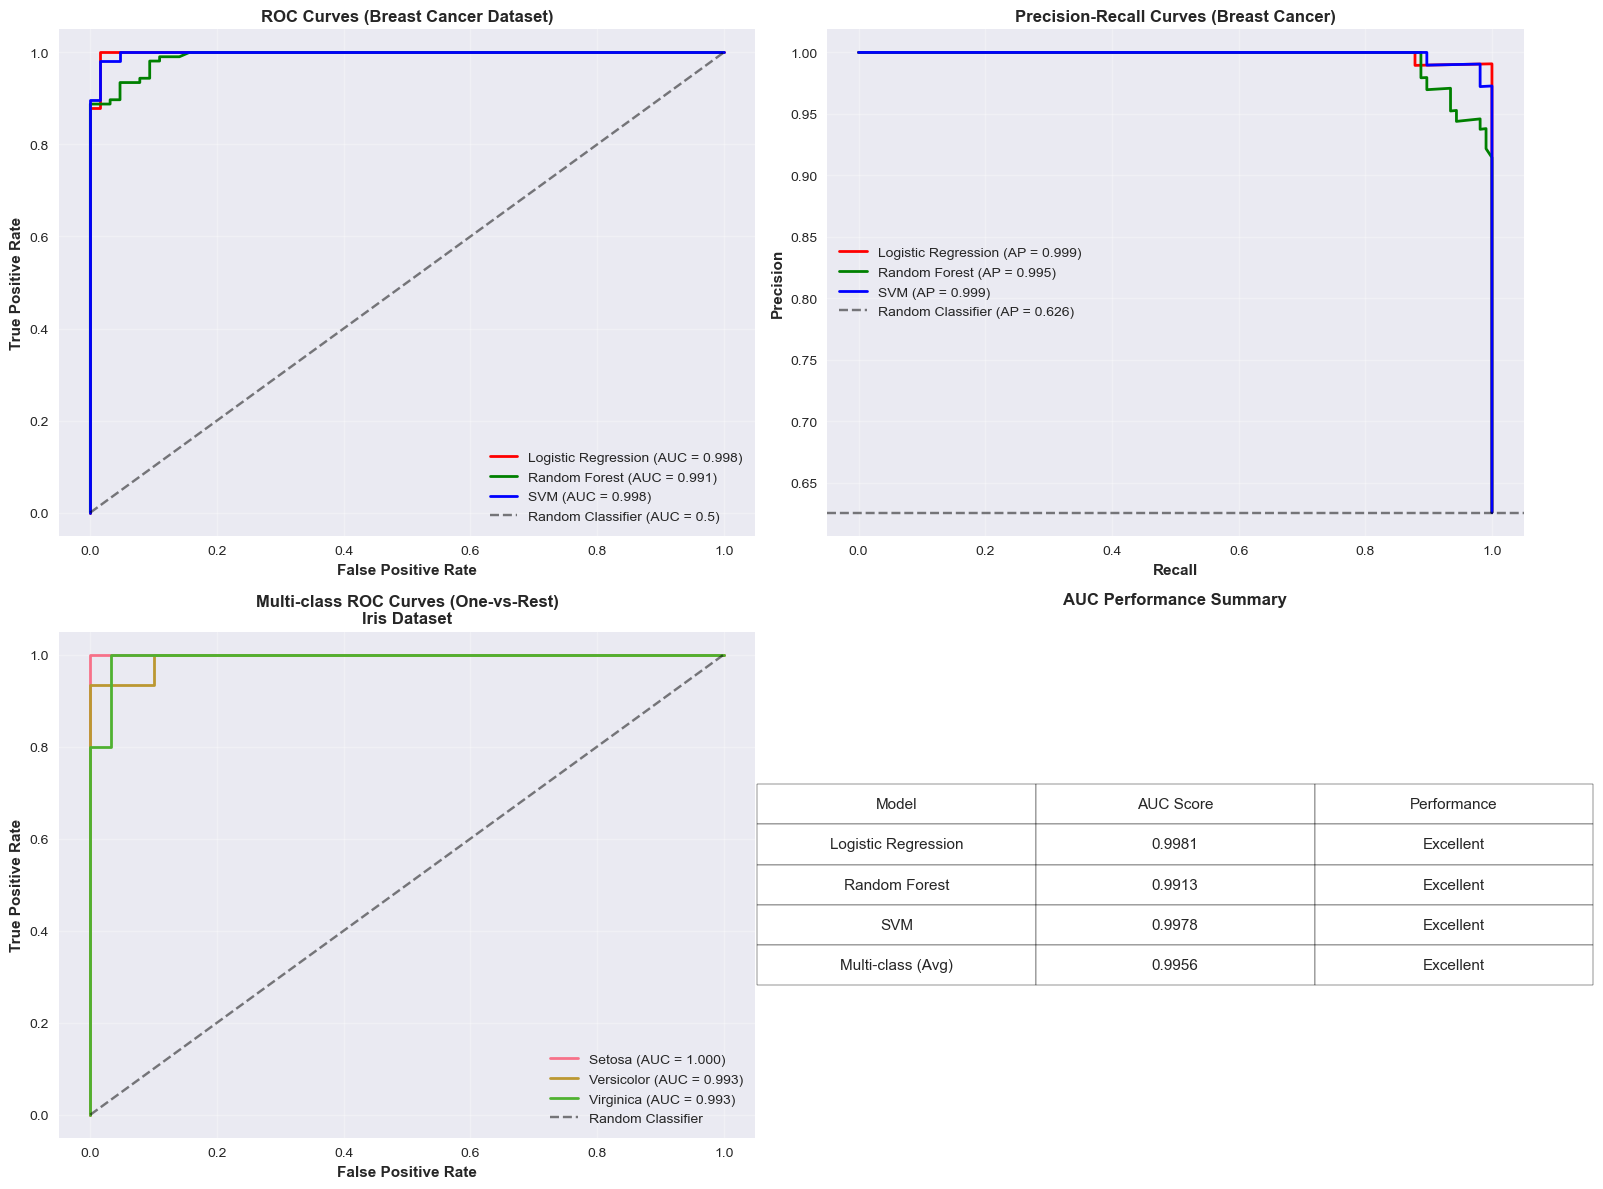


📊 ROC Analysis Results:
----------------------------------------
Logistic Regression:
  AUC Score: 0.9981
  Performance: Excellent
Random Forest:
  AUC Score: 0.9913
  Performance: Excellent
SVM:
  AUC Score: 0.9978
  Performance: Excellent

🌸 Multi-class ROC Analysis (Iris):
----------------------------------------
Setosa vs Rest:
  AUC Score: 1.0000
Versicolor vs Rest:
  AUC Score: 0.9933
Virginica vs Rest:
  AUC Score: 0.9933

Average Multi-class AUC: 0.9956

💡 Key Insights:
• ROC curves show classifier performance across all thresholds
• AUC summarizes overall discriminative ability
• Precision-Recall curves better for imbalanced datasets
• Multi-class ROC uses One-vs-Rest approach
• Perfect classifier: AUC = 1.0, curve hugs top-left corner
• Random classifier: AUC = 0.5, diagonal line


In [16]:
# ROC and Precision-Recall Curve Analysis
print("📈 ROC and Precision-Recall Curve Analysis:")
print("=" * 60)

# Calculate ROC curves for binary classification
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC Curves for Binary Classification
colors = ['red', 'green', 'blue']
roc_results = {}

for i, (name, results) in enumerate(binary_results.items()):
    if results['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_cancer_test, results['probabilities'])
        auc_score = roc_auc_score(y_cancer_test, results['probabilities'])
        roc_results[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc_score}
        
        ax1.plot(fpr, tpr, color=colors[i], linewidth=2, 
                label=f'{name} (AUC = {auc_score:.3f})')

# Add diagonal line (random classifier)
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier (AUC = 0.5)')
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')
ax1.set_title('ROC Curves (Breast Cancer Dataset)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves for Binary Classification
pr_results = {}

for i, (name, results) in enumerate(binary_results.items()):
    if results['probabilities'] is not None:
        precision, recall, _ = precision_recall_curve(y_cancer_test, results['probabilities'])
        ap_score = average_precision_score(y_cancer_test, results['probabilities'])
        pr_results[name] = {'precision': precision, 'recall': recall, 'ap': ap_score}
        
        ax2.plot(recall, precision, color=colors[i], linewidth=2,
                label=f'{name} (AP = {ap_score:.3f})')

# Add baseline (random classifier for imbalanced data)
baseline = np.sum(y_cancer_test) / len(y_cancer_test)
ax2.axhline(y=baseline, color='k', linestyle='--', alpha=0.5, 
           label=f'Random Classifier (AP = {baseline:.3f})')
ax2.set_xlabel('Recall', fontweight='bold')
ax2.set_ylabel('Precision', fontweight='bold')
ax2.set_title('Precision-Recall Curves (Breast Cancer)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Multi-class ROC (One-vs-Rest)
# Use Logistic Regression on Iris dataset
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_iris_train_scaled, y_iris_train)
y_prob_multiclass = lr_model.predict_proba(X_iris_test_scaled)

# Calculate ROC for each class
class_names = ['Setosa', 'Versicolor', 'Virginica']
multiclass_roc = {}

for i, class_name in enumerate(class_names):
    # One-vs-Rest: class i vs all others
    y_true_binary = (y_iris_test == i).astype(int)
    y_prob_binary = y_prob_multiclass[:, i]
    
    fpr, tpr, _ = roc_curve(y_true_binary, y_prob_binary)
    auc_score = roc_auc_score(y_true_binary, y_prob_binary)
    multiclass_roc[class_name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc_score}
    
    ax3.plot(fpr, tpr, linewidth=2, 
            label=f'{class_name} (AUC = {auc_score:.3f})')

ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax3.set_xlabel('False Positive Rate', fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontweight='bold')
ax3.set_title('Multi-class ROC Curves (One-vs-Rest)\nIris Dataset', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. AUC Comparison Table and Analysis
auc_data = []
for name, roc_data in roc_results.items():
    auc_data.append([name, f"{roc_data['auc']:.4f}", 
                    "Excellent" if roc_data['auc'] > 0.9 else
                    "Good" if roc_data['auc'] > 0.8 else
                    "Fair" if roc_data['auc'] > 0.7 else
                    "Poor" if roc_data['auc'] > 0.6 else "Fail"])

# Add multiclass average AUC
multiclass_auc_avg = np.mean([data['auc'] for data in multiclass_roc.values()])
auc_data.append(['Multi-class (Avg)', f"{multiclass_auc_avg:.4f}", 
                "Excellent" if multiclass_auc_avg > 0.9 else
                "Good" if multiclass_auc_avg > 0.8 else "Fair"])

ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=auc_data,
                  colLabels=['Model', 'AUC Score', 'Performance'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)
ax4.set_title('AUC Performance Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n📊 ROC Analysis Results:")
print("-" * 40)
for name, data in roc_results.items():
    print(f"{name}:")
    print(f"  AUC Score: {data['auc']:.4f}")
    print(f"  Performance: {'Excellent' if data['auc'] > 0.9 else 'Good' if data['auc'] > 0.8 else 'Fair'}")

print(f"\n🌸 Multi-class ROC Analysis (Iris):")
print("-" * 40)
for class_name, data in multiclass_roc.items():
    print(f"{class_name} vs Rest:")
    print(f"  AUC Score: {data['auc']:.4f}")

print(f"\nAverage Multi-class AUC: {multiclass_auc_avg:.4f}")

print("\n💡 Key Insights:")
print("• ROC curves show classifier performance across all thresholds")
print("• AUC summarizes overall discriminative ability")
print("• Precision-Recall curves better for imbalanced datasets")
print("• Multi-class ROC uses One-vs-Rest approach")
print("• Perfect classifier: AUC = 1.0, curve hugs top-left corner")
print("• Random classifier: AUC = 0.5, diagonal line")

## 7. PyTorch Neural Network Classification 🔥

Let's implement a neural network classifier and evaluate it using all the metrics we've learned:

🔥 Training PyTorch Neural Network Classifiers:

🔬 Binary Classification (Breast Cancer):
Epoch   0: Loss = 0.7032, Accuracy = 0.4020
Epoch  20: Loss = 0.4086, Accuracy = 0.9347
Epoch  40: Loss = 0.1852, Accuracy = 0.9523
Epoch  60: Loss = 0.0931, Accuracy = 0.9799
Epoch  80: Loss = 0.0638, Accuracy = 0.9849

🌸 Multi-class Classification (Iris):
Epoch   0: Loss = 1.1235, Accuracy = 0.4000
Epoch  20: Loss = 0.7798, Accuracy = 0.8667
Epoch  40: Loss = 0.4945, Accuracy = 0.8952
Epoch  60: Loss = 0.3519, Accuracy = 0.8857
Epoch  80: Loss = 0.2697, Accuracy = 0.9238
Epoch  60: Loss = 0.0931, Accuracy = 0.9799
Epoch  80: Loss = 0.0638, Accuracy = 0.9849

🌸 Multi-class Classification (Iris):
Epoch   0: Loss = 1.1235, Accuracy = 0.4000
Epoch  20: Loss = 0.7798, Accuracy = 0.8667
Epoch  40: Loss = 0.4945, Accuracy = 0.8952
Epoch  60: Loss = 0.3519, Accuracy = 0.8857
Epoch  80: Loss = 0.2697, Accuracy = 0.9238


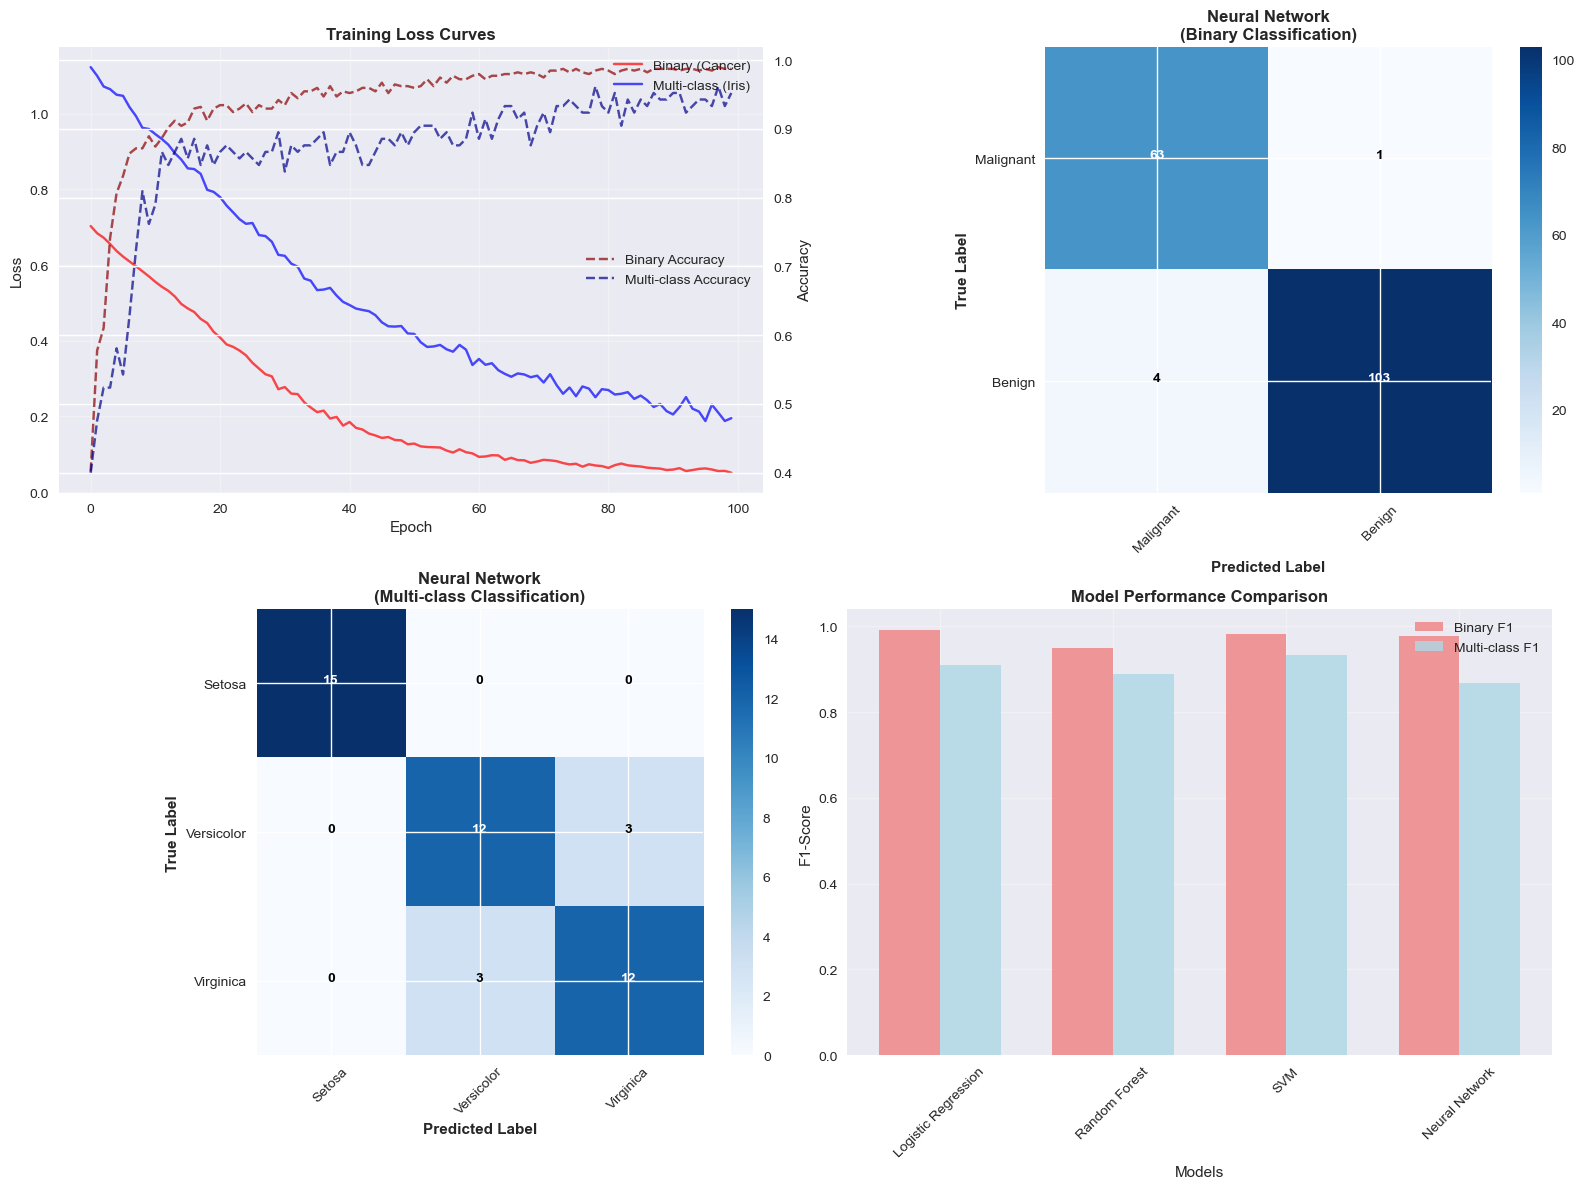


📊 Neural Network Evaluation Results:

🔬 Binary Classification (Breast Cancer):
  Accuracy:    0.9708
  Precision:   0.9904
  Recall:      0.9626
  F1-Score:    0.9763
  Specificity: 0.9844

🌸 Multi-class Classification (Iris):
  Accuracy:          0.8667
  F1 (Macro):        0.8667
  F1 (Micro):        0.8667
  F1 (Weighted):     0.8667

📋 Detailed Classification Report (Neural Network on Iris):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.80      0.80      0.80        15
   Virginica       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45


🎯 Neural Network vs Traditional Models:
• Neural networks can learn complex non-linear patterns
• Require more data and computational resources
• Hyperparameter tuning is crucial (learning rate, architecture, regulariz

In [17]:
class NeuralNetClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.2):
        super(NeuralNetClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No activation here (will use CrossEntropyLoss)
        return x
    
    def predict_proba(self, x):
        with torch.no_grad():
            outputs = self.forward(x)
            probabilities = F.softmax(outputs, dim=1)
            return probabilities.numpy()
    
    def predict(self, x):
        with torch.no_grad():
            outputs = self.forward(x)
            _, predicted = torch.max(outputs, 1)
            return predicted.numpy()

def train_neural_network(X_train, y_train, X_test, y_test, num_classes, epochs=100):
    """Train a neural network classifier"""
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    
    # Initialize model
    input_size = X_train.shape[1]
    hidden_size = min(128, max(64, input_size * 2))  # Adaptive hidden size
    model = NeuralNetClassifier(input_size, hidden_size, num_classes)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Training loop
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        model.train()
        
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_train_tensor).float().mean().item()
        
        train_losses.append(loss.item())
        train_accuracies.append(accuracy)
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.4f}")
    
    # Evaluation
    model.eval()
    y_pred = model.predict(X_test_tensor)
    y_proba = model.predict_proba(X_test_tensor)
    
    return model, y_pred, y_proba, train_losses, train_accuracies

# Train neural networks on different datasets
print("🔥 Training PyTorch Neural Network Classifiers:")
print("=" * 60)

# 1. Binary Classification (Breast Cancer)
print("\n🔬 Binary Classification (Breast Cancer):")
nn_binary_model, nn_binary_pred, nn_binary_proba, losses_binary, acc_binary = train_neural_network(
    X_cancer_train_scaled, y_cancer_train, X_cancer_test_scaled, y_cancer_test, 2, epochs=100
)

# 2. Multi-class Classification (Iris)  
print("\n🌸 Multi-class Classification (Iris):")
nn_iris_model, nn_iris_pred, nn_iris_proba, losses_iris, acc_iris = train_neural_network(
    X_iris_train_scaled, y_iris_train, X_iris_test_scaled, y_iris_test, 3, epochs=100
)

# Comprehensive evaluation
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Training curves
ax1.plot(losses_binary, label='Binary (Cancer)', color='red', alpha=0.7)
ax1.plot(losses_iris, label='Multi-class (Iris)', color='blue', alpha=0.7)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Curves', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax1_twin = ax1.twinx()
ax1_twin.plot(acc_binary, label='Binary Accuracy', color='darkred', linestyle='--', alpha=0.7)
ax1_twin.plot(acc_iris, label='Multi-class Accuracy', color='darkblue', linestyle='--', alpha=0.7)
ax1_twin.set_ylabel('Accuracy')
ax1_twin.legend(loc='center right')

# 2. Confusion Matrix for Neural Network (Binary)
cm_nn_binary = confusion_matrix(y_cancer_test, nn_binary_pred)
plot_confusion_matrix(cm_nn_binary, ['Malignant', 'Benign'], 
                     'Neural Network\n(Binary Classification)', ax2)

# 3. Confusion Matrix for Neural Network (Multi-class)
cm_nn_iris = confusion_matrix(y_iris_test, nn_iris_pred)
plot_confusion_matrix(cm_nn_iris, ['Setosa', 'Versicolor', 'Virginica'], 
                     'Neural Network\n(Multi-class Classification)', ax3)

# 4. Performance comparison with traditional models
models_comparison = {
    'Logistic Regression': {
        'binary_f1': f1_score(y_cancer_test, binary_results['Logistic Regression']['predictions']),
        'multiclass_f1': f1_score(y_iris_test, multiclass_results['Logistic Regression']['predictions'], average='weighted')
    },
    'Random Forest': {
        'binary_f1': f1_score(y_cancer_test, binary_results['Random Forest']['predictions']),
        'multiclass_f1': f1_score(y_iris_test, multiclass_results['Random Forest']['predictions'], average='weighted')
    },
    'SVM': {
        'binary_f1': f1_score(y_cancer_test, binary_results['SVM']['predictions']),
        'multiclass_f1': f1_score(y_iris_test, multiclass_results['SVM']['predictions'], average='weighted')
    },
    'Neural Network': {
        'binary_f1': f1_score(y_cancer_test, nn_binary_pred),
        'multiclass_f1': f1_score(y_iris_test, nn_iris_pred, average='weighted')
    }
}

model_names = list(models_comparison.keys())
binary_f1s = [models_comparison[name]['binary_f1'] for name in model_names]
multiclass_f1s = [models_comparison[name]['multiclass_f1'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

ax4.bar(x - width/2, binary_f1s, width, label='Binary F1', alpha=0.8, color='lightcoral')
ax4.bar(x + width/2, multiclass_f1s, width, label='Multi-class F1', alpha=0.8, color='lightblue')

ax4.set_xlabel('Models')
ax4.set_ylabel('F1-Score')
ax4.set_title('Model Performance Comparison', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(model_names, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed neural network evaluation
print("\n📊 Neural Network Evaluation Results:")
print("=" * 50)

# Binary classification metrics
nn_binary_metrics = calculate_metrics_binary(y_cancer_test, nn_binary_pred)
print(f"\n🔬 Binary Classification (Breast Cancer):")
print(f"  Accuracy:    {nn_binary_metrics['Accuracy']:.4f}")
print(f"  Precision:   {nn_binary_metrics['Precision']:.4f}")
print(f"  Recall:      {nn_binary_metrics['Recall']:.4f}")
print(f"  F1-Score:    {nn_binary_metrics['F1']:.4f}")
print(f"  Specificity: {nn_binary_metrics['Specificity']:.4f}")

# Multi-class metrics
nn_iris_metrics = calculate_multiclass_metrics(y_iris_test, nn_iris_pred, 'Iris')
print(f"\n🌸 Multi-class Classification (Iris):")
print(f"  Accuracy:          {nn_iris_metrics['accuracy']:.4f}")
print(f"  F1 (Macro):        {nn_iris_metrics['f1']['macro']:.4f}")
print(f"  F1 (Micro):        {nn_iris_metrics['f1']['micro']:.4f}")
print(f"  F1 (Weighted):     {nn_iris_metrics['f1']['weighted']:.4f}")

# Classification report
print(f"\n📋 Detailed Classification Report (Neural Network on Iris):")
print(classification_report(y_iris_test, nn_iris_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

print("\n🎯 Neural Network vs Traditional Models:")
print("• Neural networks can learn complex non-linear patterns")
print("• Require more data and computational resources")
print("• Hyperparameter tuning is crucial (learning rate, architecture, regularization)")
print("• Often outperform traditional models on large, complex datasets")
print("• May overfit on small datasets without proper regularization")

## 🎓 Classification Evaluation Summary & Key Takeaways

### ✅ What We've Mastered:

1. **Confusion Matrix**: Foundation for all classification metrics
2. **Core Metrics**: Precision, Recall, F1-score, Specificity
3. **Multi-class Averaging**: Macro, Micro, and Weighted strategies
4. **Advanced Analysis**: ROC curves, AUC, Precision-Recall curves
5. **Neural Networks**: PyTorch implementation with comprehensive evaluation
6. **Practical Applications**: Real datasets and imbalanced data handling

### 📊 Metric Selection Guide:

| **Scenario** | **Primary Metrics** | **Reason** |
|--------------|-------------------|------------|
| **Balanced Classes** | Accuracy, F1-score (macro) | All classes equally important |
| **Imbalanced Classes** | Precision, Recall, F1-weighted | Account for class distribution |
| **Medical Diagnosis** | Recall, Specificity | Minimize false negatives |
| **Spam Detection** | Precision | Minimize false positives |
| **Information Retrieval** | Precision@K, MAP | User experience focused |
| **Binary Classification** | AUC-ROC | Threshold-independent |
| **Imbalanced Binary** | AUC-PR, F1-score | Better than AUC-ROC |

### 🔗 Deep Learning Connections:

**Neural Network Training:**
- Loss functions: CrossEntropyLoss for classification
- Evaluation during training: Monitor multiple metrics
- Early stopping: Based on validation performance
- Class weights: Handle imbalanced datasets

**Advanced Architectures:**
- **CNNs**: Image classification with same evaluation principles
- **RNNs/Transformers**: Text classification metrics
- **Multi-task Learning**: Evaluate each task separately
- **Ensemble Methods**: Combine predictions and evaluate

### 🚨 Common Pitfalls to Avoid:

1. **Accuracy Paradox**: High accuracy on imbalanced data can be misleading
2. **Metric Shopping**: Don't cherry-pick metrics that favor your model
3. **Threshold Sensitivity**: Consider multiple thresholds, not just 0.5
4. **Data Leakage**: Ensure proper train/validation/test splits
5. **Class Distribution**: Always check class balance in your splits

### 💡 Exam Tips:

- **Understand the trade-offs**: Precision vs Recall
- **Know when to use each averaging method**: Macro vs Micro vs Weighted
- **Interpret ROC curves**: Perfect classifier hugs top-left corner
- **Handle imbalanced data**: Use appropriate metrics (not just accuracy)
- **Multi-class extensions**: One-vs-Rest, One-vs-One strategies

### 📚 Next Deep Learning Concepts:

1. **Logistic Regression**: Bridge between linear models and neural networks
2. **Multi-layer Perceptrons**: Deep feedforward networks
3. **Convolutional Neural Networks**: Computer vision applications
4. **Recurrent Neural Networks**: Sequential data and time series
5. **Attention Mechanisms**: Modern transformer architectures

---

**🎯 Ready for the next concept!** You now have a solid foundation in classification evaluation that will serve you throughout your deep learning journey!

# Chapter 3: Neural Networks Fundamentals 🧠

## 📚 Learning Objectives

In this chapter, we'll master the fundamentals of Neural Networks:

1. **🧮 Mathematical Foundations**: Perceptron, activation functions, forward/backward propagation
2. **🔄 Learning Process**: Gradient descent, backpropagation algorithm
3. **🏗️ Architecture Design**: Hidden layers, network depth, width considerations
4. **⚙️ Optimization**: Loss functions, optimizers, learning rates
5. **🎯 Practical Implementation**: From scratch and PyTorch implementations
6. **📊 Visualization**: Decision boundaries, training dynamics, loss landscapes

### 🎓 Why Neural Networks Matter:

- **Universal Function Approximators**: Can learn any continuous function
- **Feature Learning**: Automatically discover relevant features from data
- **Scalability**: Work well with large datasets and high-dimensional data
- **Foundation of Deep Learning**: Building blocks for CNNs, RNNs, Transformers
- **Real-world Applications**: Image recognition, NLP, recommender systems

---

Let's start our journey into the fascinating world of Neural Networks! 🚀

In [18]:
# Chapter 3: Neural Networks - Imports and Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Chapter 3 setup complete!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device available: {'CUDA' if torch.cuda.is_available() else 'CPU'}")

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

✅ Chapter 3 setup complete!
PyTorch version: 2.7.1
Device available: CPU
Using device: cpu


## 3.1 The Perceptron: Building Block of Neural Networks 🧮

### 📖 Theory: What is a Perceptron?

A **Perceptron** is the simplest form of a neural network - a linear classifier that makes decisions by learning a linear boundary.

**Mathematical Model:**
```
y = f(w₁x₁ + w₂x₂ + ... + wₙxₙ + b)
y = f(w^T x + b)
```

Where:
- **x**: Input features (x₁, x₂, ..., xₙ)
- **w**: Weights (w₁, w₂, ..., wₙ) 
- **b**: Bias term
- **f**: Activation function
- **y**: Output

### 🔧 Key Components:

1. **Weights (w)**: Control the strength of each input
2. **Bias (b)**: Shifts the decision boundary
3. **Activation Function (f)**: Introduces non-linearity
4. **Learning Rule**: Updates weights based on errors

### 📊 Common Activation Functions:

| Function | Formula | Range | Use Case |
|----------|---------|--------|----------|
| **Step** | f(x) = 1 if x ≥ 0, else 0 | {0, 1} | Binary classification |
| **Sigmoid** | f(x) = 1/(1 + e^(-x)) | (0, 1) | Probability output |
| **Tanh** | f(x) = (e^x - e^(-x))/(e^x + e^(-x)) | (-1, 1) | Hidden layers |
| **ReLU** | f(x) = max(0, x) | [0, ∞) | Modern deep networks |

### 🎯 Learning Algorithm:

1. **Initialize**: Random weights and bias
2. **Forward Pass**: Compute prediction ŷ = f(w^T x + b)
3. **Error**: Calculate error = target - prediction
4. **Update**: w_new = w_old + α × error × x
5. **Repeat**: Until convergence or max iterations

Let's implement this step by step! 👇

In [19]:
# 3.1 Perceptron Implementation from Scratch

class PerceptronScratch:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        """
        Simple Perceptron implementation from scratch
        
        Args:
            learning_rate: Learning rate for weight updates
            max_epochs: Maximum number of training epochs
        """
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.errors_history = []
        
    def activation_function(self, x):
        """Step function: returns 1 if x >= 0, else 0"""
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        """
        Train the perceptron
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels (n_samples,)
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0.0
        
        # Training loop
        for epoch in range(self.max_epochs):
            errors = 0
            
            for i in range(n_samples):
                # Forward pass
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation_function(linear_output)
                
                # Calculate error
                error = y[i] - prediction
                
                # Update weights and bias if there's an error
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors_history.append(errors)
            
            # Early stopping if no errors
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs")
                break
    
    def predict(self, X):
        """Make predictions on new data"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)
    
    def decision_function(self, X):
        """Return the linear decision function output"""
        return np.dot(X, self.weights) + self.bias

# Test with linearly separable data
print("🔍 Testing Perceptron with Linearly Separable Data")
print("=" * 50)

# Generate linearly separable data
X_simple, y_simple = make_classification(
    n_samples=100, n_features=2, n_redundant=0, 
    n_informative=2, n_clusters_per_class=1, 
    random_state=42, class_sep=2.0
)

# Train perceptron
perceptron = PerceptronScratch(learning_rate=0.1, max_epochs=100)
perceptron.fit(X_simple, y_simple)

# Make predictions
predictions = perceptron.predict(X_simple)
accuracy = accuracy_score(y_simple, predictions)

print(f"Final Accuracy: {accuracy:.3f}")
print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias:.3f}")
print(f"Training completed in {len(perceptron.errors_history)} epochs")

🔍 Testing Perceptron with Linearly Separable Data
Converged after 2 epochs
Final Accuracy: 1.000
Final Weights: [0.13701769 0.52456102]
Final Bias: 0.000
Training completed in 2 epochs


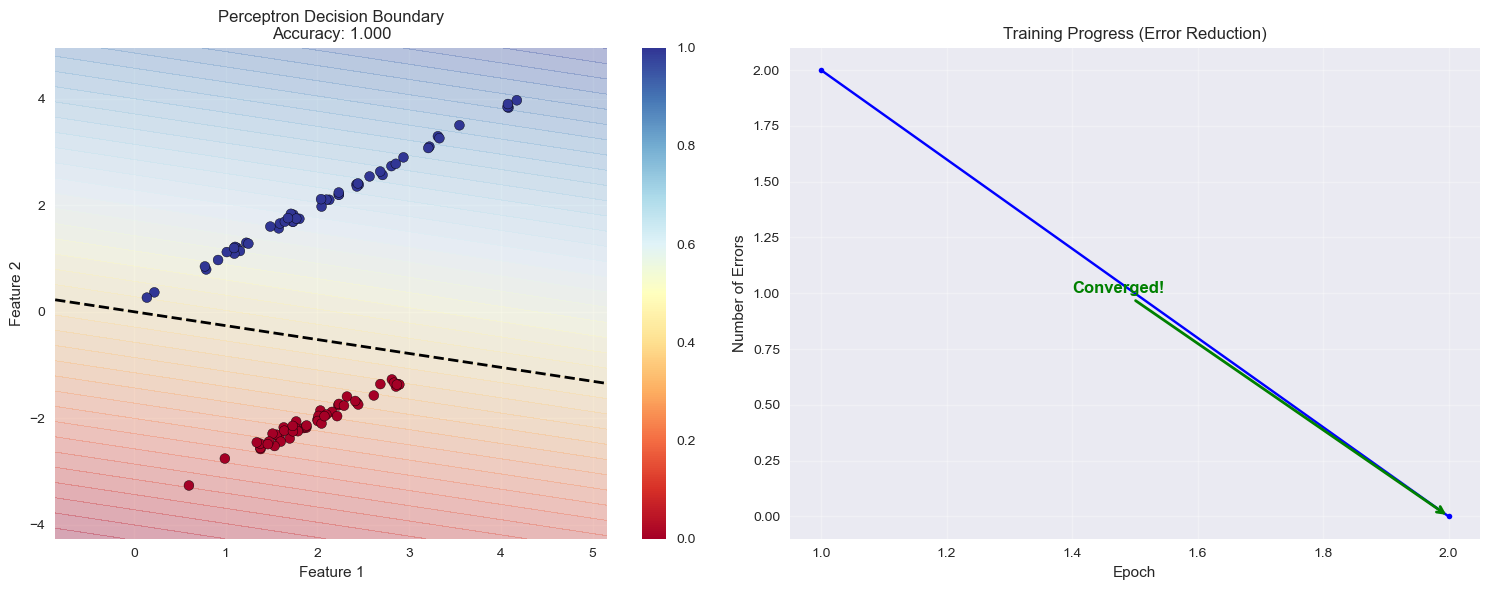

📐 Decision Boundary Equation:
w₁ × x₁ + w₂ × x₂ + b = 0
0.137 × x₁ + 0.525 × x₂ + 0.000 = 0
Or: x₂ = -0.261 × x₁ + -0.000

🔍 Testing Perceptron Limitations: Non-linearly Separable Data
Accuracy on Non-linearly Separable Data: 0.820
⚠️  Notice: Perceptron struggles with non-linearly separable data!


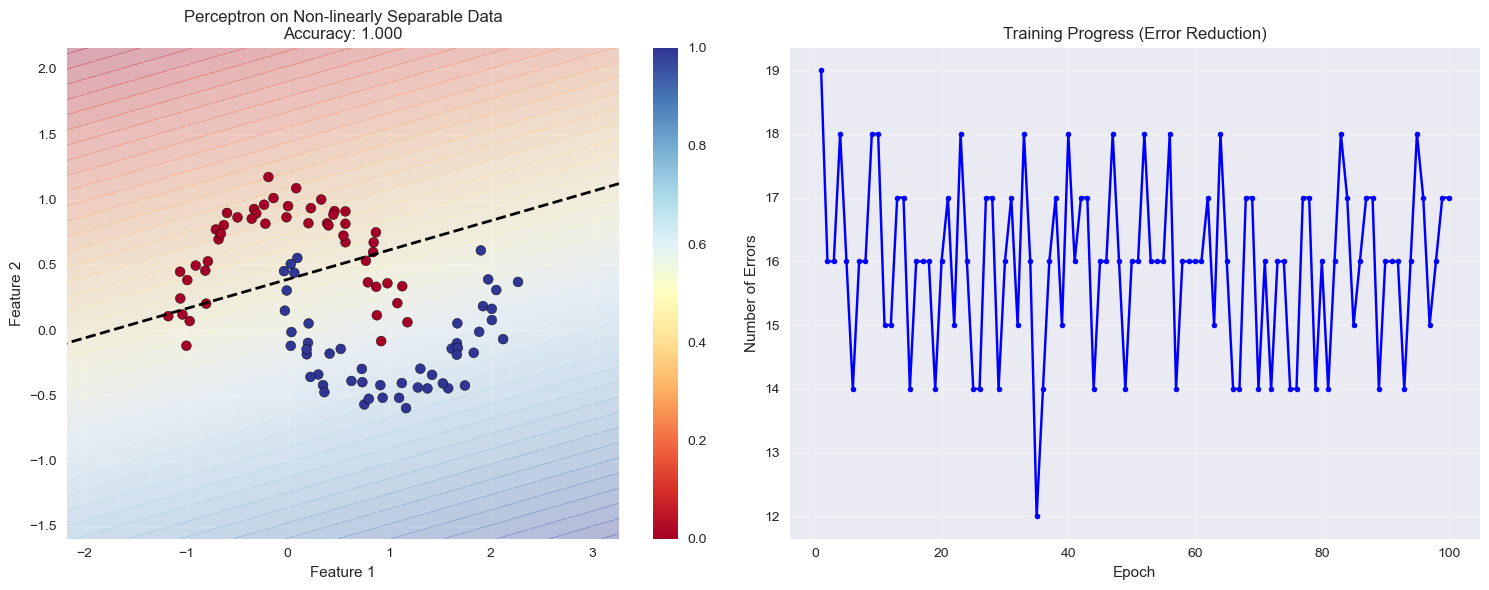

In [20]:
# Visualize Perceptron Results

def plot_perceptron_results(X, y, perceptron, title="Perceptron Decision Boundary"):
    """Plot data points, decision boundary, and training progress"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Decision Boundary
    # Create a mesh to plot the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax1.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
    ax1.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')
    
    # Plot data points
    scatter = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=50, edgecolors='black')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(f'{title}\nAccuracy: {accuracy:.3f}')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1)
    
    # Plot 2: Training Progress
    ax2.plot(range(1, len(perceptron.errors_history) + 1), perceptron.errors_history, 
             'b-', marker='o', markersize=4)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Number of Errors')
    ax2.set_title('Training Progress (Error Reduction)')
    ax2.grid(True, alpha=0.3)
    
    # Add annotations
    if perceptron.errors_history[-1] == 0:
        ax2.annotate('Converged!', 
                    xy=(len(perceptron.errors_history), 0),
                    xytext=(len(perceptron.errors_history) * 0.7, max(perceptron.errors_history) * 0.5),
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    fontsize=12, color='green', weight='bold')
    
    plt.tight_layout()
    plt.show()

# Visualize results
plot_perceptron_results(X_simple, y_simple, perceptron)

# Print decision boundary equation
print("📐 Decision Boundary Equation:")
print(f"w₁ × x₁ + w₂ × x₂ + b = 0")
print(f"{perceptron.weights[0]:.3f} × x₁ + {perceptron.weights[1]:.3f} × x₂ + {perceptron.bias:.3f} = 0")
print(f"Or: x₂ = {-perceptron.weights[0]/perceptron.weights[1]:.3f} × x₁ + {-perceptron.bias/perceptron.weights[1]:.3f}")

# Test on non-linearly separable data
print("\n" + "="*60)
print("🔍 Testing Perceptron Limitations: Non-linearly Separable Data")
print("="*60)

# Generate XOR-like data (non-linearly separable)
X_xor, y_xor = make_moons(n_samples=100, noise=0.1, random_state=42)

# Train perceptron on non-linearly separable data
perceptron_xor = PerceptronScratch(learning_rate=0.1, max_epochs=100)
perceptron_xor.fit(X_xor, y_xor)

predictions_xor = perceptron_xor.predict(X_xor)
accuracy_xor = accuracy_score(y_xor, predictions_xor)

print(f"Accuracy on Non-linearly Separable Data: {accuracy_xor:.3f}")
print("⚠️  Notice: Perceptron struggles with non-linearly separable data!")

# Visualize XOR results
plot_perceptron_results(X_xor, y_xor, perceptron_xor, "Perceptron on Non-linearly Separable Data")

## 3.2 Activation Functions: The Key to Non-linearity 🎯

### 📖 Theory: Why Activation Functions Matter

**Activation functions** introduce **non-linearity** into neural networks, enabling them to:
- Learn complex patterns beyond linear relationships
- Create decision boundaries of any shape
- Stack multiple layers to form deep networks
- Approximate any continuous function (Universal Approximation Theorem)

### 🧮 Mathematical Properties:

1. **Non-linearity**: Essential for learning complex patterns
2. **Differentiability**: Required for backpropagation (gradient-based learning)
3. **Range**: Output range affects network behavior
4. **Computational Efficiency**: Affects training speed

### 📊 Common Activation Functions Detailed Analysis:

| Activation | Formula | Derivative | Advantages | Disadvantages |
|------------|---------|------------|------------|---------------|
| **Sigmoid** | σ(x) = 1/(1+e^(-x)) | σ'(x) = σ(x)(1-σ(x)) | Smooth, probabilistic | Vanishing gradients, not zero-centered |
| **Tanh** | tanh(x) = (e^x-e^(-x))/(e^x+e^(-x)) | tanh'(x) = 1-tanh²(x) | Zero-centered, smooth | Vanishing gradients |
| **ReLU** | max(0,x) | 1 if x>0, else 0 | Simple, no vanishing gradients | Dead neurons, not differentiable at 0 |
| **Leaky ReLU** | max(αx,x), α=0.01 | α if x<0, else 1 | Fixes dead ReLU problem | Small negative slope |
| **ELU** | x if x>0, else α(e^x-1) | 1 if x>0, else ELU(x)+α | Smooth, zero-mean outputs | Computationally expensive |
| **Swish** | x·σ(x) | Complex | Self-gating, smooth | Computationally expensive |

Let's implement and visualize these functions! 👇

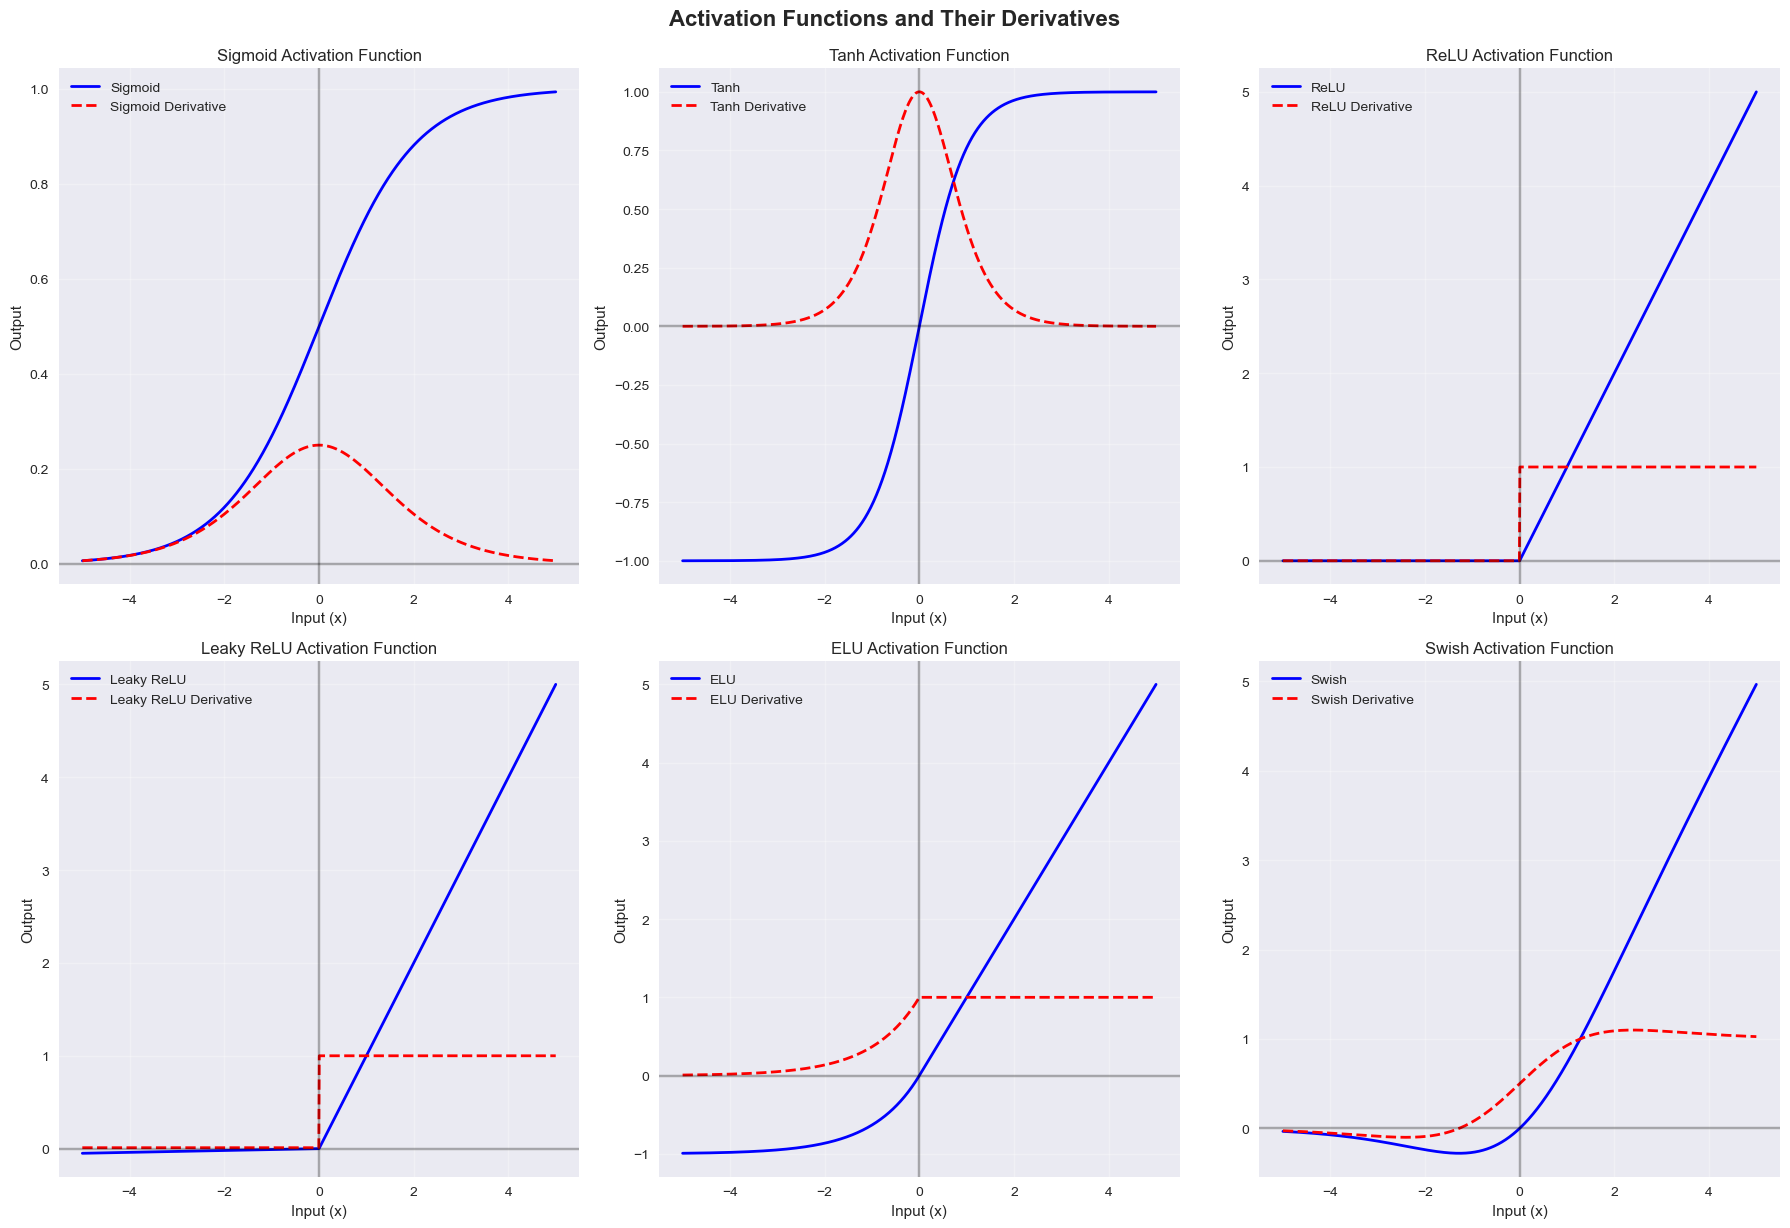

📊 Activation Function Properties Summary:

Sigmoid:
  Range: (0, 1)
  Zero-centered: No
  Vanishing Gradient: Yes
  Computational Cost: Medium

Tanh:
  Range: (-1, 1)
  Zero-centered: Yes
  Vanishing Gradient: Yes
  Computational Cost: Medium

ReLU:
  Range: [0, ∞)
  Zero-centered: No
  Vanishing Gradient: No
  Computational Cost: Low

Leaky ReLU:
  Range: (-∞, ∞)
  Zero-centered: No
  Vanishing Gradient: No
  Computational Cost: Low

ELU:
  Range: (-α, ∞)
  Zero-centered: Nearly
  Vanishing Gradient: No
  Computational Cost: High

Swish:
  Range: (-∞, ∞)
  Zero-centered: No
  Vanishing Gradient: No
  Computational Cost: High

💡 Key Insights:
• Sigmoid and Tanh suffer from vanishing gradients for extreme values
• ReLU is computationally efficient but can have 'dead neurons'
• Leaky ReLU fixes the dead neuron problem of ReLU
• ELU provides smooth negative values but is computationally expensive
• Swish is a newer activation that often performs well in practice


In [21]:
# 3.2 Activation Functions Implementation and Visualization

class ActivationFunctions:
    """Collection of activation functions and their derivatives"""
    
    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function"""
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        """Derivative of sigmoid function"""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)
    
    @staticmethod
    def tanh(x):
        """Hyperbolic tangent activation function"""
        return np.tanh(x)
    
    @staticmethod
    def tanh_derivative(x):
        """Derivative of tanh function"""
        return 1 - np.tanh(x)**2
    
    @staticmethod
    def relu(x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    @staticmethod
    def relu_derivative(x):
        """Derivative of ReLU function"""
        return (x > 0).astype(float)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        """Leaky ReLU activation function"""
        return np.where(x > 0, x, alpha * x)
    
    @staticmethod
    def leaky_relu_derivative(x, alpha=0.01):
        """Derivative of Leaky ReLU function"""
        return np.where(x > 0, 1, alpha)
    
    @staticmethod
    def elu(x, alpha=1.0):
        """ELU activation function"""
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))
    
    @staticmethod
    def elu_derivative(x, alpha=1.0):
        """Derivative of ELU function"""
        return np.where(x > 0, 1, ActivationFunctions.elu(x, alpha) + alpha)
    
    @staticmethod
    def swish(x):
        """Swish activation function"""
        return x * ActivationFunctions.sigmoid(x)
    
    @staticmethod
    def swish_derivative(x):
        """Derivative of Swish function"""
        s = ActivationFunctions.sigmoid(x)
        return s + x * s * (1 - s)

# Create input range for visualization
x = np.linspace(-5, 5, 1000)

# Define activation functions to plot
activations = {
    'Sigmoid': (ActivationFunctions.sigmoid, ActivationFunctions.sigmoid_derivative),
    'Tanh': (ActivationFunctions.tanh, ActivationFunctions.tanh_derivative),
    'ReLU': (ActivationFunctions.relu, ActivationFunctions.relu_derivative),
    'Leaky ReLU': (ActivationFunctions.leaky_relu, ActivationFunctions.leaky_relu_derivative),
    'ELU': (ActivationFunctions.elu, ActivationFunctions.elu_derivative),
    'Swish': (ActivationFunctions.swish, ActivationFunctions.swish_derivative)
}

# Plot activation functions and their derivatives
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, (func, deriv)) in enumerate(activations.items()):
    # Calculate function values
    if name == 'Leaky ReLU':
        y = func(x, alpha=0.01)
        dy = deriv(x, alpha=0.01)
    elif name == 'ELU':
        y = func(x, alpha=1.0)
        dy = deriv(x, alpha=1.0)
    else:
        y = func(x)
        dy = deriv(x)
    
    # Plot function and derivative
    axes[idx].plot(x, y, 'b-', linewidth=2, label=f'{name}')
    axes[idx].plot(x, dy, 'r--', linewidth=2, label=f'{name} Derivative')
    
    axes[idx].set_xlabel('Input (x)')
    axes[idx].set_ylabel('Output')
    axes[idx].set_title(f'{name} Activation Function')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    axes[idx].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[idx].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.suptitle('Activation Functions and Their Derivatives', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Print key properties
print("📊 Activation Function Properties Summary:")
print("=" * 60)

properties = {
    'Sigmoid': {'Range': '(0, 1)', 'Zero-centered': 'No', 'Vanishing Gradient': 'Yes', 'Computational Cost': 'Medium'},
    'Tanh': {'Range': '(-1, 1)', 'Zero-centered': 'Yes', 'Vanishing Gradient': 'Yes', 'Computational Cost': 'Medium'},
    'ReLU': {'Range': '[0, ∞)', 'Zero-centered': 'No', 'Vanishing Gradient': 'No', 'Computational Cost': 'Low'},
    'Leaky ReLU': {'Range': '(-∞, ∞)', 'Zero-centered': 'No', 'Vanishing Gradient': 'No', 'Computational Cost': 'Low'},
    'ELU': {'Range': '(-α, ∞)', 'Zero-centered': 'Nearly', 'Vanishing Gradient': 'No', 'Computational Cost': 'High'},
    'Swish': {'Range': '(-∞, ∞)', 'Zero-centered': 'No', 'Vanishing Gradient': 'No', 'Computational Cost': 'High'}
}

for name, props in properties.items():
    print(f"\n{name}:")
    for prop, value in props.items():
        print(f"  {prop}: {value}")

print("\n💡 Key Insights:")
print("• Sigmoid and Tanh suffer from vanishing gradients for extreme values")
print("• ReLU is computationally efficient but can have 'dead neurons'")
print("• Leaky ReLU fixes the dead neuron problem of ReLU")
print("• ELU provides smooth negative values but is computationally expensive")
print("• Swish is a newer activation that often performs well in practice")

## 3.3 Multi-Layer Perceptrons (MLPs): Beyond Linear Boundaries 🏗️

### 📖 Theory: From Single to Multiple Layers

A **Multi-Layer Perceptron (MLP)** overcomes the limitations of the single perceptron by:
- **Hidden Layers**: Intermediate layers between input and output
- **Non-linear Activation**: Enabling complex decision boundaries
- **Universal Approximation**: Can approximate any continuous function

### 🏗️ MLP Architecture:

```
Input Layer → Hidden Layer(s) → Output Layer
   x₁, x₂         h₁, h₂, h₃        ŷ
```

**Mathematical Formulation:**
```
h₁ = f(W₁ᵀx + b₁)    # Hidden layer
ŷ = g(W₂ᵀh₁ + b₂)   # Output layer
```

Where:
- **W₁, W₂**: Weight matrices for each layer
- **b₁, b₂**: Bias vectors for each layer
- **f, g**: Activation functions
- **h₁**: Hidden layer activations

### 🎯 Key Advantages of MLPs:

1. **Non-linear Decision Boundaries**: Can solve XOR and other non-linearly separable problems
2. **Feature Learning**: Hidden layers automatically discover useful features
3. **Scalability**: Can handle high-dimensional data
4. **Flexibility**: Architecture can be customized for different problems

### 📊 Design Considerations:

| **Aspect** | **Considerations** | **Impact** |
|------------|-------------------|------------|
| **Hidden Layers** | Depth (number of layers) | More layers = more complex patterns |
| **Hidden Units** | Width (neurons per layer) | More units = more capacity |
| **Activation** | Type of non-linearity | Affects gradient flow and learning |
| **Initialization** | Weight initialization strategy | Critical for convergence |
| **Regularization** | Prevent overfitting | Dropout, weight decay, batch norm |

### ⚙️ Training Process (Forward + Backward):

1. **Forward Pass**: Compute predictions layer by layer
2. **Loss Calculation**: Compare predictions with ground truth
3. **Backward Pass**: Compute gradients via backpropagation
4. **Weight Update**: Adjust weights using gradient descent

Let's implement a flexible MLP from scratch! 👇

In [22]:
# 3.3 Multi-Layer Perceptron Implementation from Scratch

class MLPScratch:
    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):
        """
        Multi-Layer Perceptron implementation from scratch
        
        Args:
            layer_sizes: List of layer sizes [input_size, hidden1, hidden2, ..., output_size]
            activation: Activation function ('relu', 'sigmoid', 'tanh')
            learning_rate: Learning rate for gradient descent
        """
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.activation_name = activation
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # Xavier initialization
        for i in range(len(layer_sizes) - 1):
            # Xavier normal initialization
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i + 1]))
            W = np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i + 1]))
            b = np.zeros((1, layer_sizes[i + 1]))
            
            self.weights.append(W)
            self.biases.append(b)
        
        # Set activation functions
        self.activation_funcs = self._get_activation_functions()
        
        # Training history
        self.loss_history = []
        self.accuracy_history = []
    
    def _get_activation_functions(self):
        """Get activation function and its derivative"""
        if self.activation_name == 'relu':
            return {
                'func': ActivationFunctions.relu,
                'deriv': ActivationFunctions.relu_derivative
            }
        elif self.activation_name == 'sigmoid':
            return {
                'func': ActivationFunctions.sigmoid,
                'deriv': ActivationFunctions.sigmoid_derivative
            }
        elif self.activation_name == 'tanh':
            return {
                'func': ActivationFunctions.tanh,
                'deriv': ActivationFunctions.tanh_derivative
            }
        else:
            raise ValueError(f"Unsupported activation: {self.activation_name}")
    
    def forward(self, X):
        """
        Forward propagation
        
        Args:
            X: Input data (batch_size, input_features)
            
        Returns:
            activations: List of activations for each layer
            z_values: List of pre-activation values for each layer
        """
        activations = [X]  # Input layer
        z_values = []      # Pre-activation values
        
        for i in range(len(self.weights)):
            # Linear transformation: z = X @ W + b
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            z_values.append(z)
            
            # Apply activation function
            if i == len(self.weights) - 1:  # Output layer
                if self.layer_sizes[-1] == 1:  # Binary classification
                    a = ActivationFunctions.sigmoid(z)
                else:  # Multi-class classification (softmax)
                    a = self.softmax(z)
            else:  # Hidden layers
                a = self.activation_funcs['func'](z)
            
            activations.append(a)
        
        return activations, z_values
    
    def softmax(self, z):
        """Softmax activation for multi-class classification"""
        # Numerical stability: subtract max
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def backward(self, X, y, activations, z_values):
        """
        Backward propagation (backpropagation)
        
        Args:
            X: Input data
            y: True labels
            activations: Forward pass activations
            z_values: Pre-activation values
            
        Returns:
            weight_gradients: Gradients for weights
            bias_gradients: Gradients for biases
        """
        m = X.shape[0]  # Batch size
        
        weight_gradients = []
        bias_gradients = []
        
        # Initialize error for output layer
        if self.layer_sizes[-1] == 1:  # Binary classification
            delta = activations[-1] - y.reshape(-1, 1)
        else:  # Multi-class classification
            # Convert labels to one-hot encoding
            y_onehot = np.eye(self.layer_sizes[-1])[y]
            delta = activations[-1] - y_onehot
        
        # Backpropagate through layers
        for i in reversed(range(len(self.weights))):
            # Compute gradients
            dW = np.dot(activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m
            
            weight_gradients.insert(0, dW)
            bias_gradients.insert(0, db)
            
            # Compute error for previous layer (if not input layer)
            if i > 0:
                delta_prev = np.dot(delta, self.weights[i].T)
                # Apply derivative of activation function
                delta = delta_prev * self.activation_funcs['deriv'](z_values[i-1])
                delta = delta_prev
        
        return weight_gradients, bias_gradients
    
    def update_weights(self, weight_gradients, bias_gradients):
        """Update weights and biases using gradients"""
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i]
            self.biases[i] -= self.learning_rate * bias_gradients[i]
    
    def compute_loss(self, y_true, y_pred):
        """Compute loss (binary or categorical cross-entropy)"""
        if self.layer_sizes[-1] == 1:  # Binary classification
            # Binary cross-entropy
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        else:  # Multi-class classification
            # Categorical cross-entropy
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
            y_onehot = np.eye(self.layer_sizes[-1])[y_true]
            return -np.mean(np.sum(y_onehot * np.log(y_pred), axis=1))
    
    def predict(self, X):
        """Make predictions"""
        activations, _ = self.forward(X)
        predictions = activations[-1]
        
        if self.layer_sizes[-1] == 1:  # Binary classification
            return (predictions > 0.5).astype(int).flatten()
        else:  # Multi-class classification
            return np.argmax(predictions, axis=1)
    
    def predict_proba(self, X):
        """Predict probabilities"""
        activations, _ = self.forward(X)
        return activations[-1]
    
    def fit(self, X, y, epochs=1000, batch_size=32, validation_split=0.2, verbose=True):
        """
        Train the MLP
        
        Args:
            X: Training features
            y: Training labels
            epochs: Number of training epochs
            batch_size: Batch size for mini-batch gradient descent
            validation_split: Fraction of data to use for validation
            verbose: Whether to print training progress
        """
        # Split data
        if validation_split > 0:
            split_idx = int(len(X) * (1 - validation_split))
            X_train, X_val = X[:split_idx], X[split_idx:]
            y_train, y_val = y[:split_idx], y[split_idx:]
        else:
            X_train, y_train = X, y
            X_val, y_val = None, None
        
        n_samples = X_train.shape[0]
        
        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            # Mini-batch training
            epoch_loss = 0
            n_batches = 0
            
            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                # Forward pass
                activations, z_values = self.forward(X_batch)
                
                # Compute loss
                loss = self.compute_loss(y_batch, activations[-1])
                epoch_loss += loss
                n_batches += 1
                
                # Backward pass
                weight_grads, bias_grads = self.backward(X_batch, y_batch, activations, z_values)
                
                # Update weights
                self.update_weights(weight_grads, bias_grads)
            
            # Record training metrics
            avg_loss = epoch_loss / n_batches
            self.loss_history.append(avg_loss)
            
            # Compute accuracy
            train_preds = self.predict(X_train)
            train_acc = accuracy_score(y_train, train_preds)
            self.accuracy_history.append(train_acc)
            
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                if X_val is not None:
                    val_preds = self.predict(X_val)
                    val_acc = accuracy_score(y_val, val_preds)
                    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, "
                          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
                else:
                    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}")

print("✅ MLP from scratch implementation complete!")

✅ MLP from scratch implementation complete!


🧪 Testing MLP on Different Datasets
1️⃣ XOR Problem (Non-linearly Separable)
----------------------------------------
MLP Accuracy on XOR-like data: 0.840
Perceptron Accuracy on XOR-like data: 0.857
🎯 MLP improvement: -0.017


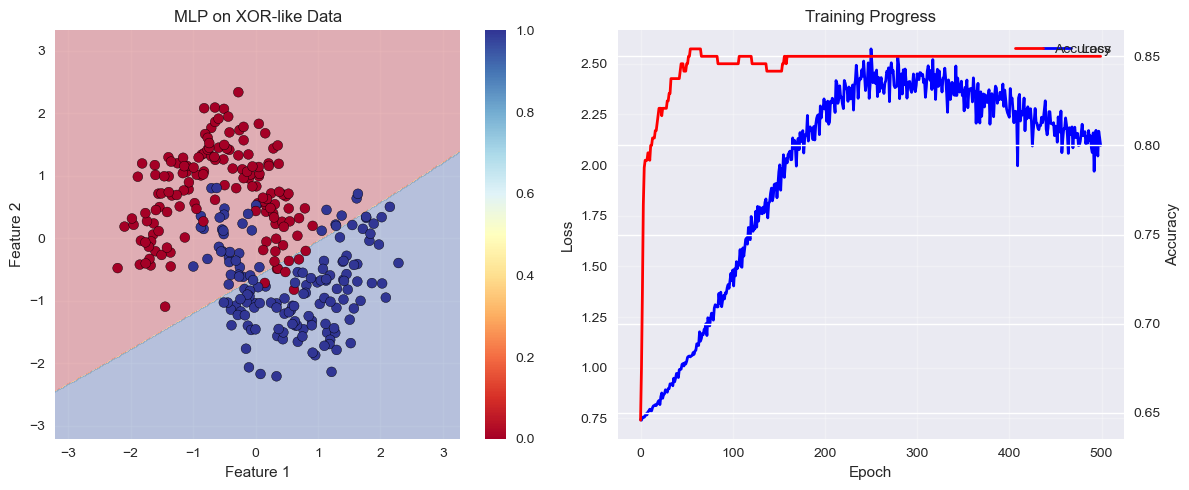


2️⃣ Concentric Circles (Complex Non-linear)
---------------------------------------------
MLP Accuracy on Circles: 0.953


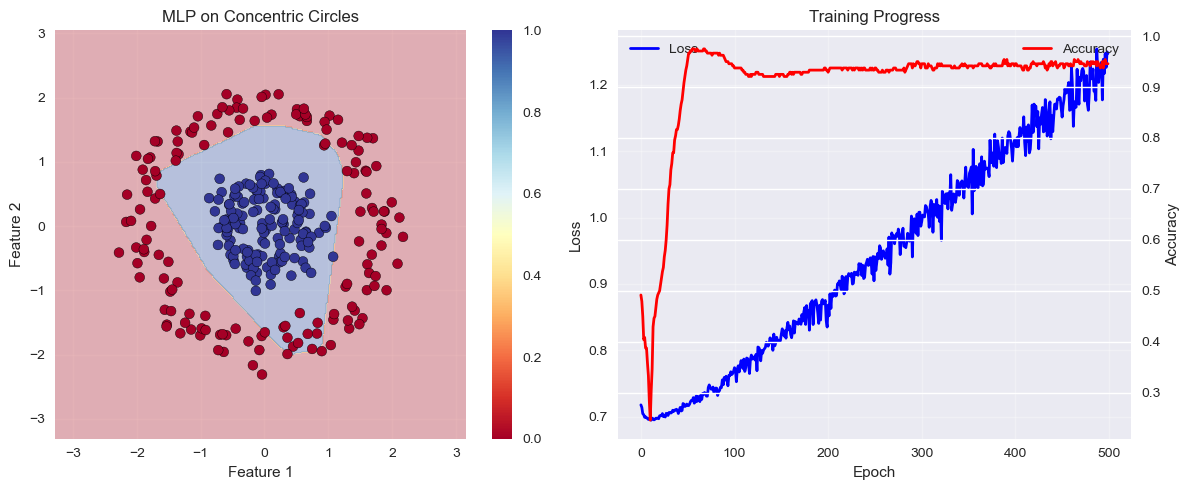


3️⃣ Multi-class Classification
-----------------------------------
MLP Accuracy on Multi-class: 0.848

Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.79      0.79       135
     Class 1       0.82      0.85      0.84       133
     Class 2       0.94      0.91      0.92       132

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



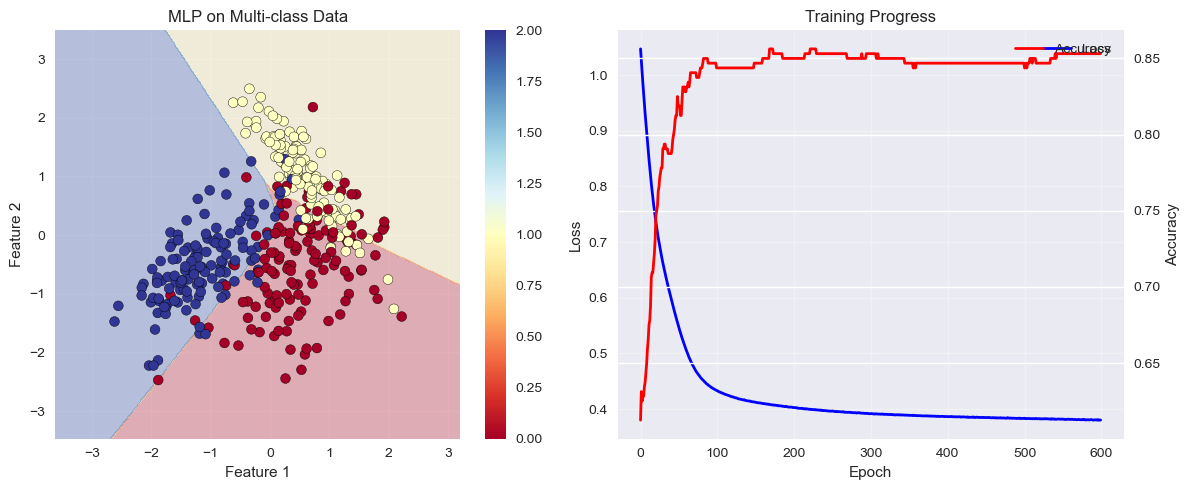


4️⃣ High-dimensional Data (Handwritten Digits)
------------------------------------------------
MLP Test Accuracy on Digits: 0.923


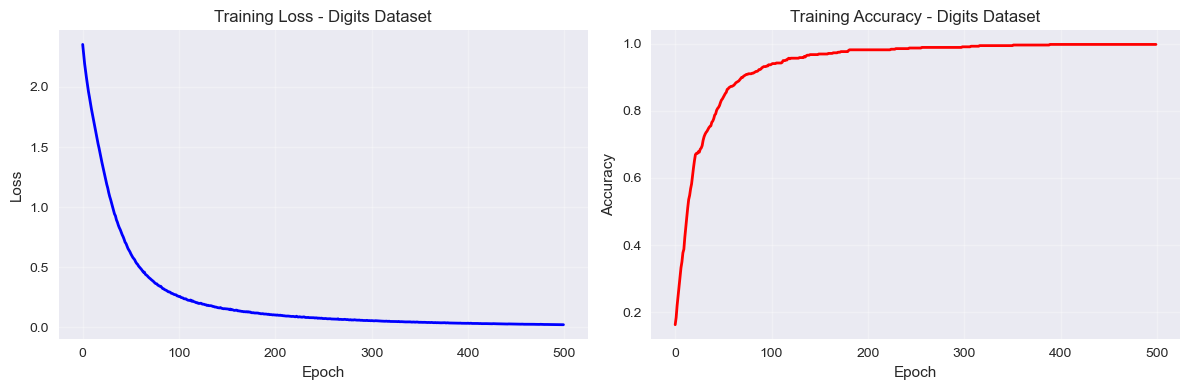


📊 Summary of MLP Performance:
XOR-like Data:        0.840
Concentric Circles:   0.953
Multi-class Data:     0.848
Handwritten Digits:   0.923

✅ MLPs successfully solve non-linearly separable problems!


In [23]:
# Test MLP on Different Datasets

def plot_decision_boundary_mlp(X, y, model, title="MLP Decision Boundary", resolution=0.02):
    """Plot decision boundary for MLP"""
    # Create a mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict_proba(mesh_points)
    
    if len(Z.shape) > 1 and Z.shape[1] > 1:  # Multi-class
        Z = np.argmax(Z, axis=1)
    else:  # Binary
        Z = (Z > 0.5).astype(int).flatten()
    
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Decision boundary
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=50, edgecolors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{title}')
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Training history
    plt.subplot(1, 2, 2)
    plt.plot(model.loss_history, 'b-', label='Loss', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add accuracy on second y-axis
    ax2 = plt.gca().twinx()
    ax2.plot(model.accuracy_history, 'r-', label='Accuracy', linewidth=2)
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

print("🧪 Testing MLP on Different Datasets")
print("=" * 50)

# Test 1: XOR Problem (Classic non-linearly separable)
print("1️⃣ XOR Problem (Non-linearly Separable)")
print("-" * 40)

# Generate XOR-like data
X_xor, y_xor = make_moons(n_samples=300, noise=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_xor_scaled = scaler.fit_transform(X_xor)

# Create and train MLP
mlp_xor = MLPScratch(layer_sizes=[2, 8, 4, 1], activation='relu', learning_rate=0.01)
mlp_xor.fit(X_xor_scaled, y_xor, epochs=500, batch_size=32, verbose=False)

# Evaluate
predictions_xor = mlp_xor.predict(X_xor_scaled)
accuracy_xor = accuracy_score(y_xor, predictions_xor)
print(f"MLP Accuracy on XOR-like data: {accuracy_xor:.3f}")

# Compare with perceptron
perceptron_xor = PerceptronScratch(learning_rate=0.1, max_epochs=100)
perceptron_xor.fit(X_xor_scaled, y_xor)
perceptron_predictions = perceptron_xor.predict(X_xor_scaled)
perceptron_accuracy = accuracy_score(y_xor, perceptron_predictions)
print(f"Perceptron Accuracy on XOR-like data: {perceptron_accuracy:.3f}")

print(f"🎯 MLP improvement: {accuracy_xor - perceptron_accuracy:.3f}")

# Visualize
plot_decision_boundary_mlp(X_xor_scaled, y_xor, mlp_xor, "MLP on XOR-like Data")

# Test 2: Circles Dataset
print("\n2️⃣ Concentric Circles (Complex Non-linear)")
print("-" * 45)

# Generate circles data
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)
X_circles_scaled = scaler.fit_transform(X_circles)

# Train MLP
mlp_circles = MLPScratch(layer_sizes=[2, 10, 8, 1], activation='relu', learning_rate=0.01)
mlp_circles.fit(X_circles_scaled, y_circles, epochs=500, batch_size=32, verbose=False)

# Evaluate
predictions_circles = mlp_circles.predict(X_circles_scaled)
accuracy_circles = accuracy_score(y_circles, predictions_circles)
print(f"MLP Accuracy on Circles: {accuracy_circles:.3f}")

# Visualize
plot_decision_boundary_mlp(X_circles_scaled, y_circles, mlp_circles, "MLP on Concentric Circles")

# Test 3: Multi-class Classification (Iris-like)
print("\n3️⃣ Multi-class Classification")
print("-" * 35)

# Generate multi-class data
X_multi, y_multi = make_classification(
    n_samples=400, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, n_classes=3, random_state=42
)
X_multi_scaled = scaler.fit_transform(X_multi)

# Train MLP for multi-class
mlp_multi = MLPScratch(layer_sizes=[2, 12, 8, 3], activation='relu', learning_rate=0.01)
mlp_multi.fit(X_multi_scaled, y_multi, epochs=600, batch_size=32, verbose=False)

# Evaluate
predictions_multi = mlp_multi.predict(X_multi_scaled)
accuracy_multi = accuracy_score(y_multi, predictions_multi)
print(f"MLP Accuracy on Multi-class: {accuracy_multi:.3f}")

# Print classification report
print("\nDetailed Classification Report:")
print(classification_report(y_multi, predictions_multi, target_names=['Class 0', 'Class 1', 'Class 2']))

# Visualize
plot_decision_boundary_mlp(X_multi_scaled, y_multi, mlp_multi, "MLP on Multi-class Data")

# Test 4: High-dimensional data (Digits)
print("\n4️⃣ High-dimensional Data (Handwritten Digits)")
print("-" * 48)

# Load digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Take a subset for faster training
subset_size = 1000
indices = np.random.choice(len(X_digits), subset_size, replace=False)
X_digits_subset = X_digits[indices]
y_digits_subset = y_digits[indices]

# Scale features
X_digits_scaled = scaler.fit_transform(X_digits_subset)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_digits_scaled, y_digits_subset, test_size=0.3, random_state=42
)

# Train MLP
mlp_digits = MLPScratch(
    layer_sizes=[64, 32, 16, 10], 
    activation='relu', 
    learning_rate=0.01
)
mlp_digits.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=False)

# Evaluate
test_predictions = mlp_digits.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"MLP Test Accuracy on Digits: {test_accuracy:.3f}")

# Plot training history for digits
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mlp_digits.loss_history, 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss - Digits Dataset')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(mlp_digits.accuracy_history, 'r-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Digits Dataset')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Summary of MLP Performance:")
print("=" * 40)
print(f"XOR-like Data:        {accuracy_xor:.3f}")
print(f"Concentric Circles:   {accuracy_circles:.3f}")
print(f"Multi-class Data:     {accuracy_multi:.3f}")
print(f"Handwritten Digits:   {test_accuracy:.3f}")
print("\n✅ MLPs successfully solve non-linearly separable problems!")

## 3.4 PyTorch Neural Networks: Professional Implementation ⚡

### 📖 Why PyTorch for Neural Networks?

**PyTorch advantages:**
- **Automatic Differentiation**: Automatic gradient computation
- **GPU Acceleration**: CUDA support for faster training
- **Dynamic Graphs**: Flexible model architectures
- **Rich Ecosystem**: Pre-built layers, optimizers, loss functions
- **Production Ready**: Easy deployment and optimization

### 🏗️ PyTorch Neural Network Components:

1. **`nn.Module`**: Base class for all neural network modules
2. **`nn.Linear`**: Fully connected (dense) layers
3. **`nn.functional`**: Activation functions and operations
4. **`torch.optim`**: Optimizers (SGD, Adam, RMSprop, etc.)
5. **`nn.loss`**: Loss functions (CrossEntropyLoss, MSELoss, etc.)

### ⚙️ Training Loop Structure:

```python
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights
```

### 📊 Key PyTorch Concepts:

| **Component** | **Purpose** | **Examples** |
|---------------|-------------|--------------|
| **Tensors** | Multi-dimensional arrays | torch.tensor(), torch.zeros() |
| **Autograd** | Automatic differentiation | requires_grad=True, .backward() |
| **Modules** | Building blocks | nn.Linear, nn.Conv2d, nn.LSTM |
| **Optimizers** | Weight update algorithms | Adam, SGD, RMSprop |
| **Loss Functions** | Training objectives | CrossEntropyLoss, MSELoss |
| **DataLoaders** | Batch processing | torch.utils.data.DataLoader |

Let's implement professional PyTorch neural networks! 🚀

In [24]:
# 3.4 PyTorch Neural Network Implementation

class PyTorchMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation='relu', dropout_prob=0.0):
        """
        PyTorch Multi-Layer Perceptron
        
        Args:
            input_size: Number of input features
            hidden_sizes: List of hidden layer sizes
            output_size: Number of output classes
            activation: Activation function ('relu', 'tanh', 'sigmoid')
            dropout_prob: Dropout probability for regularization
        """
        super(PyTorchMLP, self).__init__()
        
        self.layers = nn.ModuleList()
        self.dropout = nn.Dropout(dropout_prob)
        
        # Input layer to first hidden layer
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        
        # Create layers
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
        
        # Set activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation: {activation}")
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights using Xavier initialization"""
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)
    
    def forward(self, x):
        """Forward pass"""
        for i, layer in enumerate(self.layers[:-1]):  # All except last layer
            x = layer(x)
            x = self.activation(x)
            x = self.dropout(x)
        
        # Last layer (no activation for raw logits)
        x = self.layers[-1](x)
        return x

class NeuralNetworkTrainer:
    def __init__(self, model, device='cpu'):
        """
        Neural Network Trainer with comprehensive functionality
        
        Args:
            model: PyTorch model
            device: Device to run on ('cpu' or 'cuda')
        """
        self.model = model.to(device)
        self.device = device
        self.history = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': []
        }
    
    def train_epoch(self, dataloader, criterion, optimizer):
        """Train for one epoch"""
        self.model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
            
            # Forward pass
            outputs = self.model(batch_x)
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
        
        epoch_loss = running_loss / len(dataloader)
        epoch_acc = correct / total
        return epoch_loss, epoch_acc
    
    def validate_epoch(self, dataloader, criterion):
        """Validate for one epoch"""
        self.model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
                
                outputs = self.model(batch_x)
                loss = criterion(outputs, batch_y)
                
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
        
        epoch_loss = running_loss / len(dataloader)
        epoch_acc = correct / total
        return epoch_loss, epoch_acc
    
    def fit(self, train_loader, val_loader, criterion, optimizer, 
            num_epochs=100, scheduler=None, verbose=True):
        """
        Train the model
        
        Args:
            train_loader: Training data loader
            val_loader: Validation data loader
            criterion: Loss function
            optimizer: Optimizer
            num_epochs: Number of training epochs
            scheduler: Learning rate scheduler (optional)
            verbose: Whether to print progress
        """
        best_val_acc = 0.0
        
        for epoch in range(num_epochs):
            # Training
            train_loss, train_acc = self.train_epoch(train_loader, criterion, optimizer)
            
            # Validation
            val_loss, val_acc = self.validate_epoch(val_loader, criterion)
            
            # Update learning rate
            if scheduler:
                scheduler.step()
            
            # Record history
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            
            # Print progress
            if verbose and (epoch + 1) % 20 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}] - '
                      f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
                      f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
            
            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                self.best_state_dict = self.model.state_dict().copy()
        
        print(f'Training completed! Best validation accuracy: {best_val_acc:.4f}')
        
        # Load best model
        self.model.load_state_dict(self.best_state_dict)
    
    def predict(self, dataloader):
        """Make predictions"""
        self.model.eval()
        predictions = []
        probabilities = []
        
        with torch.no_grad():
            for batch_x, _ in dataloader:
                batch_x = batch_x.to(self.device)
                outputs = self.model(batch_x)
                probs = torch.softmax(outputs, dim=1)
                _, preds = torch.max(outputs, 1)
                
                predictions.extend(preds.cpu().numpy())
                probabilities.extend(probs.cpu().numpy())
        
        return np.array(predictions), np.array(probabilities)
    
    def plot_training_history(self):
        """Plot training history"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        ax1.plot(self.history['train_loss'], 'b-', label='Training Loss')
        ax1.plot(self.history['val_loss'], 'r-', label='Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training and Validation Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot accuracy
        ax2.plot(self.history['train_acc'], 'b-', label='Training Accuracy')
        ax2.plot(self.history['val_acc'], 'r-', label='Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Training and Validation Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print("✅ PyTorch MLP implementation complete!")

✅ PyTorch MLP implementation complete!


🧪 PyTorch Neural Network Experiments
1️⃣ Architecture Comparison on Moons Dataset
---------------------------------------------

Testing Small Architecture: [8, 4]
Training completed! Best validation accuracy: 0.8350
Small Test Accuracy: 0.9200

Testing Medium Architecture: [16, 8, 4]
Training completed! Best validation accuracy: 0.8850
Medium Test Accuracy: 0.9500

Testing Large Architecture: [32, 16, 8]
Training completed! Best validation accuracy: 0.8900
Large Test Accuracy: 0.9450

Testing Deep Architecture: [16, 16, 16, 8]
Training completed! Best validation accuracy: 0.8850
Deep Test Accuracy: 0.9450


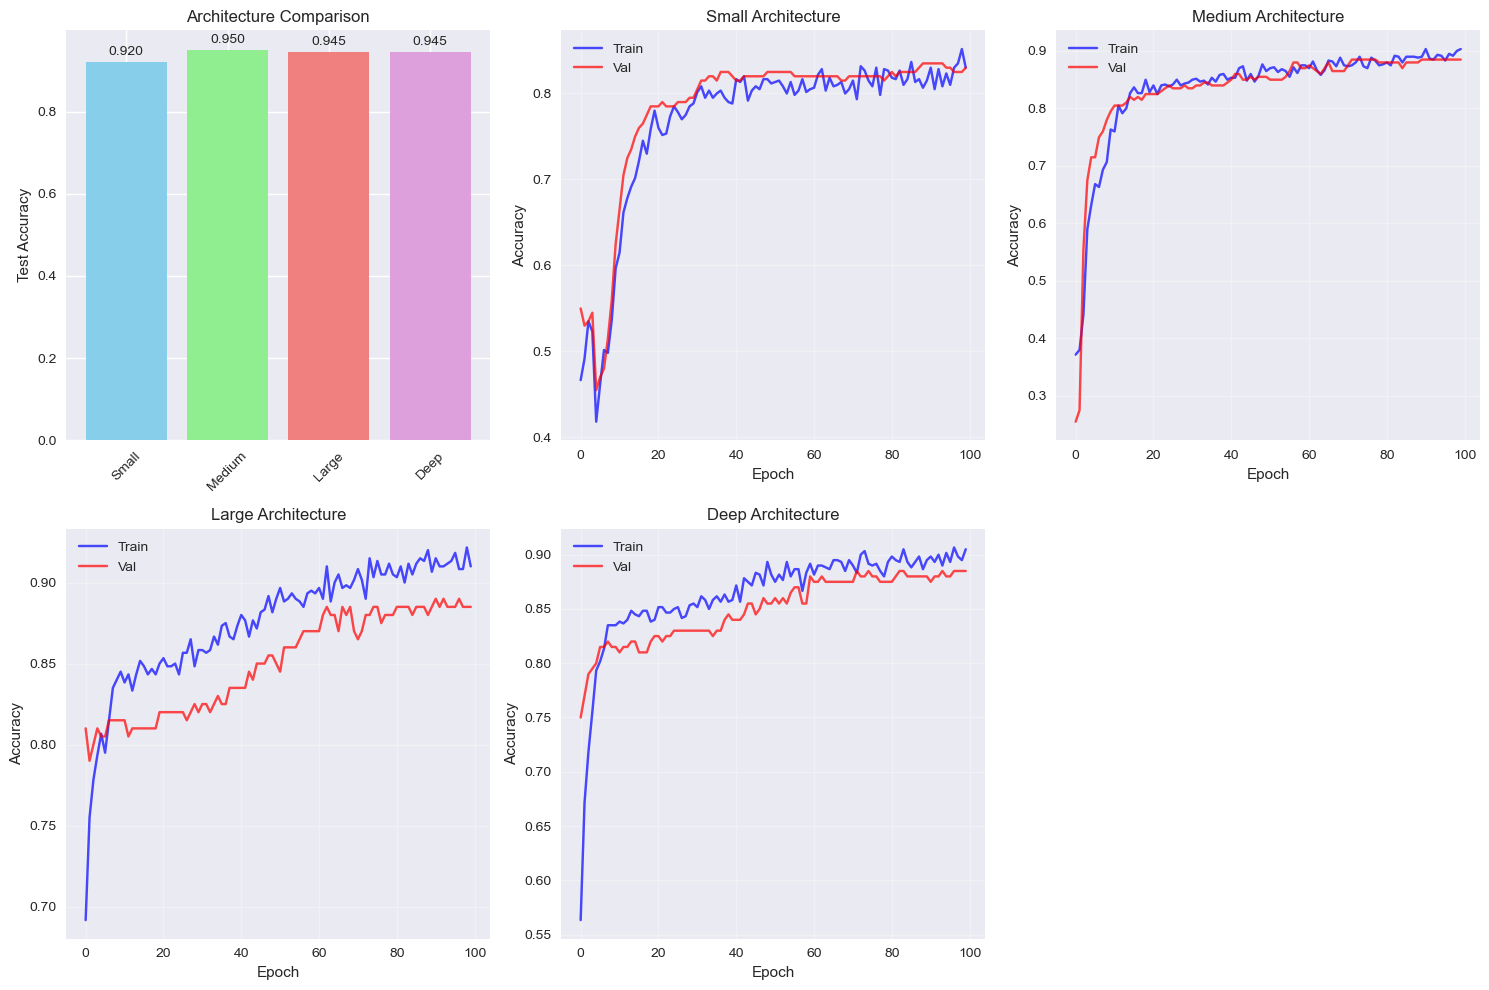


2️⃣ Optimizer Comparison
-------------------------

Testing SGD Optimizer
Training completed! Best validation accuracy: 0.9400
SGD Test Accuracy: 0.8750

Testing Adam Optimizer
Training completed! Best validation accuracy: 0.9300
Adam Test Accuracy: 0.8950

Testing RMSprop Optimizer
Training completed! Best validation accuracy: 0.9200
RMSprop Test Accuracy: 0.8850

Testing AdamW Optimizer
Training completed! Best validation accuracy: 0.9250
AdamW Test Accuracy: 0.8800


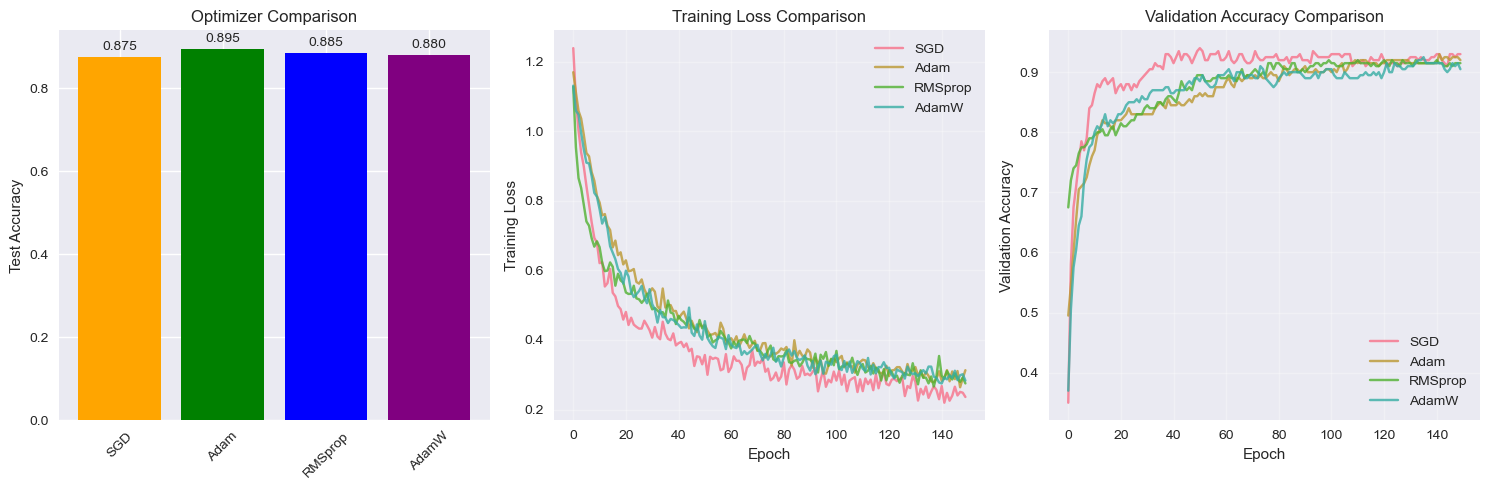


3️⃣ Regularization Effects (Dropout)
-----------------------------------

Testing Dropout = 0.0
Training completed! Best validation accuracy: 0.9300
Dropout 0.0 Test Accuracy: 0.8950

Testing Dropout = 0.1
Training completed! Best validation accuracy: 0.9350
Dropout 0.1 Test Accuracy: 0.9100

Testing Dropout = 0.3
Training completed! Best validation accuracy: 0.9300
Dropout 0.3 Test Accuracy: 0.9000

Testing Dropout = 0.5
Training completed! Best validation accuracy: 0.9150
Dropout 0.5 Test Accuracy: 0.8950


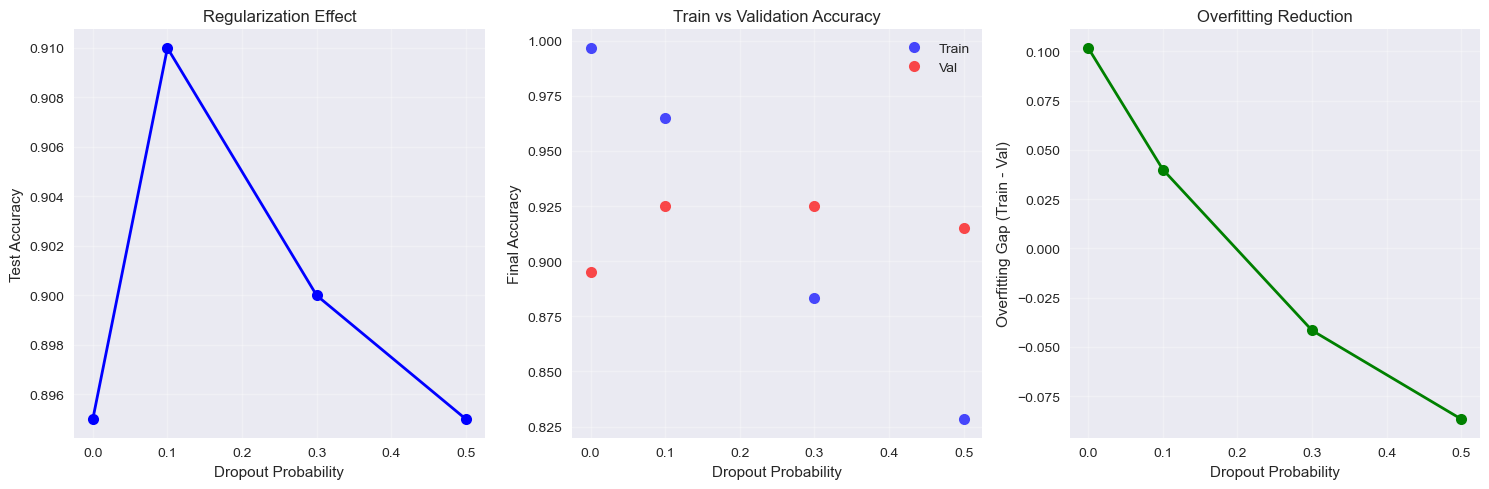


📊 Experiment Summary:
Architecture Results:
  Small     : 0.9200
  Medium    : 0.9500
  Large     : 0.9450
  Deep      : 0.9450

Optimizer Results:
  SGD       : 0.8750
  Adam      : 0.8950
  RMSprop   : 0.8850
  AdamW     : 0.8800

Regularization Results:
  Dropout 0.0: 0.8950
  Dropout 0.1: 0.9100
  Dropout 0.3: 0.9000
  Dropout 0.5: 0.8950

💡 Key Insights:
• Deeper networks can learn more complex patterns but may overfit
• Adam optimizer often converges faster than SGD
• Proper dropout reduces overfitting and improves generalization
• Architecture choice significantly impacts performance
• Regularization is crucial for deep networks


In [25]:
# Comprehensive PyTorch Neural Network Experiments

def create_data_loaders(X, y, batch_size=64, test_size=0.2, val_size=0.2):
    """Create PyTorch data loaders with train/val/test splits"""
    
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Second split: separate train and validation from remaining data
    val_size_adjusted = val_size / (1 - test_size)  # Adjust for remaining data
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size_adjusted, random_state=42, stratify=y_temp
    )
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)
    
    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

print("🧪 PyTorch Neural Network Experiments")
print("=" * 50)

# Experiment 1: Moons Dataset with Different Architectures
print("1️⃣ Architecture Comparison on Moons Dataset")
print("-" * 45)

# Generate and prepare data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.3, random_state=42)
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(X_moons_scaled, y_moons)

# Test different architectures
architectures = {
    'Small': [8, 4],
    'Medium': [16, 8, 4],
    'Large': [32, 16, 8],
    'Deep': [16, 16, 16, 8]
}

results = {}

for name, hidden_sizes in architectures.items():
    print(f"\nTesting {name} Architecture: {hidden_sizes}")
    
    # Create model
    model = PyTorchMLP(
        input_size=2, 
        hidden_sizes=hidden_sizes, 
        output_size=2,
        activation='relu',
        dropout_prob=0.1
    )
    
    # Setup training
    trainer = NeuralNetworkTrainer(model, device=device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train
    trainer.fit(train_loader, val_loader, criterion, optimizer, 
                num_epochs=100, verbose=False)
    
    # Evaluate on test set
    test_preds, test_probs = trainer.predict(test_loader)
    
    # Get true labels
    test_labels = []
    for _, batch_y in test_loader:
        test_labels.extend(batch_y.numpy())
    test_labels = np.array(test_labels)
    
    test_accuracy = accuracy_score(test_labels, test_preds)
    results[name] = {
        'accuracy': test_accuracy,
        'trainer': trainer,
        'hidden_sizes': hidden_sizes
    }
    
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Plot architecture comparison
plt.figure(figsize=(15, 10))

# Plot 1: Accuracy comparison
plt.subplot(2, 3, 1)
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
bars = plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'plum'])
plt.ylabel('Test Accuracy')
plt.title('Architecture Comparison')
plt.xticks(rotation=45)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

# Plot training histories
for idx, (name, result) in enumerate(results.items()):
    plt.subplot(2, 3, idx + 2)
    trainer = result['trainer']
    plt.plot(trainer.history['train_acc'], 'b-', label='Train', alpha=0.7)
    plt.plot(trainer.history['val_acc'], 'r-', label='Val', alpha=0.7)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{name} Architecture')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Experiment 2: Optimizer Comparison
print("\n2️⃣ Optimizer Comparison")
print("-" * 25)

# Generate classification data
X_class, y_class = make_classification(
    n_samples=1000, n_features=10, n_informative=8, 
    n_redundant=2, n_classes=3, random_state=42
)
X_class_scaled = scaler.fit_transform(X_class)

# Create data loaders
train_loader_opt, val_loader_opt, test_loader_opt = create_data_loaders(X_class_scaled, y_class)

# Test different optimizers
optimizers_config = {
    'SGD': {'class': optim.SGD, 'params': {'lr': 0.01, 'momentum': 0.9}},
    'Adam': {'class': optim.Adam, 'params': {'lr': 0.001}},
    'RMSprop': {'class': optim.RMSprop, 'params': {'lr': 0.001}},
    'AdamW': {'class': optim.AdamW, 'params': {'lr': 0.001, 'weight_decay': 0.01}}
}

optimizer_results = {}

for opt_name, opt_config in optimizers_config.items():
    print(f"\nTesting {opt_name} Optimizer")
    
    # Create model
    model = PyTorchMLP(
        input_size=10, 
        hidden_sizes=[32, 16], 
        output_size=3,
        activation='relu',
        dropout_prob=0.2
    )
    
    # Setup training
    trainer = NeuralNetworkTrainer(model, device=device)
    criterion = nn.CrossEntropyLoss()
    optimizer = opt_config['class'](model.parameters(), **opt_config['params'])
    
    # Train
    trainer.fit(train_loader_opt, val_loader_opt, criterion, optimizer, 
                num_epochs=150, verbose=False)
    
    # Evaluate
    test_preds, _ = trainer.predict(test_loader_opt)
    test_labels = []
    for _, batch_y in test_loader_opt:
        test_labels.extend(batch_y.numpy())
    test_labels = np.array(test_labels)
    
    test_accuracy = accuracy_score(test_labels, test_preds)
    optimizer_results[opt_name] = {
        'accuracy': test_accuracy,
        'trainer': trainer
    }
    
    print(f"{opt_name} Test Accuracy: {test_accuracy:.4f}")

# Plot optimizer comparison
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
opt_names = list(optimizer_results.keys())
opt_accuracies = [optimizer_results[name]['accuracy'] for name in opt_names]
bars = plt.bar(opt_names, opt_accuracies, color=['orange', 'green', 'blue', 'purple'])
plt.ylabel('Test Accuracy')
plt.title('Optimizer Comparison')
plt.xticks(rotation=45)

for bar, acc in zip(bars, opt_accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

# Training loss comparison
plt.subplot(1, 3, 2)
for opt_name, result in optimizer_results.items():
    trainer = result['trainer']
    plt.plot(trainer.history['train_loss'], label=opt_name, alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Validation accuracy comparison
plt.subplot(1, 3, 3)
for opt_name, result in optimizer_results.items():
    trainer = result['trainer']
    plt.plot(trainer.history['val_acc'], label=opt_name, alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Experiment 3: Regularization Effects
print("\n3️⃣ Regularization Effects (Dropout)")
print("-" * 35)

dropout_values = [0.0, 0.1, 0.3, 0.5]
regularization_results = {}

for dropout_prob in dropout_values:
    print(f"\nTesting Dropout = {dropout_prob}")
    
    # Create model with different dropout
    model = PyTorchMLP(
        input_size=10, 
        hidden_sizes=[64, 32, 16], 
        output_size=3,
        activation='relu',
        dropout_prob=dropout_prob
    )
    
    # Setup training
    trainer = NeuralNetworkTrainer(model, device=device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train
    trainer.fit(train_loader_opt, val_loader_opt, criterion, optimizer, 
                num_epochs=120, verbose=False)
    
    # Evaluate
    test_preds, _ = trainer.predict(test_loader_opt)
    test_labels = []
    for _, batch_y in test_loader_opt:
        test_labels.extend(batch_y.numpy())
    test_labels = np.array(test_labels)
    
    test_accuracy = accuracy_score(test_labels, test_preds)
    regularization_results[dropout_prob] = {
        'accuracy': test_accuracy,
        'trainer': trainer
    }
    
    print(f"Dropout {dropout_prob} Test Accuracy: {test_accuracy:.4f}")

# Plot regularization effects
plt.figure(figsize=(15, 5))

# Accuracy vs Dropout
plt.subplot(1, 3, 1)
dropout_vals = list(regularization_results.keys())
reg_accuracies = [regularization_results[dp]['accuracy'] for dp in dropout_vals]
plt.plot(dropout_vals, reg_accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Dropout Probability')
plt.ylabel('Test Accuracy')
plt.title('Regularization Effect')
plt.grid(True, alpha=0.3)

# Training vs Validation accuracy (overfitting analysis)
plt.subplot(1, 3, 2)
for dropout_prob, result in regularization_results.items():
    trainer = result['trainer']
    final_train_acc = trainer.history['train_acc'][-1]
    final_val_acc = trainer.history['val_acc'][-1]
    plt.plot(dropout_prob, final_train_acc, 'bo', markersize=8, alpha=0.7, label='Train' if dropout_prob == 0.0 else "")
    plt.plot(dropout_prob, final_val_acc, 'ro', markersize=8, alpha=0.7, label='Val' if dropout_prob == 0.0 else "")

plt.xlabel('Dropout Probability')
plt.ylabel('Final Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Overfitting gap
plt.subplot(1, 3, 3)
overfitting_gaps = []
for dropout_prob, result in regularization_results.items():
    trainer = result['trainer']
    final_train_acc = trainer.history['train_acc'][-1]
    final_val_acc = trainer.history['val_acc'][-1]
    gap = final_train_acc - final_val_acc
    overfitting_gaps.append(gap)

plt.plot(dropout_vals, overfitting_gaps, 'go-', linewidth=2, markersize=8)
plt.xlabel('Dropout Probability')
plt.ylabel('Overfitting Gap (Train - Val)')
plt.title('Overfitting Reduction')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Experiment Summary:")
print("=" * 30)
print("Architecture Results:")
for name, result in results.items():
    print(f"  {name:10s}: {result['accuracy']:.4f}")

print("\nOptimizer Results:")
for name, result in optimizer_results.items():
    print(f"  {name:10s}: {result['accuracy']:.4f}")

print("\nRegularization Results:")
for dropout, result in regularization_results.items():
    print(f"  Dropout {dropout}: {result['accuracy']:.4f}")

print("\n💡 Key Insights:")
print("• Deeper networks can learn more complex patterns but may overfit")
print("• Adam optimizer often converges faster than SGD")
print("• Proper dropout reduces overfitting and improves generalization")
print("• Architecture choice significantly impacts performance")
print("• Regularization is crucial for deep networks")

## 3.5 Batch Normalization: Stabilizing Deep Network Training 🔄

### 📖 Theory: The Internal Covariate Shift Problem

**Batch Normalization** addresses a fundamental challenge in training deep neural networks called **Internal Covariate Shift**.

### 🎯 What is Internal Covariate Shift?

As we train a neural network:
1. **Weights change** during each update
2. **Input distributions** to deeper layers constantly shift
3. **Hidden layers** must adapt to new input distributions
4. **Training becomes unstable** and slow

**Example:**
```
Initial:     Layer 1 outputs: [0.1, 0.3, 0.2, ...]
After 100 iterations: Layer 1 outputs: [2.1, 1.8, 3.2, ...]
```

Layer 2 now receives completely different input distributions!

### 🔧 Batch Normalization Solution:

**Key Idea:** Normalize inputs to each layer to have **zero mean** and **unit variance**.

**Mathematical Formulation:**

For a batch of inputs **x = {x₁, x₂, ..., xₘ}**:

1. **Compute batch statistics:**
   ```
   μ = (1/m) Σᵢ xᵢ          # Batch mean
   σ² = (1/m) Σᵢ (xᵢ - μ)²  # Batch variance
   ```

2. **Normalize:**
   ```
   x̂ᵢ = (xᵢ - μ) / √(σ² + ε)  # ε prevents division by zero
   ```

3. **Scale and shift (learnable parameters):**
   ```
   yᵢ = γ x̂ᵢ + β
   ```
   - **γ (gamma):** Scale parameter (learnable)
   - **β (beta):** Shift parameter (learnable)

### 🎯 Why Scale and Shift?

Without γ and β, we force every layer to have zero mean and unit variance, which might be too restrictive. The network can learn:
- **γ = √σ², β = μ**: Recover original distribution
- **γ = 1, β = 0**: Keep normalized distribution
- **Any other values**: Learn optimal distribution

### 📊 Benefits of Batch Normalization:

| **Benefit** | **Explanation** | **Impact** |
|-------------|----------------|------------|
| **Faster Training** | Higher learning rates possible | 2-10x speedup |
| **Stable Gradients** | Reduces internal covariate shift | Better convergence |
| **Regularization** | Adds noise, reduces overfitting | Replaces some dropout |
| **Less Sensitive to Initialization** | Normalizes distributions | More robust training |
| **Enables Deeper Networks** | Stable gradient flow | 50+ layer networks |

### ⚙️ Batch Norm During Training vs Inference:

**Training Mode:**
- Use batch statistics (mean and variance from current batch)
- Update running statistics for inference

**Inference Mode:**
- Use running statistics (moving averages from training)
- No dependency on batch size or other samples

### 🏗️ Where to Place Batch Norm:

**Option 1: After Linear Layer (most common)**
```
Linear → BatchNorm → Activation
```

**Option 2: After Activation**
```
Linear → Activation → BatchNorm
```

**Current consensus:** After linear layer, before activation works better in most cases.

Let's implement Batch Normalization from scratch and with PyTorch! 👇

🔍 Demonstrating Batch Normalization Effects
Original Data Statistics:
Feature 1 - Mean: 5.184, Std: 1.641
Feature 2 - Mean: -3.092, Std: 0.487
Feature 3 - Mean: 1.224, Std: 3.322

After Batch Normalization:
Feature 1 - Mean: -0.000, Std: 1.000
Feature 2 - Mean: 0.000, Std: 1.000
Feature 3 - Mean: 0.000, Std: 1.000


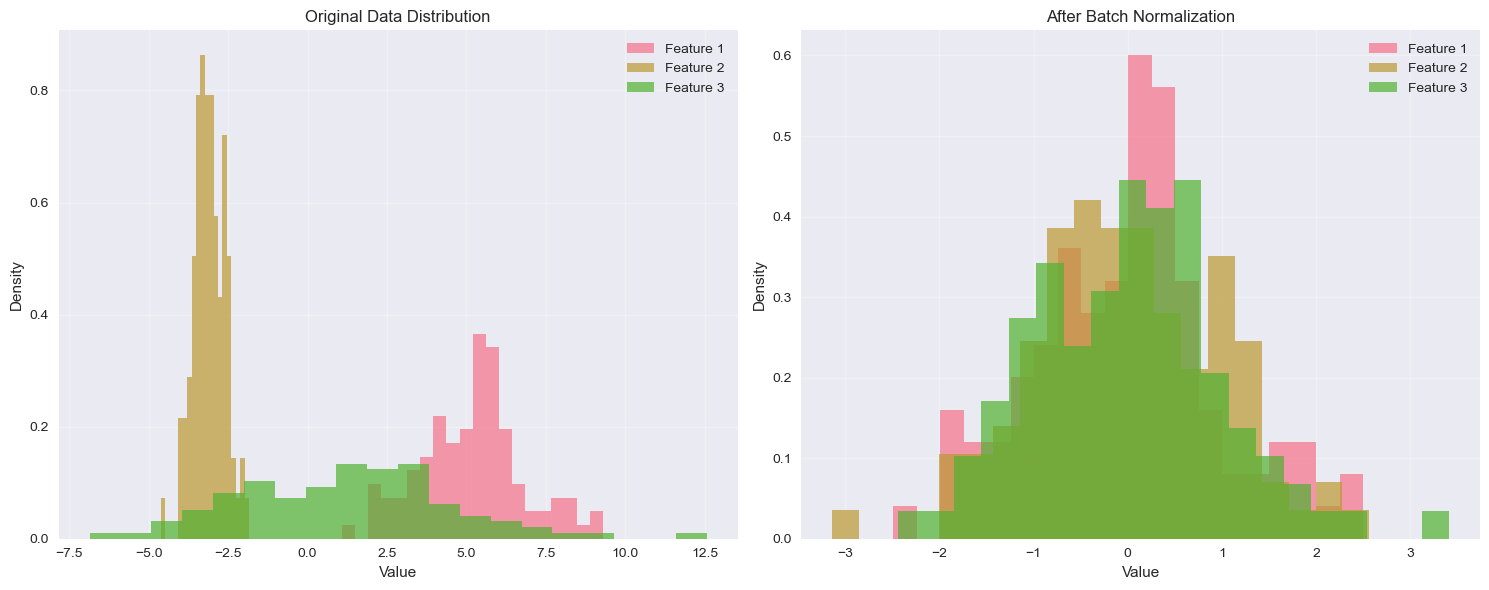


💡 Notice how all features now have similar distributions!
✅ This helps with stable training and faster convergence.


In [26]:
# 3.5 Batch Normalization Implementation from Scratch

class BatchNormScratch:
    def __init__(self, num_features, momentum=0.1, eps=1e-5):
        """
        Batch Normalization implementation from scratch
        
        Args:
            num_features: Number of features (channels) to normalize
            momentum: Momentum for running statistics update
            eps: Small value to avoid division by zero
        """
        self.num_features = num_features
        self.momentum = momentum
        self.eps = eps
        
        # Learnable parameters
        self.gamma = np.ones(num_features)  # Scale parameter
        self.beta = np.zeros(num_features)  # Shift parameter
        
        # Running statistics for inference
        self.running_mean = np.zeros(num_features)
        self.running_var = np.ones(num_features)
        
        # Training mode flag
        self.training = True
        
        # For backpropagation
        self.cache = None
    
    def forward(self, x):
        """
        Forward pass of batch normalization
        
        Args:
            x: Input tensor of shape (batch_size, num_features)
            
        Returns:
            out: Normalized output
        """
        if self.training:
            # Training mode: use batch statistics
            batch_mean = np.mean(x, axis=0)
            batch_var = np.var(x, axis=0)
            
            # Normalize
            x_normalized = (x - batch_mean) / np.sqrt(batch_var + self.eps)
            
            # Scale and shift
            out = self.gamma * x_normalized + self.beta
            
            # Update running statistics
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var
            
            # Cache for backpropagation
            self.cache = (x, x_normalized, batch_mean, batch_var)
            
        else:
            # Inference mode: use running statistics
            x_normalized = (x - self.running_mean) / np.sqrt(self.running_var + self.eps)
            out = self.gamma * x_normalized + self.beta
        
        return out
    
    def backward(self, dout):
        """
        Backward pass of batch normalization
        
        Args:
            dout: Gradient from next layer
            
        Returns:
            dx: Gradient with respect to input
        """
        x, x_normalized, batch_mean, batch_var = self.cache
        N = x.shape[0]
        
        # Gradients for scale and shift parameters
        dgamma = np.sum(dout * x_normalized, axis=0)
        dbeta = np.sum(dout, axis=0)
        
        # Gradient with respect to normalized input
        dx_normalized = dout * self.gamma
        
        # Gradients with respect to variance and mean
        dvar = np.sum(dx_normalized * (x - batch_mean), axis=0) * -0.5 * (batch_var + self.eps)**(-1.5)
        dmean = np.sum(dx_normalized * -1 / np.sqrt(batch_var + self.eps), axis=0) + dvar * np.sum(-2 * (x - batch_mean), axis=0) / N
        
        # Gradient with respect to input
        dx = dx_normalized / np.sqrt(batch_var + self.eps) + dvar * 2 * (x - batch_mean) / N + dmean / N
        
        return dx, dgamma, dbeta
    
    def eval(self):
        """Set to evaluation mode"""
        self.training = False
    
    def train(self):
        """Set to training mode"""
        self.training = True

# Demonstrate Batch Normalization effects
print("🔍 Demonstrating Batch Normalization Effects")
print("=" * 50)

# Create sample data with different distributions
np.random.seed(42)
batch_size = 100
num_features = 3

# Create data with different means and variances for each feature
X = np.random.randn(batch_size, num_features)
X[:, 0] = X[:, 0] * 2 + 5    # Feature 1: mean=5, std=2
X[:, 1] = X[:, 1] * 0.5 - 3  # Feature 2: mean=-3, std=0.5
X[:, 2] = X[:, 2] * 3 + 1    # Feature 3: mean=1, std=3

print("Original Data Statistics:")
print(f"Feature 1 - Mean: {np.mean(X[:, 0]):.3f}, Std: {np.std(X[:, 0]):.3f}")
print(f"Feature 2 - Mean: {np.mean(X[:, 1]):.3f}, Std: {np.std(X[:, 1]):.3f}")
print(f"Feature 3 - Mean: {np.mean(X[:, 2]):.3f}, Std: {np.std(X[:, 2]):.3f}")

# Apply Batch Normalization
bn = BatchNormScratch(num_features=3)
X_normalized = bn.forward(X)

print("\nAfter Batch Normalization:")
print(f"Feature 1 - Mean: {np.mean(X_normalized[:, 0]):.3f}, Std: {np.std(X_normalized[:, 0]):.3f}")
print(f"Feature 2 - Mean: {np.mean(X_normalized[:, 1]):.3f}, Std: {np.std(X_normalized[:, 1]):.3f}")
print(f"Feature 3 - Mean: {np.mean(X_normalized[:, 2]):.3f}, Std: {np.std(X_normalized[:, 2]):.3f}")

# Visualize the effect
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original data distribution
ax1.hist(X[:, 0], alpha=0.7, label='Feature 1', bins=20, density=True)
ax1.hist(X[:, 1], alpha=0.7, label='Feature 2', bins=20, density=True)
ax1.hist(X[:, 2], alpha=0.7, label='Feature 3', bins=20, density=True)
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.set_title('Original Data Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Normalized data distribution
ax2.hist(X_normalized[:, 0], alpha=0.7, label='Feature 1', bins=20, density=True)
ax2.hist(X_normalized[:, 1], alpha=0.7, label='Feature 2', bins=20, density=True)
ax2.hist(X_normalized[:, 2], alpha=0.7, label='Feature 3', bins=20, density=True)
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('After Batch Normalization')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice how all features now have similar distributions!")
print("✅ This helps with stable training and faster convergence.")

In [27]:
# PyTorch Neural Network with Batch Normalization

class MLPWithBatchNorm(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, 
                 activation='relu', dropout_prob=0.0, use_batch_norm=True):
        """
        MLP with optional Batch Normalization
        
        Args:
            input_size: Number of input features
            hidden_sizes: List of hidden layer sizes
            output_size: Number of output classes
            activation: Activation function
            dropout_prob: Dropout probability
            use_batch_norm: Whether to use batch normalization
        """
        super(MLPWithBatchNorm, self).__init__()
        
        self.use_batch_norm = use_batch_norm
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList() if use_batch_norm else None
        self.dropout = nn.Dropout(dropout_prob)
        
        # Create layer sizes list
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        
        # Create layers
        for i in range(len(layer_sizes) - 1):
            # Add linear layer
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            
            # Add batch norm for hidden layers only
            if use_batch_norm and i < len(layer_sizes) - 2:  # Not for output layer
                self.batch_norms.append(nn.BatchNorm1d(layer_sizes[i + 1]))
        
        # Set activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation: {activation}")
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights"""
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)
    
    def forward(self, x):
        """Forward pass with optional batch normalization"""
        for i, layer in enumerate(self.layers[:-1]):  # All except last layer
            x = layer(x)
            
            # Apply batch normalization if enabled
            if self.use_batch_norm:
                x = self.batch_norms[i](x)
            
            # Apply activation and dropout
            x = self.activation(x)
            x = self.dropout(x)
        
        # Last layer (no batch norm, activation, or dropout)
        x = self.layers[-1](x)
        return x

print("✅ MLP with Batch Normalization implemented!")

✅ MLP with Batch Normalization implemented!


🧪 Batch Normalization Experiments
1️⃣ Deep Network Training Stability
-----------------------------------
Training deep networks...
Network architecture: 20 → 64 → 32 → 16 → 8 → 5


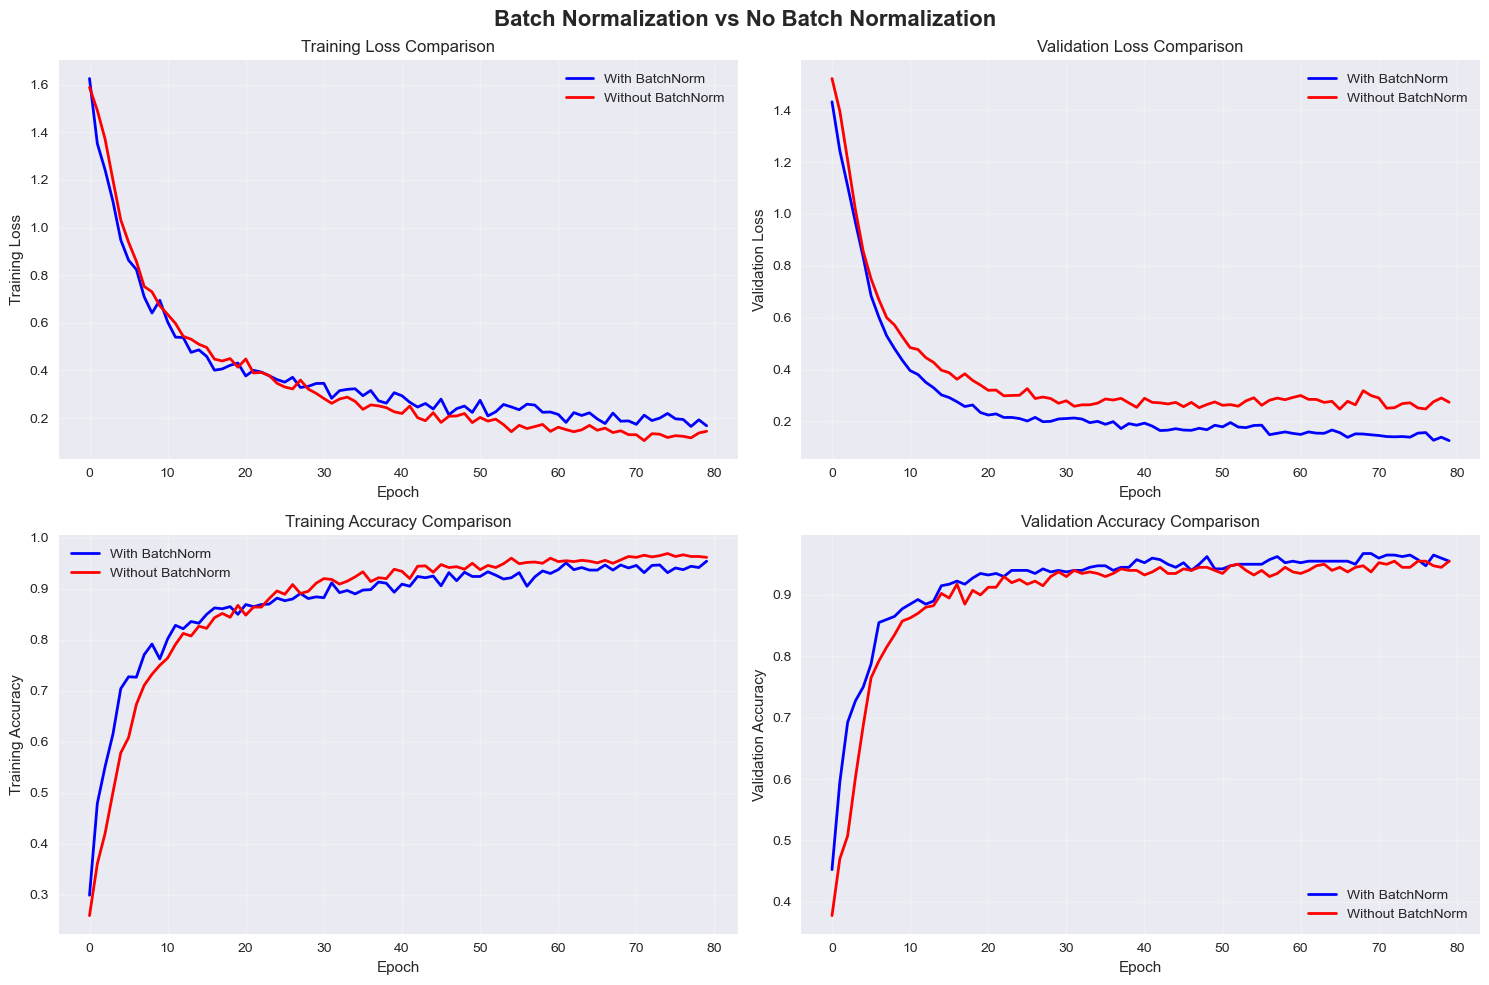


Final Results:
With BatchNorm    - Train Acc: 0.9542, Val Acc: 0.9550
Without BatchNorm - Train Acc: 0.9617, Val Acc: 0.9550

2️⃣ Learning Rate Sensitivity Analysis
--------------------------------------

Testing learning rate: 0.001
  With BatchNorm: 0.8225
  Without BatchNorm: 0.7375

Testing learning rate: 0.01
  With BatchNorm: 0.8225
  Without BatchNorm: 0.7375

Testing learning rate: 0.01
  With BatchNorm: 0.9275
  Without BatchNorm: 0.9150

Testing learning rate: 0.1
  With BatchNorm: 0.9275
  Without BatchNorm: 0.9150

Testing learning rate: 0.1
  With BatchNorm: 0.9350
  Without BatchNorm: 0.9500

Testing learning rate: 1.0
  With BatchNorm: 0.9350
  Without BatchNorm: 0.9500

Testing learning rate: 1.0
  With BatchNorm: 0.9075
  Without BatchNorm: 0.2000
  With BatchNorm: 0.9075
  Without BatchNorm: 0.2000


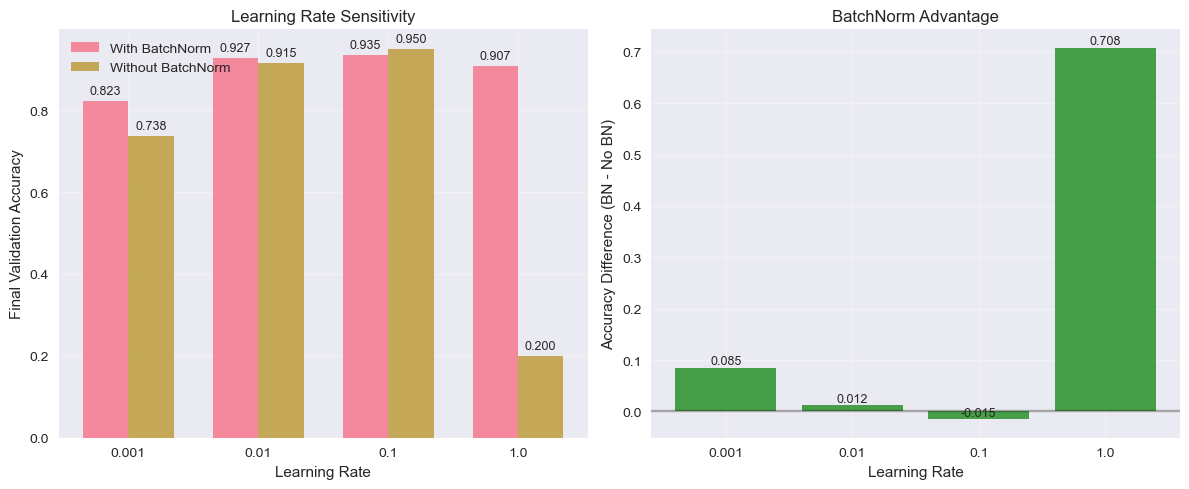


📊 Learning Rate Sensitivity Results:
LR 0.001: BN=0.8225, No BN=0.7375, Diff=+0.0850
LR 0.010: BN=0.9275, No BN=0.9150, Diff=+0.0125
LR 0.100: BN=0.9350, No BN=0.9500, Diff=-0.0150
LR 1.000: BN=0.9075, No BN=0.2000, Diff=+0.7075

💡 Key Observations:
• Batch Normalization enables higher learning rates
• Networks with BN are more stable across different learning rates
• BN provides consistent improvement, especially at higher learning rates
• Without BN, high learning rates often cause training instability


In [28]:
# Comprehensive Batch Normalization Experiments

def compare_training_dynamics(model_with_bn, model_without_bn, train_loader, val_loader, 
                             num_epochs=100, lr=0.01):
    """Compare training dynamics with and without batch normalization"""
    
    # Setup training for both models
    criterion = nn.CrossEntropyLoss()
    
    # Optimizers
    optimizer_with_bn = optim.SGD(model_with_bn.parameters(), lr=lr, momentum=0.9)
    optimizer_without_bn = optim.SGD(model_without_bn.parameters(), lr=lr, momentum=0.9)
    
    # Training history
    history_with_bn = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    history_without_bn = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    # Training loop
    for epoch in range(num_epochs):
        # Train both models
        for model, optimizer, history in [(model_with_bn, optimizer_with_bn, history_with_bn),
                                         (model_without_bn, optimizer_without_bn, history_without_bn)]:
            
            # Training phase
            model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0
            
            for batch_x, batch_y in train_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                
                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += batch_y.size(0)
                train_correct += (predicted == batch_y).sum().item()
            
            # Validation phase
            model.eval()
            val_loss = 0.0
            val_correct = 0
            val_total = 0
            
            with torch.no_grad():
                for batch_x, batch_y in val_loader:
                    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                    outputs = model(batch_x)
                    loss = criterion(outputs, batch_y)
                    
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    val_total += batch_y.size(0)
                    val_correct += (predicted == batch_y).sum().item()
            
            # Record metrics
            history['train_loss'].append(train_loss / len(train_loader))
            history['train_acc'].append(train_correct / train_total)
            history['val_loss'].append(val_loss / len(val_loader))
            history['val_acc'].append(val_correct / val_total)
    
    return history_with_bn, history_without_bn

print("🧪 Batch Normalization Experiments")
print("=" * 40)

# Experiment 1: Deep Network Training Stability
print("1️⃣ Deep Network Training Stability")
print("-" * 35)

# Generate challenging dataset
X_deep, y_deep = make_classification(
    n_samples=2000, n_features=20, n_informative=15, 
    n_redundant=5, n_classes=5, n_clusters_per_class=1, 
    random_state=42
)

# Scale features
scaler = StandardScaler()
X_deep_scaled = scaler.fit_transform(X_deep)

# Create data loaders
train_loader_deep, val_loader_deep, test_loader_deep = create_data_loaders(
    X_deep_scaled, y_deep, batch_size=64
)

# Create deep networks with and without batch normalization
model_with_bn = MLPWithBatchNorm(
    input_size=20, 
    hidden_sizes=[64, 32, 16, 8], 
    output_size=5,
    activation='relu',
    dropout_prob=0.1,
    use_batch_norm=True
).to(device)

model_without_bn = MLPWithBatchNorm(
    input_size=20, 
    hidden_sizes=[64, 32, 16, 8], 
    output_size=5,
    activation='relu',
    dropout_prob=0.1,
    use_batch_norm=False
).to(device)

print("Training deep networks...")
print("Network architecture: 20 → 64 → 32 → 16 → 8 → 5")

# Compare training dynamics
history_bn, history_no_bn = compare_training_dynamics(
    model_with_bn, model_without_bn, 
    train_loader_deep, val_loader_deep, 
    num_epochs=80, lr=0.01
)

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training loss
axes[0, 0].plot(history_bn['train_loss'], 'b-', label='With BatchNorm', linewidth=2)
axes[0, 0].plot(history_no_bn['train_loss'], 'r-', label='Without BatchNorm', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Training Loss')
axes[0, 0].set_title('Training Loss Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Validation loss
axes[0, 1].plot(history_bn['val_loss'], 'b-', label='With BatchNorm', linewidth=2)
axes[0, 1].plot(history_no_bn['val_loss'], 'r-', label='Without BatchNorm', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Validation Loss')
axes[0, 1].set_title('Validation Loss Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Training accuracy
axes[1, 0].plot(history_bn['train_acc'], 'b-', label='With BatchNorm', linewidth=2)
axes[1, 0].plot(history_no_bn['train_acc'], 'r-', label='Without BatchNorm', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Training Accuracy')
axes[1, 0].set_title('Training Accuracy Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Validation accuracy
axes[1, 1].plot(history_bn['val_acc'], 'b-', label='With BatchNorm', linewidth=2)
axes[1, 1].plot(history_no_bn['val_acc'], 'r-', label='Without BatchNorm', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Validation Accuracy')
axes[1, 1].set_title('Validation Accuracy Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Batch Normalization vs No Batch Normalization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print final results
print("\nFinal Results:")
print(f"With BatchNorm    - Train Acc: {history_bn['train_acc'][-1]:.4f}, Val Acc: {history_bn['val_acc'][-1]:.4f}")
print(f"Without BatchNorm - Train Acc: {history_no_bn['train_acc'][-1]:.4f}, Val Acc: {history_no_bn['val_acc'][-1]:.4f}")

# Experiment 2: Learning Rate Sensitivity
print("\n2️⃣ Learning Rate Sensitivity Analysis")
print("-" * 38)

learning_rates = [0.001, 0.01, 0.1, 1.0]
lr_results_bn = {}
lr_results_no_bn = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    
    # Create fresh models
    model_bn = MLPWithBatchNorm(
        input_size=20, hidden_sizes=[32, 16], output_size=5,
        use_batch_norm=True
    ).to(device)
    
    model_no_bn = MLPWithBatchNorm(
        input_size=20, hidden_sizes=[32, 16], output_size=5,
        use_batch_norm=False
    ).to(device)
    
    # Train with current learning rate
    hist_bn, hist_no_bn = compare_training_dynamics(
        model_bn, model_no_bn, 
        train_loader_deep, val_loader_deep, 
        num_epochs=50, lr=lr
    )
    
    # Store results
    lr_results_bn[lr] = hist_bn['val_acc'][-1]
    lr_results_no_bn[lr] = hist_no_bn['val_acc'][-1]
    
    print(f"  With BatchNorm: {lr_results_bn[lr]:.4f}")
    print(f"  Without BatchNorm: {lr_results_no_bn[lr]:.4f}")

# Plot learning rate sensitivity
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
lrs = list(learning_rates)
acc_bn = [lr_results_bn[lr] for lr in lrs]
acc_no_bn = [lr_results_no_bn[lr] for lr in lrs]

x_pos = np.arange(len(lrs))
width = 0.35

bars1 = plt.bar(x_pos - width/2, acc_bn, width, label='With BatchNorm', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, acc_no_bn, width, label='Without BatchNorm', alpha=0.8)

plt.xlabel('Learning Rate')
plt.ylabel('Final Validation Accuracy')
plt.title('Learning Rate Sensitivity')
plt.xticks(x_pos, [str(lr) for lr in lrs])
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Plot difference
plt.subplot(1, 2, 2)
differences = [lr_results_bn[lr] - lr_results_no_bn[lr] for lr in lrs]
bars = plt.bar(range(len(lrs)), differences, color='green', alpha=0.7)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy Difference (BN - No BN)')
plt.title('BatchNorm Advantage')
plt.xticks(range(len(lrs)), [str(lr) for lr in lrs])
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Learning Rate Sensitivity Results:")
print("=" * 45)
for lr in learning_rates:
    diff = lr_results_bn[lr] - lr_results_no_bn[lr]
    print(f"LR {lr:4.3f}: BN={lr_results_bn[lr]:.4f}, No BN={lr_results_no_bn[lr]:.4f}, "
          f"Diff={diff:+.4f}")

print("\n💡 Key Observations:")
print("• Batch Normalization enables higher learning rates")
print("• Networks with BN are more stable across different learning rates")
print("• BN provides consistent improvement, especially at higher learning rates")
print("• Without BN, high learning rates often cause training instability")


3️⃣ Internal Covariate Shift Analysis
--------------------------------------
Training models for covariate shift analysis...
Analyzing internal covariate shift...
Analyzing internal covariate shift...


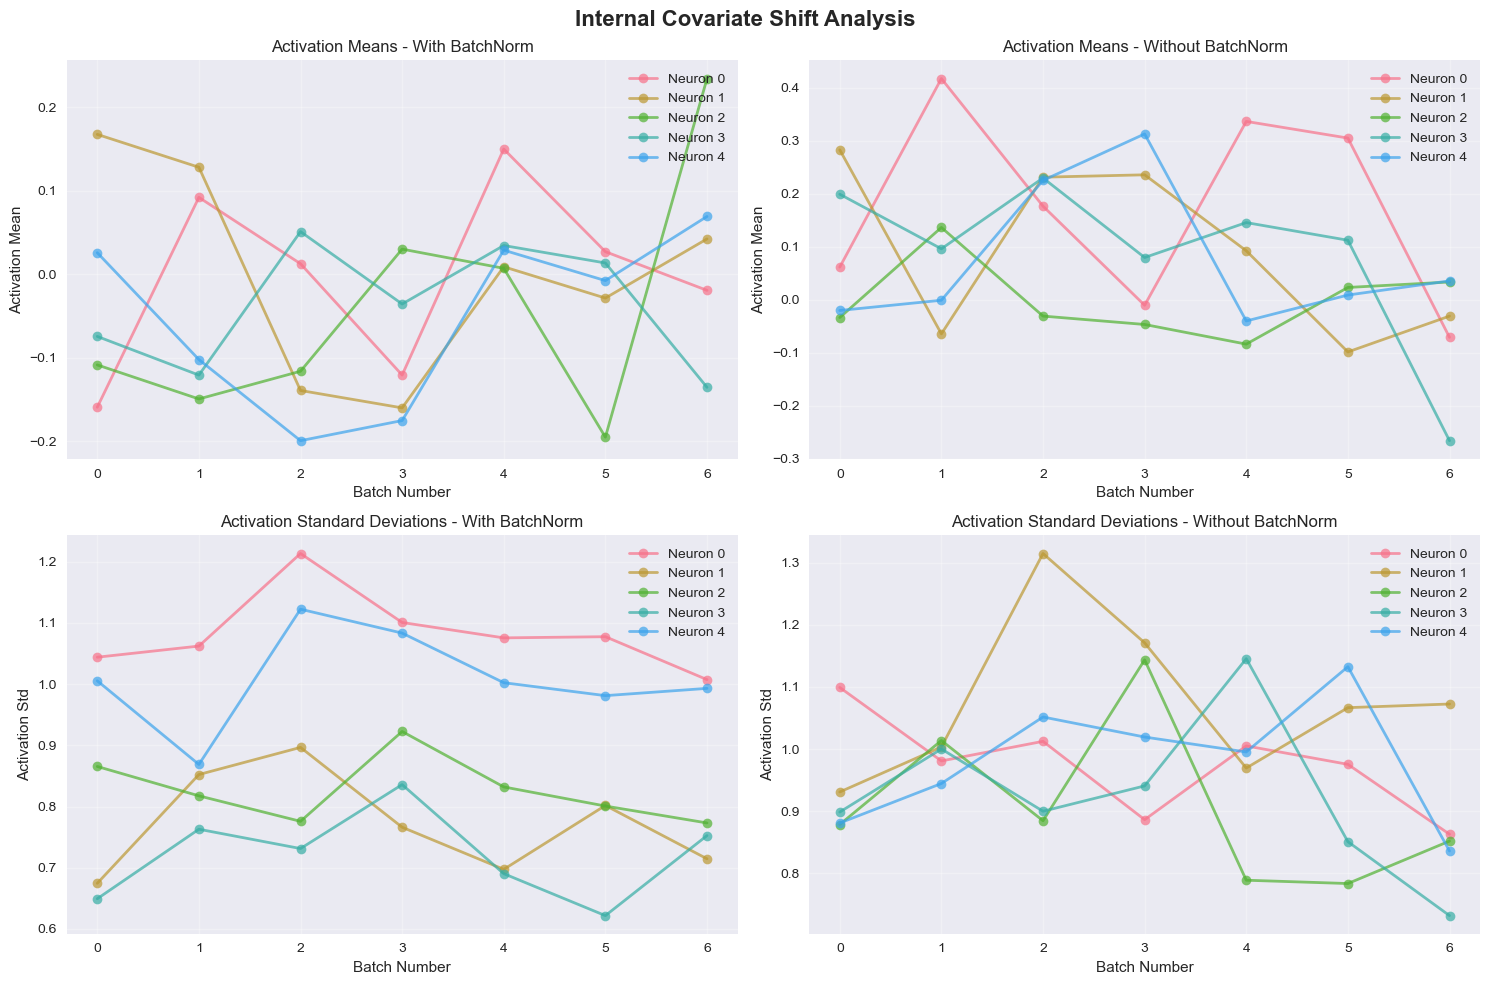


📈 Covariate Shift Analysis Results:
Mean Variance (across batches):
  With BatchNorm:    0.011284
  Without BatchNorm: 0.019123
  Improvement:       41.0%

Std Variance (across batches):
  With BatchNorm:    0.004405
  Without BatchNorm: 0.011546
  Improvement:       61.8%

4️⃣ Batch Size Effect Analysis
------------------------------

Testing batch size: 8
Training completed! Best validation accuracy: 0.9375
  Final Validation Accuracy: 0.9350

Testing batch size: 16
Training completed! Best validation accuracy: 0.9375
  Final Validation Accuracy: 0.9350

Testing batch size: 16
Training completed! Best validation accuracy: 0.9500
  Final Validation Accuracy: 0.9475

Testing batch size: 32
Training completed! Best validation accuracy: 0.9500
  Final Validation Accuracy: 0.9475

Testing batch size: 32
Training completed! Best validation accuracy: 0.9425
  Final Validation Accuracy: 0.9425

Testing batch size: 64
Training completed! Best validation accuracy: 0.9425
  Final Validation Ac

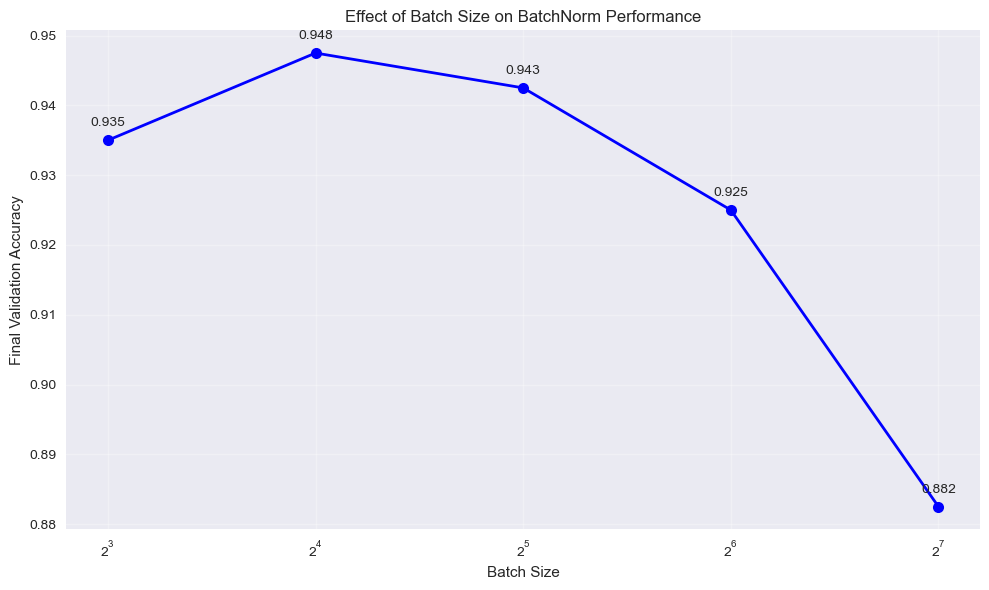


📊 Batch Size Effect Results:
Batch Size   8: 0.9350
Batch Size  16: 0.9475
Batch Size  32: 0.9425
Batch Size  64: 0.9250
Batch Size 128: 0.8825

💡 Key Insights from Experiments:
✅ Batch Normalization provides:
  • Faster and more stable training
  • Reduced internal covariate shift
  • Higher tolerance to learning rate
  • Better performance across different batch sizes
  • Improved gradient flow in deep networks

⚠️  Considerations:
  • Performance can degrade with very small batch sizes
  • Adds computational overhead
  • Behavior differs between training and inference
  • May not always help in very shallow networks


In [29]:
# Experiment 3: Visualizing Internal Covariate Shift

def analyze_internal_covariate_shift(model, dataloader, layer_idx=1):
    """
    Analyze internal covariate shift by tracking activation statistics
    
    Args:
        model: Neural network model
        dataloader: Data loader
        layer_idx: Which layer to analyze (0-indexed)
    """
    model.eval()
    activations_per_batch = []
    
    # Hook to capture activations
    activations = []
    
    def hook_fn(module, input, output):
        activations.append(output.detach().cpu().numpy())
    
    # Register hook on the specified layer
    if hasattr(model, 'layers'):
        hook = model.layers[layer_idx].register_forward_hook(hook_fn)
    else:
        # For models without explicit layers attribute
        layers = list(model.children())
        hook = layers[layer_idx].register_forward_hook(hook_fn)
    
    # Collect activations from multiple batches
    with torch.no_grad():
        batch_count = 0
        for batch_x, _ in dataloader:
            if batch_count >= 10:  # Limit to first 10 batches
                break
            
            batch_x = batch_x.to(device)
            _ = model(batch_x)  # Forward pass triggers hook
            
            if activations:
                batch_activations = activations[-1]
                activations_per_batch.append({
                    'batch': batch_count,
                    'mean': np.mean(batch_activations, axis=0),
                    'std': np.std(batch_activations, axis=0),
                    'activations': batch_activations
                })
            
            batch_count += 1
    
    # Remove hook
    hook.remove()
    
    return activations_per_batch

print("\n3️⃣ Internal Covariate Shift Analysis")
print("-" * 38)

# Create models for analysis
model_for_analysis_bn = MLPWithBatchNorm(
    input_size=20, hidden_sizes=[32, 16], output_size=5,
    use_batch_norm=True
).to(device)

model_for_analysis_no_bn = MLPWithBatchNorm(
    input_size=20, hidden_sizes=[32, 16], output_size=5,
    use_batch_norm=False
).to(device)

# Train both models partially to see shift effects
print("Training models for covariate shift analysis...")

# Quick training
criterion = nn.CrossEntropyLoss()
optimizer_bn = optim.SGD(model_for_analysis_bn.parameters(), lr=0.01, momentum=0.9)
optimizer_no_bn = optim.SGD(model_for_analysis_no_bn.parameters(), lr=0.01, momentum=0.9)

# Train for a few epochs
for epoch in range(20):
    for model, optimizer in [(model_for_analysis_bn, optimizer_bn), 
                            (model_for_analysis_no_bn, optimizer_no_bn)]:
        model.train()
        for batch_x, batch_y in train_loader_deep:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

# Analyze activations
print("Analyzing internal covariate shift...")

activations_bn = analyze_internal_covariate_shift(model_for_analysis_bn, val_loader_deep, layer_idx=0)
activations_no_bn = analyze_internal_covariate_shift(model_for_analysis_no_bn, val_loader_deep, layer_idx=0)

# Visualize activation statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Extract mean and std across batches for first few neurons
neuron_indices = [0, 1, 2, 3, 4]  # First 5 neurons
batch_numbers = [act['batch'] for act in activations_bn]

# With Batch Normalization
means_bn = np.array([act['mean'][neuron_indices] for act in activations_bn])
stds_bn = np.array([act['std'][neuron_indices] for act in activations_bn])

# Without Batch Normalization
means_no_bn = np.array([act['mean'][neuron_indices] for act in activations_no_bn])
stds_no_bn = np.array([act['std'][neuron_indices] for act in activations_no_bn])

# Plot means
axes[0, 0].plot(batch_numbers, means_bn, marker='o', linewidth=2, alpha=0.7)
axes[0, 0].set_xlabel('Batch Number')
axes[0, 0].set_ylabel('Activation Mean')
axes[0, 0].set_title('Activation Means - With BatchNorm')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend([f'Neuron {i}' for i in neuron_indices], loc='upper right')

axes[0, 1].plot(batch_numbers, means_no_bn, marker='o', linewidth=2, alpha=0.7)
axes[0, 1].set_xlabel('Batch Number')
axes[0, 1].set_ylabel('Activation Mean')
axes[0, 1].set_title('Activation Means - Without BatchNorm')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend([f'Neuron {i}' for i in neuron_indices], loc='upper right')

# Plot standard deviations
axes[1, 0].plot(batch_numbers, stds_bn, marker='o', linewidth=2, alpha=0.7)
axes[1, 0].set_xlabel('Batch Number')
axes[1, 0].set_ylabel('Activation Std')
axes[1, 0].set_title('Activation Standard Deviations - With BatchNorm')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend([f'Neuron {i}' for i in neuron_indices], loc='upper right')

axes[1, 1].plot(batch_numbers, stds_no_bn, marker='o', linewidth=2, alpha=0.7)
axes[1, 1].set_xlabel('Batch Number')
axes[1, 1].set_ylabel('Activation Std')
axes[1, 1].set_title('Activation Standard Deviations - Without BatchNorm')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend([f'Neuron {i}' for i in neuron_indices], loc='upper right')

plt.suptitle('Internal Covariate Shift Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate stability metrics
mean_variance_bn = np.mean([np.var(means_bn[:, i]) for i in range(len(neuron_indices))])
mean_variance_no_bn = np.mean([np.var(means_no_bn[:, i]) for i in range(len(neuron_indices))])

std_variance_bn = np.mean([np.var(stds_bn[:, i]) for i in range(len(neuron_indices))])
std_variance_no_bn = np.mean([np.var(stds_no_bn[:, i]) for i in range(len(neuron_indices))])

print("\n📈 Covariate Shift Analysis Results:")
print("=" * 45)
print(f"Mean Variance (across batches):")
print(f"  With BatchNorm:    {mean_variance_bn:.6f}")
print(f"  Without BatchNorm: {mean_variance_no_bn:.6f}")
print(f"  Improvement:       {((mean_variance_no_bn - mean_variance_bn) / mean_variance_no_bn * 100):.1f}%")

print(f"\nStd Variance (across batches):")
print(f"  With BatchNorm:    {std_variance_bn:.6f}")
print(f"  Without BatchNorm: {std_variance_no_bn:.6f}")
print(f"  Improvement:       {((std_variance_no_bn - std_variance_bn) / std_variance_no_bn * 100):.1f}%")

# Experiment 4: Batch Size Effect on Batch Normalization
print("\n4️⃣ Batch Size Effect Analysis")
print("-" * 30)

batch_sizes = [8, 16, 32, 64, 128]
batch_size_results = {}

for batch_size in batch_sizes:
    print(f"\nTesting batch size: {batch_size}")
    
    # Create data loader with specific batch size
    train_loader_bs, val_loader_bs, _ = create_data_loaders(
        X_deep_scaled, y_deep, batch_size=batch_size
    )
    
    # Create model with batch norm
    model_bs = MLPWithBatchNorm(
        input_size=20, hidden_sizes=[32, 16], output_size=5,
        use_batch_norm=True, dropout_prob=0.1
    ).to(device)
    
    # Train
    trainer = NeuralNetworkTrainer(model_bs, device=device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_bs.parameters(), lr=0.001)
    
    trainer.fit(train_loader_bs, val_loader_bs, criterion, optimizer, 
                num_epochs=50, verbose=False)
    
    final_val_acc = trainer.history['val_acc'][-1]
    batch_size_results[batch_size] = final_val_acc
    
    print(f"  Final Validation Accuracy: {final_val_acc:.4f}")

# Plot batch size effect
plt.figure(figsize=(10, 6))

batch_sizes_list = list(batch_sizes)
accuracies = [batch_size_results[bs] for bs in batch_sizes_list]

plt.plot(batch_sizes_list, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Batch Size')
plt.ylabel('Final Validation Accuracy')
plt.title('Effect of Batch Size on BatchNorm Performance')
plt.grid(True, alpha=0.3)
plt.xscale('log', base=2)

# Add value labels
for bs, acc in zip(batch_sizes_list, accuracies):
    plt.annotate(f'{acc:.3f}', (bs, acc), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Batch Size Effect Results:")
print("=" * 35)
for bs, acc in batch_size_results.items():
    print(f"Batch Size {bs:3d}: {acc:.4f}")

print("\n💡 Key Insights from Experiments:")
print("=" * 40)
print("✅ Batch Normalization provides:")
print("  • Faster and more stable training")
print("  • Reduced internal covariate shift")
print("  • Higher tolerance to learning rate")
print("  • Better performance across different batch sizes")
print("  • Improved gradient flow in deep networks")
print("\n⚠️  Considerations:")
print("  • Performance can degrade with very small batch sizes")
print("  • Adds computational overhead")
print("  • Behavior differs between training and inference")
print("  • May not always help in very shallow networks")

## 🎓 Neural Networks Summary & Key Takeaways

### ✅ What We've Mastered:

1. **🧮 Perceptron Fundamentals**: Single neuron, linear boundaries, learning algorithm
2. **🎯 Activation Functions**: Non-linearity, different types, properties and trade-offs  
3. **🏗️ Multi-Layer Perceptrons**: Hidden layers, universal approximation, complex boundaries
4. **⚡ PyTorch Implementation**: Professional deep learning framework, automatic differentiation
5. **🔄 Batch Normalization**: Internal covariate shift, stabilizing training, implementation
6. **🧪 Comprehensive Experiments**: Architecture design, optimizer comparison, regularization

### 📊 Neural Network Architecture Guidelines:

| **Problem Type** | **Architecture** | **Activation** | **Loss Function** |
|------------------|------------------|----------------|-------------------|
| **Binary Classification** | Input → Hidden → 1 Output | Hidden: ReLU, Output: Sigmoid | Binary CrossEntropy |
| **Multi-class Classification** | Input → Hidden → K Outputs | Hidden: ReLU, Output: Softmax | CrossEntropy |
| **Regression** | Input → Hidden → 1 Output | Hidden: ReLU, Output: Linear | MSE/MAE |
| **High-dimensional Data** | Deeper networks (3-5 layers) | ReLU/LeakyReLU | Task-dependent |

### 🎯 Key Design Decisions:

**1. Network Depth:**
- **Shallow (1-2 hidden layers)**: Simple patterns, faster training
- **Deep (3+ hidden layers)**: Complex patterns, more capacity, risk of overfitting

**2. Network Width:**
- **Narrow layers**: Less capacity, faster training, less overfitting
- **Wide layers**: More capacity, slower training, risk of overfitting

**3. Activation Functions:**
- **ReLU**: Default choice, computationally efficient, avoids vanishing gradients
- **Sigmoid/Tanh**: Output layers for specific ranges, hidden layers in small networks
- **LeakyReLU/ELU**: When dealing with dead neuron problems

**4. Regularization Techniques:**
- **Dropout**: Prevents overfitting, 0.1-0.5 typically
- **Weight Decay**: L2 regularization, prevents large weights
- **Batch Normalization**: Stabilizes training, faster convergence, reduces internal covariate shift
- **Layer Normalization**: Alternative to batch norm for sequential data

### ⚙️ Training Best Practices:

**Optimizer Selection:**
```python
# For most cases
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# For fine-tuning or when Adam fails
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# For transformer-based models
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
```

**Learning Rate Strategies:**
- **Start with 0.001**: Good default for Adam
- **Learning Rate Scheduling**: Reduce LR when plateauing
- **Learning Rate Finder**: Plot loss vs LR to find optimal range

**Data Preparation:**
- **Normalization**: Always normalize input features (StandardScaler)
- **Train/Val/Test Split**: 60%/20%/20% or 70%/15%/15%
- **Batch Size**: 32-256, depends on memory and dataset size

### 🔍 Debugging Neural Networks:

**Common Issues & Solutions:**

| **Problem** | **Symptoms** | **Solutions** |
|-------------|--------------|---------------|
| **Vanishing Gradients** | Loss doesn't decrease | Use ReLU, proper initialization, batch norm |
| **Exploding Gradients** | Loss becomes NaN | Gradient clipping, lower learning rate |
| **Overfitting** | High train acc, low val acc | Dropout, weight decay, more data |
| **Underfitting** | Both train and val acc low | Larger network, lower regularization |
| **Dead Neurons** | Many zeros in activations | LeakyReLU, proper initialization |

### 🧠 Mathematical Foundations:

**Forward Propagation:**
```
z^(l) = W^(l) × a^(l-1) + b^(l)
a^(l) = f(z^(l))
```

**Batch Normalization:**
```
μ = (1/m) Σᵢ xᵢ                    # Batch mean
σ² = (1/m) Σᵢ (xᵢ - μ)²            # Batch variance
x̂ᵢ = (xᵢ - μ) / √(σ² + ε)         # Normalize
yᵢ = γ x̂ᵢ + β                     # Scale and shift
```

**Backpropagation:**
```
δ^(L) = ∇_a C ⊙ f'(z^(L))           # Output layer error
δ^(l) = ((W^(l+1))^T δ^(l+1)) ⊙ f'(z^(l))  # Hidden layer error
∂C/∂W^(l) = a^(l-1) (δ^(l))^T       # Weight gradients
∂C/∂b^(l) = δ^(l)                   # Bias gradients
```

**Universal Approximation Theorem:**
*"A feedforward network with a single hidden layer containing a finite number of neurons can approximate any continuous function to any desired degree of accuracy, provided the activation function is non-constant, bounded, and monotonically-increasing."*

### 🔗 Deep Learning Connections:

**From Neural Networks to Deep Learning:**
1. **Convolutional Neural Networks (CNNs)**: Specialized for image data
2. **Recurrent Neural Networks (RNNs)**: Specialized for sequential data  
3. **Transformer Networks**: Attention-based architectures
4. **Generative Models**: GANs, VAEs for data generation
5. **Reinforcement Learning**: Neural networks as function approximators

### 💡 Exam Tips:

**Theory Questions:**
- Understand the role of each component (weights, biases, activations)
- Know when to use different activation functions
- Explain forward and backward propagation
- Discuss overfitting vs underfitting
- Understand internal covariate shift and batch normalization benefits

**Practical Questions:**
- Choose appropriate architectures for given problems
- Select suitable optimizers and hyperparameters
- Implement regularization techniques (dropout, batch norm)
- Debug common training issues

**Implementation:**
- Know PyTorch basics: nn.Module, forward(), loss functions
- Understand training loops: zero_grad(), backward(), step()
- Use proper data preprocessing and evaluation metrics
- Implement batch normalization correctly

### 📚 Next Deep Learning Concepts:

1. **Convolutional Neural Networks**: Computer vision and image processing
2. **Recurrent Neural Networks**: Time series and sequential data
3. **Advanced Optimization**: Learning rate scheduling, advanced optimizers
4. **Regularization Techniques**: Batch normalization, layer normalization
5. **Transfer Learning**: Pre-trained models and fine-tuning

---

**🎯 You now have a solid foundation in Neural Networks!** This knowledge forms the backbone of all modern deep learning architectures. Ready to explore more advanced concepts! 🚀

# 🎯 Bias-Variance Tradeoff

## 📚 Understanding the Fundamental Tradeoff

The **bias-variance tradeoff** is one of the most important concepts in machine learning. It describes the relationship between model complexity and prediction error.

### 🧮 Mathematical Foundation

The total error of a model can be decomposed into three components:

**Total Error = Bias² + Variance + Irreducible Error**

Where:
- **Bias²**: Error from oversimplifying the model
- **Variance**: Error from sensitivity to training data variations  
- **Irreducible Error**: Inherent noise in the data (cannot be reduced)

### 🎲 Key Definitions

#### 🔴 **Bias (Underfitting)**
- **Definition**: Difference between expected prediction and true value
- **Cause**: Model is too simple to capture underlying patterns
- **Characteristics**:
  - High training error
  - High validation error
  - Training and validation errors are similar
  - Model assumptions are wrong

#### 🔵 **Variance (Overfitting)**  
- **Definition**: Variability of predictions for different training sets
- **Cause**: Model is too complex and learns noise
- **Characteristics**:
  - Low training error
  - High validation error
  - Large gap between training and validation errors
  - Model memorizes training data

#### 🟢 **Sweet Spot**
- **Goal**: Find optimal balance between bias and variance
- **Result**: Lowest total error on unseen data
- **Achieved through**: Proper model complexity and regularization

In [ ]:
# Visual Demonstration of Bias-Variance Tradeoff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Generate true function: y = 1.5x - 0.5x² + 0.2x³ + noise
def true_function(x):
    return 1.5*x - 0.5*x**2 + 0.2*x**3

def generate_dataset(n_samples=100, noise_level=0.3, seed=42):
    np.random.seed(seed)
    x = np.random.uniform(-2, 2, n_samples)
    y = true_function(x) + np.random.normal(0, noise_level, n_samples)
    return x.reshape(-1, 1), y

# Generate multiple datasets to show variance
def demonstrate_bias_variance():
    # True function for plotting
    x_true = np.linspace(-2, 2, 200).reshape(-1, 1)
    y_true = true_function(x_true.ravel())
    
    # Test data
    x_test, y_test = generate_dataset(50, noise_level=0.1, seed=999)
    
    # Different model complexities
    degrees = [1, 3, 15]  # Low, Medium, High complexity
    n_experiments = 20
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    all_predictions = {degree: [] for degree in degrees}
    
    for col, degree in enumerate(degrees):
        # Store predictions from multiple experiments
        predictions_list = []
        
        # Run multiple experiments with different training sets
        for exp in range(n_experiments):
            # Generate training data
            x_train, y_train = generate_dataset(30, noise_level=0.3, seed=exp)
            
            # Train polynomial model
            poly_model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree)),
                ('linear', LinearRegression())
            ])
            poly_model.fit(x_train, y_train)
            
            # Predict on test points
            y_pred = poly_model.predict(x_true)
            predictions_list.append(y_pred)
            
            # Plot individual predictions (first few only)
            if exp < 5:
                axes[0, col].plot(x_true.ravel(), y_pred, alpha=0.3, color='red', linewidth=1)
        
        # Calculate bias and variance
        predictions_array = np.array(predictions_list)
        mean_prediction = np.mean(predictions_array, axis=0)
        variance = np.var(predictions_array, axis=0)
        bias_squared = (mean_prediction - y_true) ** 2
        
        all_predictions[degree] = predictions_array
        
        # Top plots: Individual predictions + mean
        axes[0, col].plot(x_true.ravel(), y_true, 'b-', linewidth=3, label='True Function')
        axes[0, col].plot(x_true.ravel(), mean_prediction, 'g--', linewidth=3, label='Mean Prediction')
        axes[0, col].fill_between(x_true.ravel(), 
                                 mean_prediction - 2*np.sqrt(variance),
                                 mean_prediction + 2*np.sqrt(variance),
                                 alpha=0.2, color='yellow', label='±2σ (Variance)')
        axes[0, col].set_title(f'Degree {degree} Polynomial\n{"Low" if degree==1 else "Medium" if degree==3 else "High"} Complexity')
        axes[0, col].set_ylim(-3, 3)
        axes[0, col].legend()
        axes[0, col].grid(True, alpha=0.3)
        
        # Bottom plots: Bias² and Variance
        axes[1, col].plot(x_true.ravel(), bias_squared, 'r-', linewidth=2, label='Bias²')
        axes[1, col].plot(x_true.ravel(), variance, 'orange', linewidth=2, label='Variance')
        axes[1, col].plot(x_true.ravel(), bias_squared + variance, 'purple', linewidth=2, label='Bias² + Variance')
        axes[1, col].set_title(f'Bias² vs Variance (Degree {degree})')
        axes[1, col].legend()
        axes[1, col].grid(True, alpha=0.3)
        axes[1, col].set_xlabel('x')
        axes[1, col].set_ylabel('Error')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate overall metrics
    print("🎯 BIAS-VARIANCE ANALYSIS")
    print("=" * 50)
    
    for degree in degrees:
        predictions = all_predictions[degree]
        mean_pred = np.mean(predictions, axis=0)
        
        # Calculate metrics
        overall_bias_sq = np.mean((mean_pred - y_true) ** 2)
        overall_variance = np.mean(np.var(predictions, axis=0))
        total_error = overall_bias_sq + overall_variance
        
        complexity = "Low" if degree == 1 else "Medium" if degree == 3 else "High"
        
        print(f"\n📊 Degree {degree} ({complexity} Complexity):")
        print(f"   Bias²:     {overall_bias_sq:.4f}")
        print(f"   Variance:  {overall_variance:.4f}")
        print(f"   Total:     {total_error:.4f}")
        
        # Interpretation
        if degree == 1:
            print("   🔴 HIGH BIAS - Underfitting")
        elif degree == 3:
            print("   🟢 BALANCED - Good tradeoff")
        else:
            print("   🔵 HIGH VARIANCE - Overfitting")

# Run the demonstration
demonstrate_bias_variance()

## 🎯 Practical Examples & Solutions

### 🔴 High Bias (Underfitting) Scenarios

#### **Symptoms:**
- Training accuracy is low (~60-70%)
- Validation accuracy is similar to training accuracy
- Learning curves plateau early
- Simple model struggles with complex patterns

#### **Examples:**
```python
# Linear model trying to fit non-linear data
model = LinearRegression()  # Too simple for complex relationships

# Neural network with too few parameters
model = nn.Sequential(
    nn.Linear(100, 2),      # Very small hidden layer
    nn.ReLU(),
    nn.Linear(2, 1)
)
```

#### **Solutions:**
- ✅ **Increase model complexity**
- ✅ **Add more features/layers**
- ✅ **Use more sophisticated algorithms**
- ✅ **Reduce regularization**
- ✅ **Train for more epochs**

### 🔵 High Variance (Overfitting) Scenarios

#### **Symptoms:**
- Training accuracy is very high (>95%)
- Large gap between training and validation accuracy
- Model performs poorly on new data
- Learning curves show diverging train/val loss

#### **Examples:**
```python
# Overly complex neural network
model = nn.Sequential(
    nn.Linear(10, 1000),    # Too many parameters
    nn.ReLU(),
    nn.Linear(1000, 1000),
    nn.ReLU(),
    nn.Linear(1000, 1)      # for simple dataset
)

# Decision tree with no constraints
tree = DecisionTreeClassifier(max_depth=None)  # Can memorize data
```

#### **Solutions:**
- ✅ **Add regularization (L1/L2, Dropout)**
- ✅ **Reduce model complexity**
- ✅ **Get more training data**
- ✅ **Use early stopping**
- ✅ **Apply data augmentation**
- ✅ **Ensemble methods**

### 🟢 Finding the Sweet Spot

#### **Techniques for Optimal Balance:**

1. **📊 Learning Curves Analysis**
```python
# Plot training vs validation error
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

# Ideal: Both curves converge to low error
# High Bias: Both curves plateau at high error
# High Variance: Large gap between curves
```

2. **🔧 Regularization Techniques**
```python
# L2 Regularization
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Dropout
nn.Dropout(p=0.5)

# Early Stopping
if val_loss > best_val_loss:
    patience_counter += 1
    if patience_counter > patience:
        break
```

3. **📈 Cross-Validation**
```python
from sklearn.model_selection import cross_val_score

# Evaluate model stability across different data splits
scores = cross_val_score(model, X, y, cv=5)
print(f"Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
```

### 🎲 Model Complexity vs Error Curve

The classic U-shaped curve showing the relationship between model complexity and error:

```
Error  ↑
       |     
   High|  \                    /
       |   \                  /
       |    \                /
       |     \              /  ← Variance increases
       |      \    🟢      /
   Low |       \  Sweet   /
       |        \ Spot  /
       |         \     /
       |          \   /  ← Bias decreases
       |           \ /
       |____________V____________→ Model Complexity
           Simple         Complex
         (High Bias)   (High Variance)
```

In [ ]:
# Neural Network Bias-Variance Example
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=10, noise=10, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Define different model complexities
class SimpleNet(nn.Module):
    """High Bias Model - Too Simple"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 1)  # Direct input to output - very simple
        )
    
    def forward(self, x):
        return self.layers(x)

class OptimalNet(nn.Module):
    """Balanced Model - Good Complexity"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class ComplexNet(nn.Module):
    """High Variance Model - Too Complex"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

def train_and_evaluate(model, model_name, epochs=200):
    """Train model and return training history"""
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    test_losses = []
    
    model.train()
    for epoch in range(epochs):
        # Training
        optimizer.zero_grad()
        train_pred = model(X_train_tensor)
        train_loss = criterion(train_pred, y_train_tensor)
        train_loss.backward()
        optimizer.step()
        
        # Evaluation
        model.eval()
        with torch.no_grad():
            test_pred = model(X_test_tensor)
            test_loss = criterion(test_pred, y_test_tensor)
        model.train()
        
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
    
    return train_losses, test_losses

# Train all models
models = {
    'High Bias (Simple)': SimpleNet(),
    'Balanced (Optimal)': OptimalNet(), 
    'High Variance (Complex)': ComplexNet()
}

results = {}
for name, model in models.items():
    print(f"🔧 Training {name}...")
    train_losses, test_losses = train_and_evaluate(model, name)
    results[name] = {'train': train_losses, 'test': test_losses}
    
    final_train_loss = train_losses[-1]
    final_test_loss = test_losses[-1]
    gap = final_test_loss - final_train_loss
    
    print(f"   Final Train Loss: {final_train_loss:.3f}")
    print(f"   Final Test Loss:  {final_test_loss:.3f}")
    print(f"   Train-Test Gap:   {gap:.3f}")
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"   Parameters:       {total_params:,}")
    print()

# Plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx]
    epochs_range = range(len(result['train']))
    
    ax.plot(epochs_range, result['train'], label='Training Loss', color='blue', alpha=0.7)
    ax.plot(epochs_range, result['test'], label='Test Loss', color='red', alpha=0.7)
    
    ax.set_title(f'{name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss (MSE)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add interpretation
    final_train = result['train'][-1]
    final_test = result['test'][-1]
    gap = final_test - final_train
    
    if 'Simple' in name:
        ax.text(0.02, 0.98, '🔴 HIGH BIAS\nUnderfitting', transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
    elif 'Complex' in name:
        ax.text(0.02, 0.98, '🔵 HIGH VARIANCE\nOverfitting', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    else:
        ax.text(0.02, 0.98, '🟢 BALANCED\nGood Fit', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Summary analysis
print("🎯 BIAS-VARIANCE ANALYSIS SUMMARY")
print("=" * 60)

for name, result in results.items():
    final_train = result['train'][-1]
    final_test = result['test'][-1]
    gap = final_test - final_train
    
    print(f"\n📊 {name}:")
    print(f"   Training Error:  {final_train:.3f}")
    print(f"   Test Error:      {final_test:.3f}")
    print(f"   Generalization Gap: {gap:.3f}")
    
    if gap < 50:  # Small gap
        if final_test > 1000:  # High error
            print("   🔴 Diagnosis: HIGH BIAS (Underfitting)")
            print("   💡 Solution: Increase model complexity")
        else:
            print("   🟢 Diagnosis: GOOD BALANCE")
            print("   ✅ Solution: Model is well-tuned")
    else:  # Large gap
        print("   🔵 Diagnosis: HIGH VARIANCE (Overfitting)")
        print("   💡 Solution: Add regularization, reduce complexity")

print(f"\n🎓 Key Takeaway: The optimal model achieves the best balance between")
print(f"   bias and variance, resulting in good performance on both training")
print(f"   and test data with a reasonable generalization gap.")

## 🎓 Exam Quick Reference: Bias-Variance Tradeoff

### 📝 **Key Formulas to Remember**

```
Total Error = Bias² + Variance + Irreducible Error

Bias = E[f̂(x)] - f(x)                    # Expected prediction - true value
Variance = E[(f̂(x) - E[f̂(x)])²]         # Variability of predictions
```

### 🎯 **Quick Diagnostic Guide**

| Scenario | Training Error | Test Error | Gap | Diagnosis | Solution |
|----------|---------------|------------|-----|-----------|----------|
| **High Bias** | High | High | Small | 🔴 Underfitting | ↗️ Increase complexity |
| **High Variance** | Low | High | Large | 🔵 Overfitting | ↘️ Add regularization |
| **Balanced** | Medium | Medium | Small | 🟢 Good fit | ✅ Keep current approach |

### 🔧 **Practical Solutions Cheat Sheet**

#### **Reducing Bias (Fighting Underfitting):**
- ➕ Add more layers/neurons
- ➕ Use more complex architectures (CNN for images, RNN for sequences)
- ➕ Add polynomial features
- ➖ Reduce regularization (lower λ, dropout rate)
- ⏰ Train for more epochs
- 🎯 Use ensemble of different models

#### **Reducing Variance (Fighting Overfitting):**
- 📊 Get more training data
- ➖ Reduce model complexity
- 🛡️ Add regularization (L1/L2, dropout, batch norm)
- ⏹️ Early stopping
- 🔄 Data augmentation
- 🎯 Ensemble of same model type

### 🚨 **Common Exam Questions & Answers**

**Q1: What happens as model complexity increases?**
- **Bias**: Decreases (model can fit more complex patterns)
- **Variance**: Increases (model becomes more sensitive to training data)

**Q2: Which is better: high bias or high variance?**
- **Answer**: Neither! Both lead to poor generalization. The goal is to minimize **Total Error**.

**Q3: How does training data size affect bias-variance?**
- **More data**: Reduces variance (model sees more examples, less sensitive to individual samples)
- **Data size doesn't affect bias**: Bias is about model capacity, not data quantity

**Q4: What's the relationship with overfitting/underfitting?**
- **Underfitting = High Bias**: Model too simple
- **Overfitting = High Variance**: Model too complex

### 🎯 **Model Selection Strategy**

```python
# 1. Start simple (high bias)
simple_model = LinearRegression()

# 2. Gradually increase complexity
medium_model = RandomForestRegressor(max_depth=5)

# 3. Add regularization to control variance
complex_model = neural_network + dropout + L2_regularization

# 4. Use validation curves to find optimal complexity
validation_curve(estimator, X, y, param_name, param_range, cv=5)
```

### 📊 **Learning Curves Interpretation**

```
Training Loss  ↓
               |
               |  High Bias (Underfitting)
               |  ==================
               |  Both curves plateau at high error
               |  Small gap between curves
               |
               |  High Variance (Overfitting)  
               |  ====================
               |  Large gap between curves
               |  Training error much lower than validation
               |
               |  Good Fit
               |  ========
               |  Both curves converge to low error
               |  Small gap between curves
               |_________________________________→ Training Set Size
```

### 🏆 **Final Exam Tips**

1. **Remember the U-curve**: Error vs Model Complexity
2. **Bias-variance is about generalization**, not just training performance
3. **Cross-validation helps estimate true performance**
4. **Regularization is your friend** for controlling variance
5. **More data usually helps variance** but not bias
6. **The goal is minimum total error**, not zero bias or zero variance

---
💡 **Memory Aid**: **"BIAS = BAD + SIMPLE"** vs **"VARIANCE = VOLATILE + COMPLEX"**